In [2]:
import sys
print(sys.version)

3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:01:53) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [3]:
# !pip install tensorflow==1.15
# !pip install keras

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
import pprint

from IPython.display import Image

pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()

In [5]:
print(tf.__version__)

1.15.0


cf.

tf.get_variable(<name>, <shape>, <initializer>) : 입력된 이름의 변수를 생성하거나 반환
    
tf.variable_scope(<scope_name>) : tf.get_variable() 에 전달된 이름의 namespace 관리

tf.global_variables_initializer()
    
tf.Session() : operation 객체를 실행하고, tensor 객체를 평하하기 위한 환경을 제공
    
tf.InteractiveSession() : tf.Session()과 다른 점은 run() 함수를 사용하는 것이 아닌, eval() 함수 사용

https://datascienceschool.net/view-notebook/5cbab09d777841f591a67928d7043f51/

In [60]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

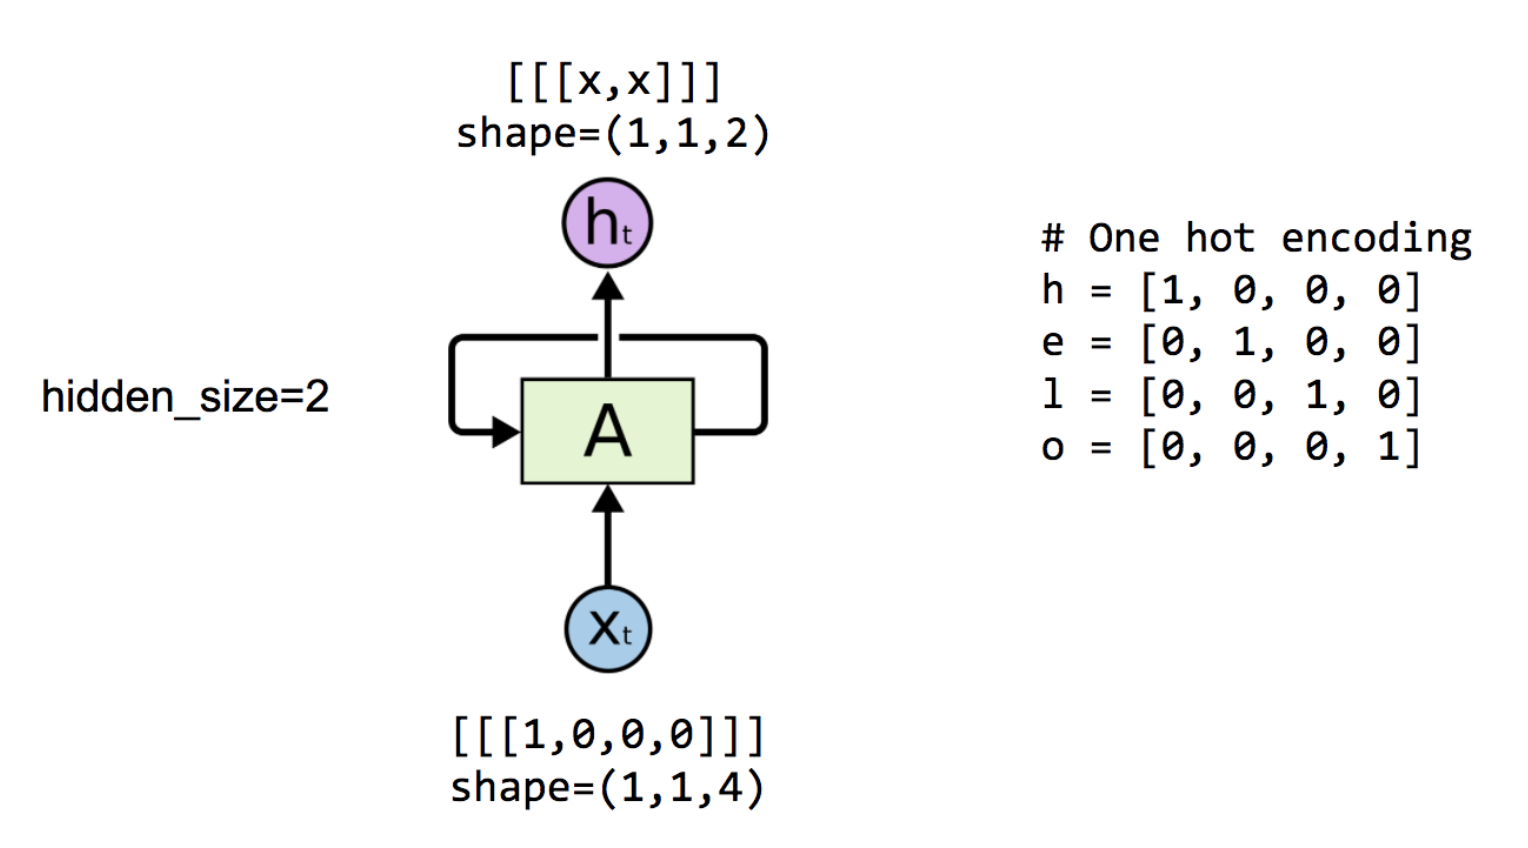

In [6]:
Image("img/TF_RNN1.png") # code안에서 나오게 할 때

# RNN 만들기

1. cell 만들기  
    - (RNN, LSTM, RRU)
    - output size 지정 (num_units) h(t)

#RNN Cell
cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)
#LSTM Cell
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size)
#RUS Cell
cell = tf.contrib.rnn.GRUCell(num_units=hidden_size)

2. cell 구동
    - 입력을 주고, 출력값을 받는 과정 
    - tf.nn.dynamic_rnn 이라는 함수(or wrapper 라고 부름) 이용
    - 앞서 만든 cell, 입력(x_data) 을 
    - output(h), states(A cell 에서 나가는 값)
    
outputs, _states = tf.nn.dynamic_run(cell, x_data, dtype=tf.float32)


In [7]:
with tf.variable_scope('one_cell') as scope:
    # One cell RNN input_dim (4) -> output_dim (2)
    hidden_size = 2
    cell = tf.keras.layers.SimpleRNNCell(units=hidden_size)
    print(cell.output_size, cell.state_size)

    x_data = np.array([[h]], dtype=np.float32) # x_data = [[[1,0,0,0]]]
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())
    ## array([[[-0.42, 0.64]]]) : hidden size=2 로 설정했기 때문에 1*2 형태의 output

2 2
array([[[1., 0., 0., 0.]]], dtype=float32)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
array([[[-0.66742045, -0.6939316 ]]], dtype=float32)


## Unfolding

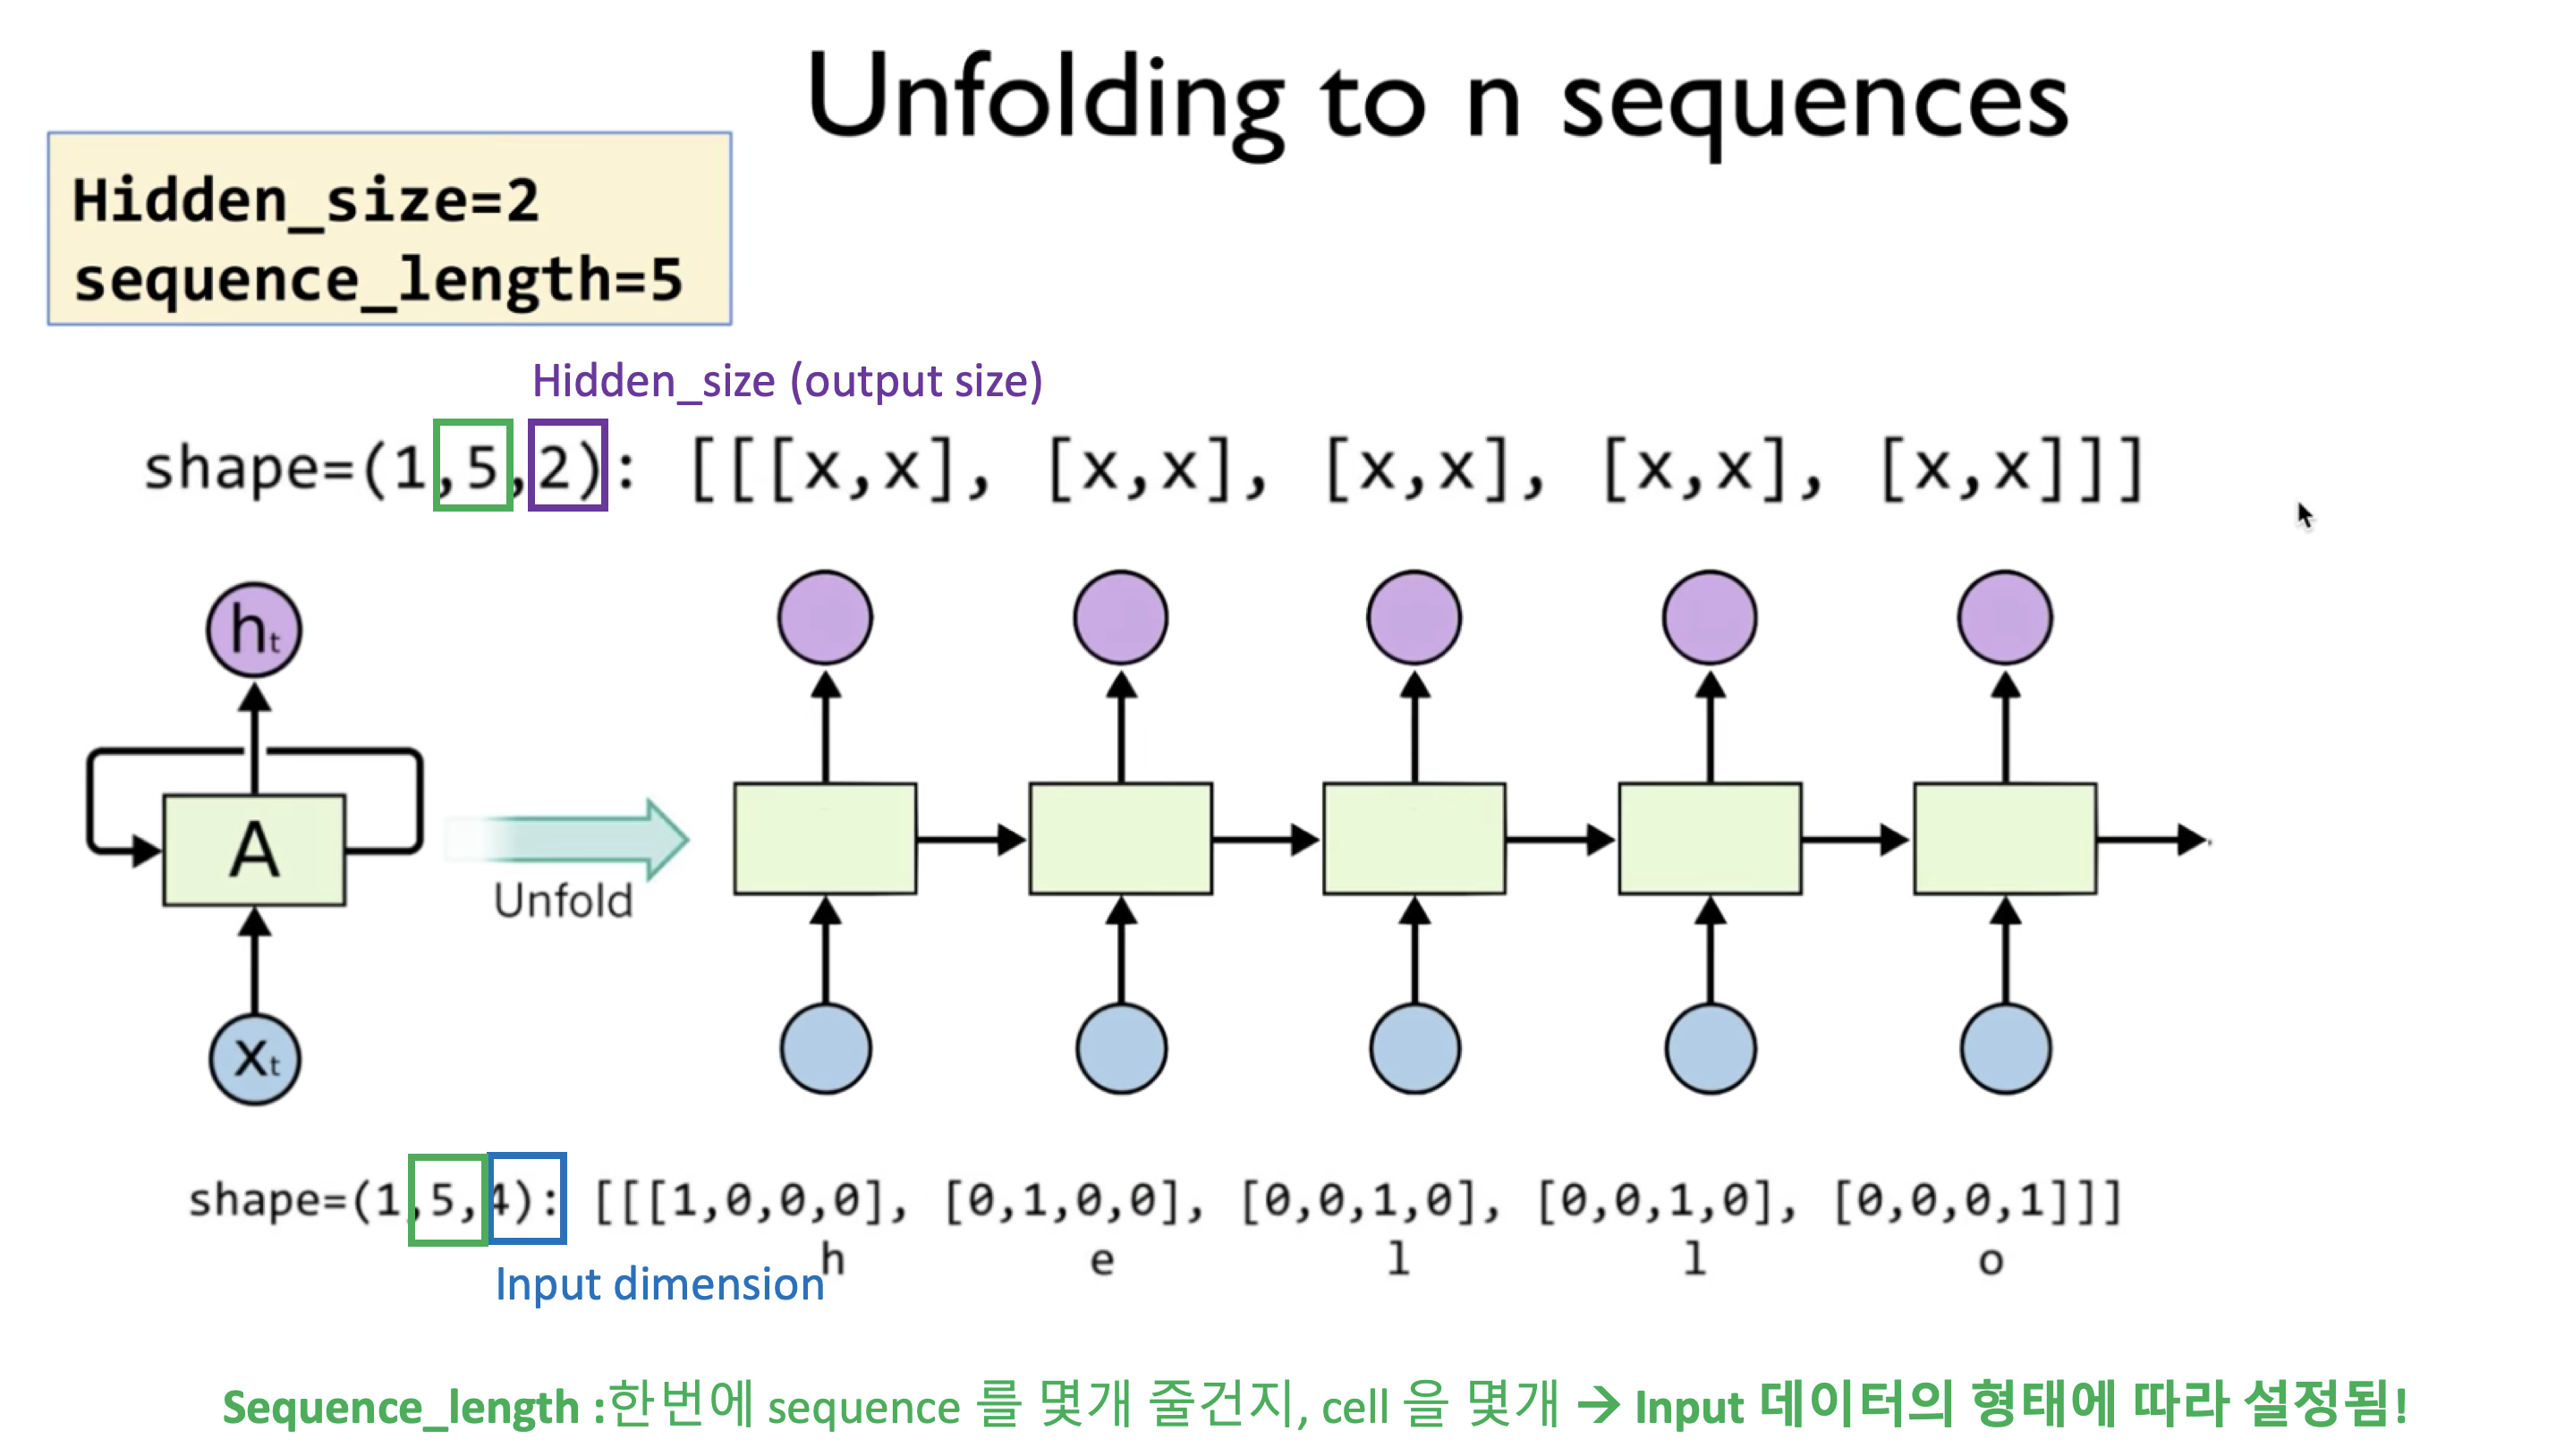

In [8]:
Image("img/TF_RNN2.png") # code안에서 나오게 할 때

In [9]:
with tf.variable_scope('two_sequances') as scope:
    # One cell RNN input_dim (4) -> output_dim (2). sequence: 5
    hidden_size = 2
    cell = tf.keras.layers.SimpleRNNCell(units=hidden_size)
    x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
    #sequence : 입력이 5개 --> 따라서 seqeunce_length = 5
    
    print("input shape : ", x_data.shape)
    pp.pprint(x_data)
    outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

input shape :  (1, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)
array([[[ 0.6834629 , -0.55420667],
        [-0.7588934 , -0.2838076 ],
        [ 0.7084264 , -0.7909187 ],
        [-0.2866333 , -0.06366772],
        [ 0.28939247, -0.19313906]]], dtype=float32)


## Batch size

- 학습시킬 때 한줄씩 학습을 시키면 비효율적! 한번 학습시 문자열을 여러개 학습할 수 있도록
- 이것도 마찬가지로 입력 데이터 shape 에 따라 정해짐!


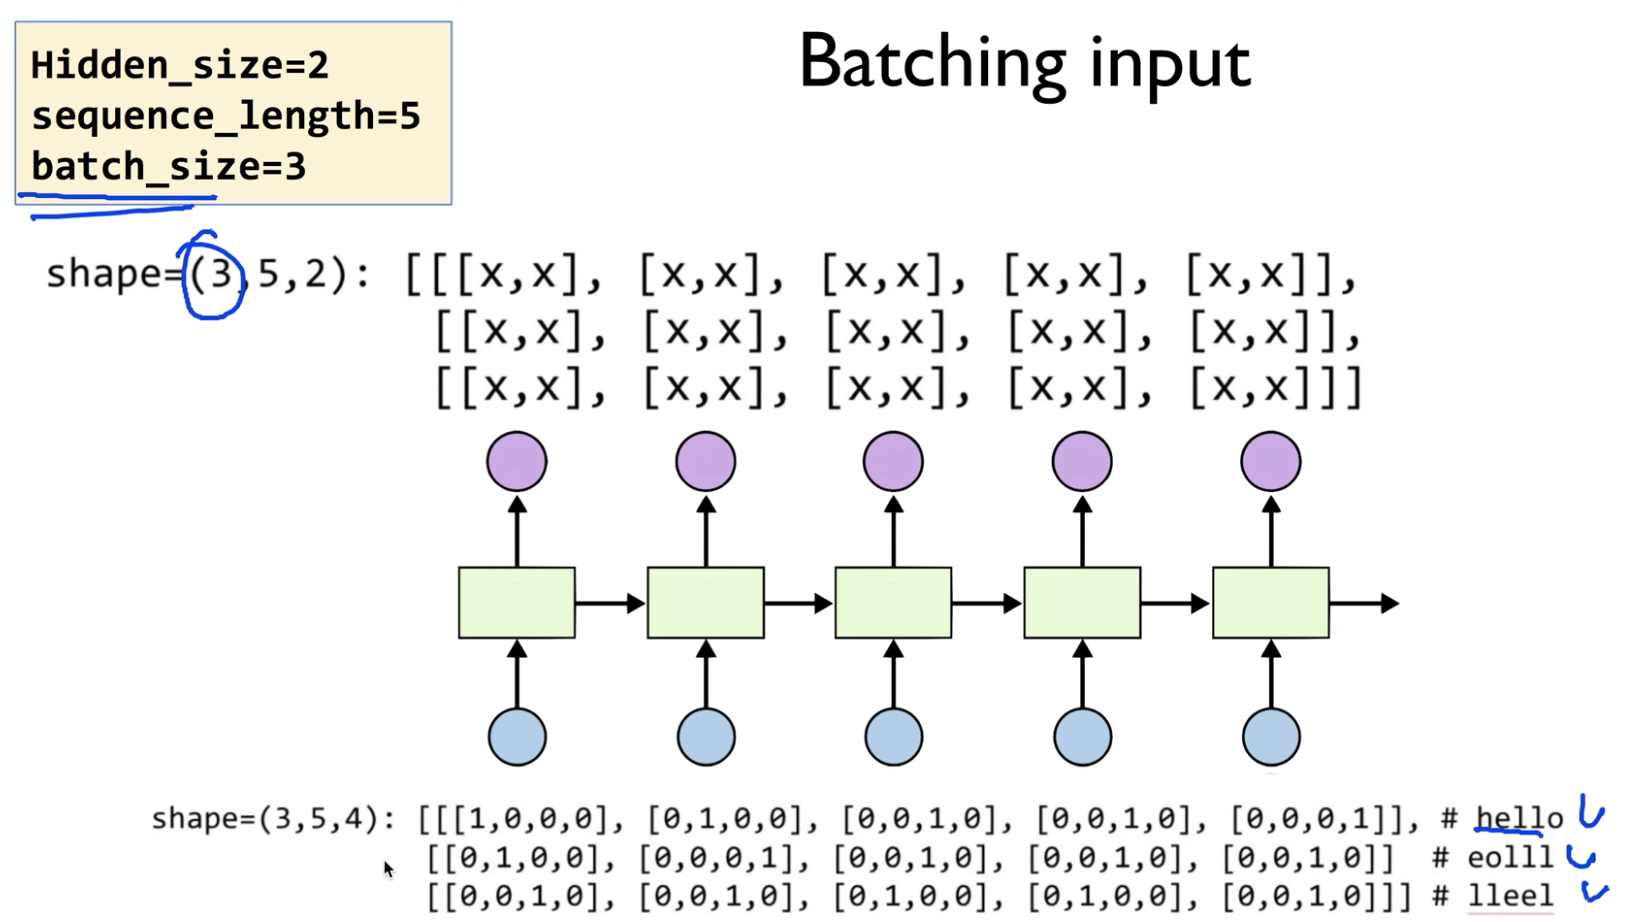

In [10]:
Image("img/TF_RNN3.png") # code안에서 나오게 할 때

In [62]:
tf.reset_default_graph()

In [63]:
sess = tf.InteractiveSession()
with tf.variable_scope('3_batches') as scope:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
    x_data = np.array([[h, e, l, l, o],
                       [e, o, l, l, l],
                       [l, l, e, e, l]], dtype=np.float32)
    pp.pprint(x_data)

    hidden_size = 2

    cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_size)

    outputs, _states = tf.nn.dynamic_rnn(
        cell, x_data, dtype=tf.float32)

    sess.run(tf.global_variables_initializer())
    pp.pprint(outputs.eval())

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)
array([[[ 0.02995118, -0.05877686],
        [-0.03142409, -0.06793877],
        [-0.05731389, -0.00421561],
        [-0.07509156,  0.06486718],
        [-0.03703387,  0.14846727]],

       [[-0.04446319, -0.03302392],
        [-0.00943709,  0.09256107],
        [-0.04748179,  0.15734409],
        [-0.08008441,  0.18259832],
        [-0.10455838,  0.20070498]],

       [[-0.03468832,  0.07178871],
        [-0.06490446,  0.12234782],
        [-0.07972743,  0.04048755],
        [-0.09347415, -0.00086153],
        [-0.11885787,  0.06466105]]], dtype=float32)


/Users/imsoyoung/opt/anaconda3/envs/tensorflow1/lib/python3.6/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


# RNN 예시 - "hihello"

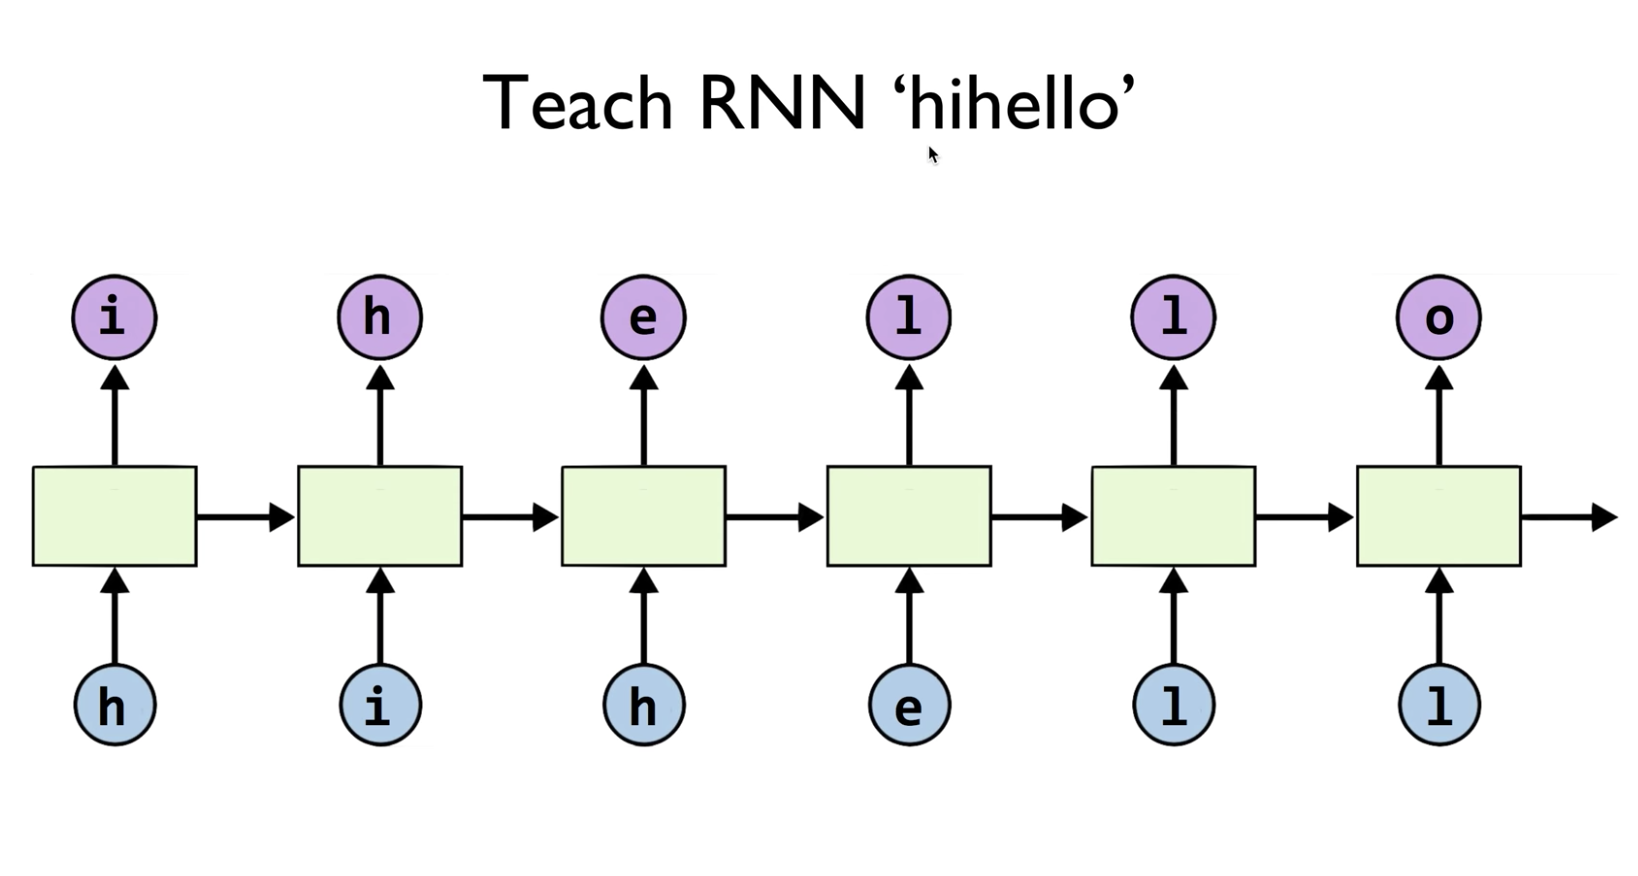

In [44]:
Image("img/TF_RNN4.png") # code안에서 나오게 할 때

text : "hihello'
input : text --> one-hot-encoding

unique chars : h, i, e, l, o

voc index
h:0, i:1, e:2, l:3, 0:4



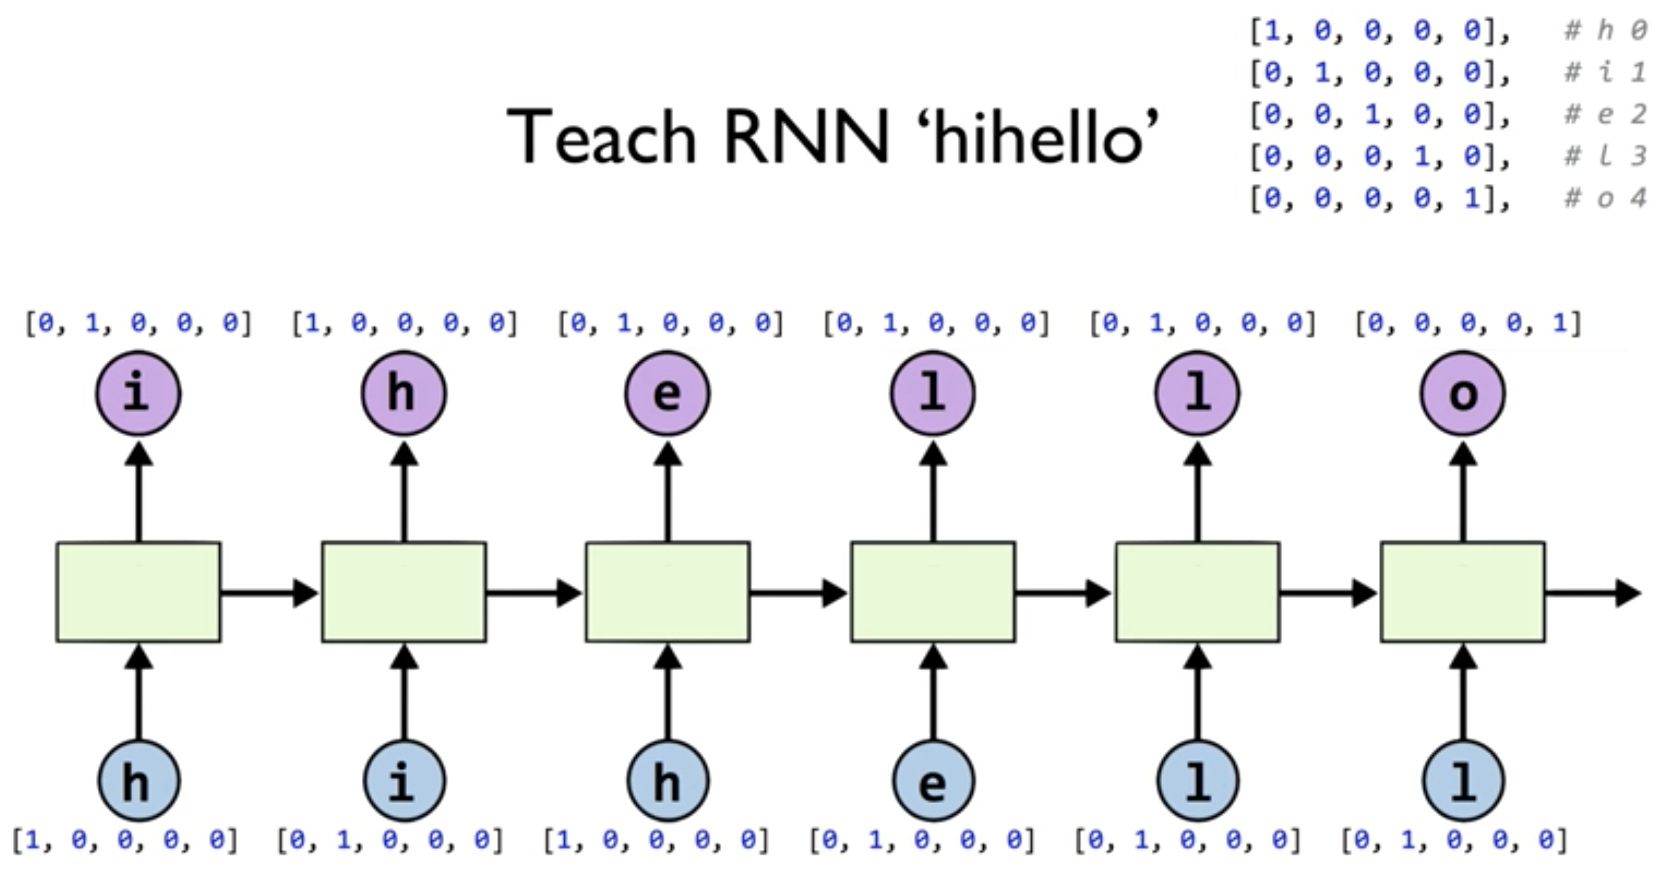

In [64]:
Image("img/TF_RNN5.png") # code안에서 나오게 할 때

In [51]:
tf.reset_default_graph()

## Input, Output

##input : [1,6,5]
- 1 = batch size
- 6 = sequence length
- 5 = input dimension

##output : [1,6,5]
- 1 = batch size
- 6 = sequcne length
- 5 = hidden size

In [51]:
tf.set_random_seed(777)  # reproducibility

###one-hot encoding
idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

### Y 값 : h 가 입력으로 들어갔을 때 뒤에 나올 character
y_data = [[1, 0, 2, 3, 3, 4]]    # ihello

num_classes = 5
input_dim = 5  # one-hot size
hidden_size = 5  # output from the LSTM. 5 to directly predict one-hot
batch_size = 1   # one sentence
sequence_length = 6  # |ihello| == 6
learning_rate = 0.1

X = tf.placeholder(
    tf.float32, [None, sequence_length, input_dim])  # X one-hot
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label




## Model

In [53]:
### RNN Model
cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)

# initial_state : 0 으로 초기화
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, X, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
# fc_w = tf.get_variable("fc_w", [hidden_size, num_classes])
# fc_b = tf.get_variable("fc_b", [num_classes])
# outputs = tf.matmul(X_for_fc, fc_w) + fc_b
outputs = tf.contrib.layers.fully_connected(
    inputs=X_for_fc, num_outputs=num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])


Instructions for updating:
Please use `layer.__call__` method instead.


## Cost : sequence_loss

tf.contrib.seq2seq.sequence_loss(logits, targets, weights)
- logits  : 우리의 예측값
- targets : 정답값
- weights : 각각의 자리를 얼마나 중요하게 생각하는지 (보통 [1,1,1]로 지정)

In [54]:

weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)

loss = tf.reduce_mean(sequence_loss)

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss:", l, "prediction: ", result, "true Y: ", y_data)

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\tPrediction str: ", ''.join(result_str))

0 loss: 1.7732946 prediction:  [[3 3 3 3 1 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllil
1 loss: 1.471561 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
2 loss: 1.3687081 prediction:  [[3 3 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  llllll
3 loss: 1.2120875 prediction:  [[0 0 3 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  hhlllo
4 loss: 1.0131055 prediction:  [[0 0 0 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  hhhllo
5 loss: 0.8711956 prediction:  [[0 0 0 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  hhhllo
6 loss: 0.7732362 prediction:  [[0 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  hhello
7 loss: 0.66961926 prediction:  [[0 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  hhello
8 loss: 0.58078367 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Prediction str:  ihello
9 loss: 0.48856685 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]]
	Pr

# Long Sequence - 입력을 자동으로 벡터화

## Better data creation & Hyper parameters

sample = "if you want you"
sample2 = "if you want to build a ship, don't drum up b

- index to char : idx2char = list(set(sample))
- char to index : char2idx = {c: i for i, c in enumerate(idx2char)}


- tf.one_hot(X, num_classes)

In [8]:
sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> index

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello


#hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)

batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

x_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0


## LSTM & Loss

In [9]:
cell = tf.contrib.rnn.BasicLSTMCell(
    num_units=hidden_size, state_is_tuple=True)
initial_state = cell.zero_state(batch_size, tf.float32)
outputs, _states = tf.nn.dynamic_rnn(
    cell, x_one_hot, initial_state=initial_state, dtype=tf.float32)

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)

# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]

        print(i, "loss:", l, "Prediction:", ''.join(result_str))


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `layer.__call__` method instead.
0 loss: 2.2897556 Prediction: ooooouuouuouoou
1 loss: 2.1662889 Prediction: y uuuuuuuuuuuuu
2 loss: 2.0194578 Prediction: y  ouuuuuutuuuu
3 loss: 1.8

# Long Sequence2 (Sentences)

- 단순 RNN 으로는 학습이 잘 되지 않음!
- LSTM 을 사용해야 함

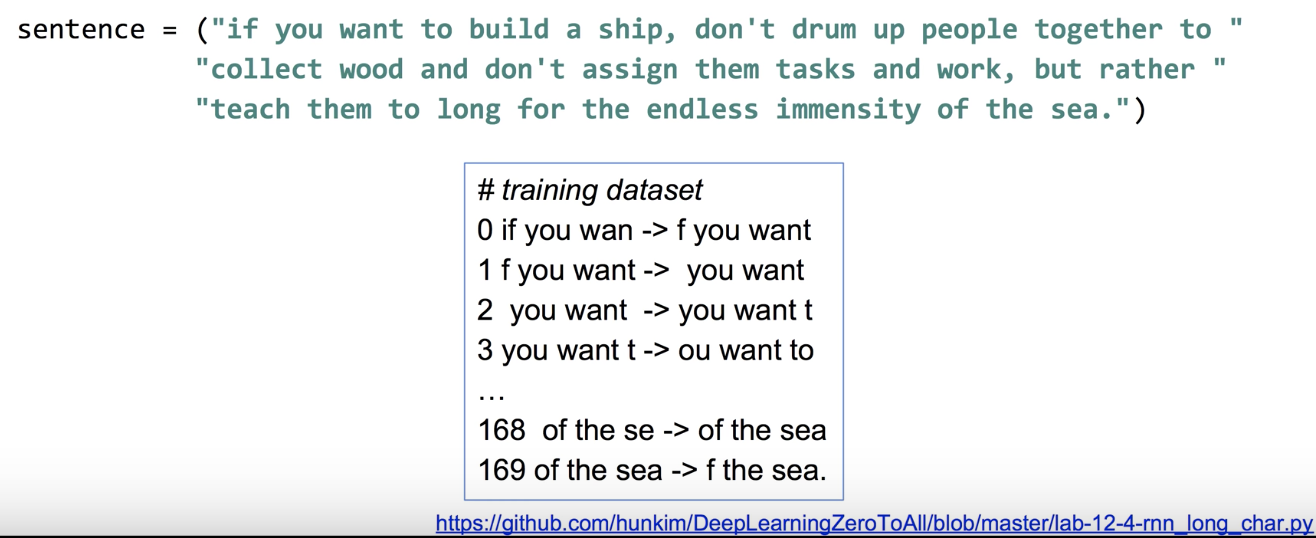

In [11]:
Image("img/TF_RNN6.png") # code안에서 나오게 할 때

In [25]:
tf.reset_default_graph()

## Stacked RNN

In [26]:
tf.set_random_seed(777)  # reproducibility

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x = [char_dic[c] for c in x_str]  # x str to index
    y = [char_dic[c] for c in y_str]  # y str to index

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X = tf.placeholder(tf.int32, [None, sequence_length])
Y = tf.placeholder(tf.int32, [None, sequence_length])

# One-hot encoding
X_one_hot = tf.one_hot(X, num_classes)

print(X_one_hot)  # check out the shape

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [20]:
# Make a lstm cell with hidden_size (each unit output vector size)
def lstm_cell():
    cell = rnn.BasicLSTMCell(hidden_size, state_is_tuple=True)
    return cell

# 여러개의 RNN cell 을 쌓겠다 -- Ex. 2개  range(2)
multi_cells = rnn.MultiRNNCell([lstm_cell() for _ in range(2)], state_is_tuple=True)

# outputs: unfolding size x hidden size, state = hidden size
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X_one_hot, dtype=tf.float32)


In [23]:

# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])

outputs = tf.contrib.layers.fully_connected(X_for_fc, num_classes, activation_fn=None)



In [10]:
# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])

# All weights are 1 (equal weights)
weights = tf.ones([batch_size, sequence_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)

mean_loss = tf.reduce_mean(sequence_loss)

train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mean_loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(500):
    _, l, results = sess.run(
        [train_op, mean_loss, outputs], feed_dict={X: dataX, Y: dataY})
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        print(i, j, ''.join([char_set[t] for t in index]), l)

# Let's print the last char of each result to check it works
results = sess.run(outputs, feed_dict={X: dataX})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:  # print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

2 138     oooooo 3.2055354
2 139      ooooo 3.2055354
2 140   oooooooo 3.2055354
2 141    ooooooo 3.2055354
2 142 o  ooooooo 3.2055354
2 143     oooooo 3.2055354
2 144     oooooo 3.2055354
2 145    ooooooo 3.2055354
2 146 oooooooooo 3.2055354
2 147   ooooooo  3.2055354
2 148   ooooooo  3.2055354
2 149  ooooooo o 3.2055354
2 150 oooooooooo 3.2055354
2 151    oo  ooo 3.2055354
2 152       oooo 3.2055354
2 153      ooooo 3.2055354
2 154     oooooo 3.2055354
2 155    oooooo  3.2055354
2 156     oooo o 3.2055354
2 157    oooo oo 3.2055354
2 158 oooooooooo 3.2055354
2 159    oo oooo 3.2055354
2 160   oooooooo 3.2055354
2 161   o oooooo 3.2055354
2 162     oooooo 3.2055354
2 163     oooooo 3.2055354
2 164     oooooo 3.2055354
2 165    ooooooo 3.2055354
2 166   oooooooo 3.2055354
2 167   ooooooo  3.2055354
2 168 oo ooooooo 3.2055354
2 169     oooooo 3.2055354
3 0            2.9610777
3 1            2.9610777
3 2            2.9610777
3 3            2.9610777
3 4            2.9610777
3 5        

5 3            2.8684154
5 4            2.8684154
5 5            2.8684154
5 6            2.8684154
5 7            2.8684154
5 8            2.8684154
5 9            2.8684154
5 10            2.8684154
5 11            2.8684154
5 12            2.8684154
5 13            2.8684154
5 14            2.8684154
5 15            2.8684154
5 16            2.8684154
5 17            2.8684154
5 18            2.8684154
5 19            2.8684154
5 20            2.8684154
5 21            2.8684154
5 22            2.8684154
5 23            2.8684154
5 24            2.8684154
5 25            2.8684154
5 26            2.8684154
5 27            2.8684154
5 28            2.8684154
5 29            2.8684154
5 30            2.8684154
5 31            2.8684154
5 32            2.8684154
5 33            2.8684154
5 34            2.8684154
5 35            2.8684154
5 36            2.8684154
5 37            2.8684154
5 38            2.8684154
5 39            2.8684154
5 40            2.8684154
5 41            2.8

7 0            2.8173065
7 1            2.8173065
7 2            2.8173065
7 3            2.8173065
7 4            2.8173065
7 5            2.8173065
7 6            2.8173065
7 7            2.8173065
7 8            2.8173065
7 9            2.8173065
7 10            2.8173065
7 11            2.8173065
7 12            2.8173065
7 13            2.8173065
7 14            2.8173065
7 15            2.8173065
7 16            2.8173065
7 17            2.8173065
7 18            2.8173065
7 19            2.8173065
7 20            2.8173065
7 21            2.8173065
7 22            2.8173065
7 23            2.8173065
7 24            2.8173065
7 25            2.8173065
7 26            2.8173065
7 27            2.8173065
7 28            2.8173065
7 29            2.8173065
7 30            2.8173065
7 31            2.8173065
7 32            2.8173065
7 33            2.8173065
7 34            2.8173065
7 35            2.8173065
7 36            2.8173065
7 37            2.8173065
7 38            2.8173

10 27            2.6478453
10 28            2.6478453
10 29            2.6478453
10 30            2.6478453
10 31            2.6478453
10 32            2.6478453
10 33            2.6478453
10 34            2.6478453
10 35            2.6478453
10 36            2.6478453
10 37            2.6478453
10 38            2.6478453
10 39            2.6478453
10 40          o 2.6478453
10 41         oo 2.6478453
10 42        ooo 2.6478453
10 43        oo  2.6478453
10 44       oo   2.6478453
10 45            2.6478453
10 46    oo      2.6478453
10 47   oo       2.6478453
10 48   o        2.6478453
10 49            2.6478453
10 50            2.6478453
10 51            2.6478453
10 52            2.6478453
10 53            2.6478453
10 54            2.6478453
10 55            2.6478453
10 56        o   2.6478453
10 57            2.6478453
10 58          o 2.6478453
10 59         oo 2.6478453
10 60          o 2.6478453
10 61   o   oooo 2.6478453
10 62       oooo 2.6478453
10 63       ooo  2.6478453
1

12 62  ooeoooooo 2.4469106
12 63   ttooooo  2.4469106
12 64  toooooon  2.4469106
12 65  tooooo  t 2.4469106
12 66  ooooo  td 2.4469106
12 67  oooo  td  2.4469106
12 68  ood  dd   2.4469106
12 69 todd ddd d 2.4469106
12 70  d  dd  d  2.4469106
12 71    dd  t   2.4469106
12 72   dd  t    2.4469106
12 73  ts  t     2.4469106
12 74 tso t      2.4469106
12 75  t t     t 2.4469106
12 76   td    td 2.4469106
12 77  td    td  2.4469106
12 78 ton   tt   2.4469106
12 79      tt    2.4469106
12 80     tt     2.4469106
12 81    ts      2.4469106
12 82   ts       2.4469106
12 83  oos n   s 2.4469106
12 84 tssss   s  2.4469106
12 85  s         2.4469106
12 86  ss   s    2.4469106
12 87  s  to   o 2.4469106
12 88 t  to  eoo 2.4469106
12 89  too  tooo 2.4469106
12 90  oo  eooos 2.4469106
12 91 toe  oooon 2.4469106
12 92     too n  2.4469106
12 93   tooosn   2.4469106
12 94  tooosn  s 2.4469106
12 95  too    s  2.4469106
12 96 too    n   2.4469106
12 97  ts   n    2.4469106
12 98  s   s   d 2.4469106
1

14 97  sss tsd o 2.2032487
14 98 sss tsd oo 2.2032487
14 99  n tsd ood 2.2032487
14 100 n oss ood  2.2032487
14 101  sss ood   2.2032487
14 102 ooodoodd   2.2032487
14 103 ss ood   d 2.2032487
14 104 t ood   du 2.2032487
14 105  oodd  du  2.2032487
14 106 oodd  tu   2.2032487
14 107 tn   du  t 2.2032487
14 108     tu  t  2.2032487
14 109    t   t t 2.2032487
14 110 n t   t tt 2.2032487
14 111  t   t tte 2.2032487
14 112 od  t tte  2.2032487
14 113    t tte   2.2032487
14 114   t tte  t 2.2032487
14 115  oethe  tt 2.2032487
14 116 oo t   tte 2.2032487
14 117   t   ttet 2.2032487
14 118 ss   tteto 2.2032487
14 119     toetoe 2.2032487
14 120    toetoet 2.2032487
14 121   toeooeto 2.2032487
14 122  toetoeeoe 2.2032487
14 123 ooeooeeoee 2.2032487
14 124  tssethe   2.2032487
14 125  sseehe et 2.2032487
14 126 ss ehe  to 2.2032487
14 127 eetoe  tol 2.2032487
14 128  toe  tolo 2.2032487
14 129 ooe  toloo 2.2032487
14 130     toeooo 2.2032487
14 131    toooood 2.2032487
14 132  tsoooon   2.203

18 0 o ao  tan' 1.6532078
18 1  to  tan'  1.6532078
18 2 oou tan' t 1.6532078
18 3    ton' th 1.6532078
18 4   ton' th  1.6532078
18 5  tond th t 1.6532078
18 6 oon' th tu 1.6532078
18 7 ond th tu  1.6532078
18 8 sd th tu   1.6532078
18 9 t th tu    1.6532078
18 10 hto tu     1.6532078
18 11 oo lu    a 1.6532078
18 12 h tu    an 1.6532078
18 13  au    ana 1.6532078
18 14 ou    anas 1.6532078
18 15    a anssi 1.6532078
18 16     anssi  1.6532078
18 17 os anasi   1.6532078
18 18 e anssi    1.6532078
18 19  anasi   a 1.6532078
18 20 osssi   an 1.6532078
18 21 sasi   aon 1.6532078
18 22 osi   aon' 1.6532078
18 23 s    aon't 1.6532078
18 24  t  aon't  1.6532078
18 25 o  aon't a 1.6532078
18 26   aon't ao 1.6532078
18 27  ann't an  1.6532078
18 28 oon't an   1.6532078
18 29  nut anu   1.6532078
18 30  't anu  t 1.6532078
18 31 tt aou  t  1.6532078
18 32   aou  t   1.6532078
18 33 hto   t  t 1.6532078
18 34 oo   t  te 1.6532078
18 35     t  teo 1.6532078
18 36    t  teol 1.6532078
18 37   t  

21 113  e tather  1.2790073
21 114   ttther t 1.2790073
21 115 htuthe  th 1.2790073
21 116 t the  tha 1.2790073
21 117  ther thas 1.2790073
21 118 sher toash 1.2790073
21 119 he  toashe 1.2790073
21 120 e  toashet 1.2790073
21 121 t toasheth 1.2790073
21 122  th shethe 1.2790073
21 123 th ehethe  1.2790073
21 124 h sh the   1.2790073
21 125 tsh the  t 1.2790073
21 126 sh the  to 1.2790073
21 127 hethe  to  1.2790073
21 128 ethe  to l 1.2790073
21 129 the  th lo 1.2790073
21 130 he  to lon 1.2790073
21 131 e  to lon' 1.2790073
21 132 t th lon'  1.2790073
21 133  th lon' t 1.2790073
21 134 th lon' to 1.2790073
21 135 h ton' too 1.2790073
21 136  oong too  1.2790073
21 137 tong tor t 1.2790073
21 138 e b too th 1.2790073
21 139  ' tor the 1.2790073
21 140 detoo the  1.2790073
21 141 etor the t 1.2790073
21 142 to  the to 1.2790073
21 143  r the too 1.2790073
21 144   the tool 1.2790073
21 145  the toole 1.2790073
21 146 the tooles 1.2790073
21 147 he tooless 1.2790073
21 148 e toolessi 1.

24 0 rntou bant 0.94534326
24 1  wou bant  0.94534326
24 2 tou bant t 0.94534326
24 3  u bant th 0.94534326
24 4 r tant th  0.94534326
24 5  band th b 0.94534326
24 6 tond th bu 0.94534326
24 7 ond th bu  0.94534326
24 8 sd th bu   0.94534326
24 9 d ta bu  d 0.94534326
24 10 hah bu  d  0.94534326
24 11 to lue d a 0.94534326
24 12 h lu  d a  0.94534326
24 13 rwue d a s 0.94534326
24 14 tue d a ss 0.94534326
24 15 ue d a ssi 0.94534326
24 16  ld anssip 0.94534326
24 17 rn anssip, 0.94534326
24 18 e anship,  0.94534326
24 19  anship, d 0.94534326
24 20 tnship, do 0.94534326
24 21 sssip  don 0.94534326
24 22 tsip  don' 0.94534326
24 23 sip  don't 0.94534326
24 24 er  don't  0.94534326
24 25 rm don't d 0.94534326
24 26   don't dr 0.94534326
24 27  don't dru 0.94534326
24 28 ton't dru  0.94534326
24 29  n't dru   0.94534326
24 30 r't dru  r 0.94534326
24 31 dt dru  rl 0.94534326
24 32 t dru  rl  0.94534326
24 33 hao   ll p 0.94534326
24 34 to   ll pe 0.94534326
24 35     rp peo 0.94534326
24

26 33 hwoum rl p 0.7715047
26 34 toum rl pe 0.7715047
26 35     rl peo 0.7715047
26 36    rp peop 0.7715047
26 37   rp peopp 0.7715047
26 38  tp peoppe 0.7715047
26 39 tl peoppe  0.7715047
26 40   people t 0.7715047
26 41  eeoppe to 0.7715047
26 42 teople tog 0.7715047
26 43  lple to e 0.7715047
26 44 srle toget 0.7715047
26 45 r e to eth 0.7715047
26 46  ectogethe 0.7715047
26 47 ectogether 0.7715047
26 48 sto ether  0.7715047
26 49 th ether t 0.7715047
26 50 h ether to 0.7715047
26 51 rether to  0.7715047
26 52 ether to e 0.7715047
26 53 sher to eo 0.7715047
26 54 her to eol 0.7715047
26 55 e  to eoll 0.7715047
26 56 s to bolle 0.7715047
26 57  to bollec 0.7715047
26 58 th bollect 0.7715047
26 59 h pollect  0.7715047
26 60 rbollect w 0.7715047
26 61 tollect wo 0.7715047
26 62 ollect woo 0.7715047
26 63 reect wood 0.7715047
26 64 eect wood  0.7715047
26 65 ect wood a 0.7715047
26 66 sh wood an 0.7715047
26 67 o tood ant 0.7715047
26 68 hwood ant  0.7715047
26 69 tord and a 0.7715047
2

30 0 m tou want 0.5383716
30 1  wou want  0.5383716
30 2 tou wont t 0.5383716
30 3  u want to 0.5383716
30 4 ripant to  0.5383716
30 5  lant to b 0.5383716
30 6 tond to bu 0.5383716
30 7 and to bui 0.5383716
30 8 sd to buil 0.5383716
30 9 d to luild 0.5383716
30 10 oao luild  0.5383716
30 11 th luild a 0.5383716
30 12 o cuild a  0.5383716
30 13 rpuild a s 0.5383716
30 14 tuild a sh 0.5383716
30 15 utld a shi 0.5383716
30 16  ld a ship 0.5383716
30 17 mn a ship, 0.5383716
30 18 e a ship,  0.5383716
30 19  anship, d 0.5383716
30 20 tnship, do 0.5383716
30 21 sship, don 0.5383716
30 22 tsip, don' 0.5383716
30 23 sip, don't 0.5383716
30 24 el, don't  0.5383716
30 25 m, don't a 0.5383716
30 26 l don't ar 0.5383716
30 27  don't aru 0.5383716
30 28 ton't arum 0.5383716
30 29  n't arum  0.5383716
30 30 r't drum u 0.5383716
30 31 dt arum up 0.5383716
30 32 t drum up  0.5383716
30 33 oaoum up p 0.5383716
30 34 toum up pe 0.5383716
30 35   m up peo 0.5383716
30 36  m up peop 0.5383716
30 37   up 

32 21 nship, don 0.4673148
32 22 tsip, don' 0.4673148
32 23 sip, don't 0.4673148
32 24 el, don't  0.4673148
32 25 p, don't d 0.4673148
32 26 l don't dr 0.4673148
32 27  don't dru 0.4673148
32 28 ton't drum 0.4673148
32 29  n't drum  0.4673148
32 30 r't drum u 0.4673148
32 31 dt drum up 0.4673148
32 32 t drum up  0.4673148
32 33  arum up p 0.4673148
32 34 toum up pe 0.4673148
32 35   m up peo 0.4673148
32 36  m up peop 0.4673148
32 37   up peopl 0.4673148
32 38  tp people 0.4673148
32 39 tp people  0.4673148
32 40   people t 0.4673148
32 41 lpeople to 0.4673148
32 42 teople tog 0.4673148
32 43 lcple toge 0.4673148
32 44 nlle toget 0.4673148
32 45 rle togeth 0.4673148
32 46 le togethe 0.4673148
32 47 o together 0.4673148
32 48 ntogether  0.4673148
32 49 to ether t 0.4673148
32 50   ether te 0.4673148
32 51 rether te  0.4673148
32 52  tter te c 0.4673148
32 53 nher te co 0.4673148
32 54  em te col 0.4673148
32 55 em te coll 0.4673148
32 56 n to colle 0.4673148
32 57  to collec 0.4673148
3

33 158 tmmensity  0.43882924
33 159 pmensity o 0.43882924
33 160  cnsity of 0.43882924
33 161  nsity of  0.43882924
33 162 rscty of t 0.43882924
33 163 dity of th 0.43882924
33 164 sgy of the 0.43882924
33 165 py of the  0.43882924
33 166   of the t 0.43882924
33 167  of the te 0.43882924
33 168 tf the tea 0.43882924
33 169 r the teah 0.43882924
34 0 p you want 0.41040882
34 1  wou want  0.41040882
34 2 tou want t 0.41040882
34 3 ou want to 0.41040882
34 4 r want to  0.41040882
34 5 iwant to b 0.41040882
34 6 tont to bu 0.41040882
34 7 ant to bui 0.41040882
34 8 nd to buil 0.41040882
34 9 d to build 0.41040882
34 10  ao build  0.41040882
34 11 to luild a 0.41040882
34 12   cuild a  0.41040882
34 13 rpuild a s 0.41040882
34 14 tutld a sh 0.41040882
34 15 utld a shi 0.41040882
34 16 ild a ship 0.41040882
34 17 po a ship, 0.41040882
34 18 o a ship,  0.41040882
34 19  anship, d 0.41040882
34 20 tnship, do 0.41040882
34 21 nship, don 0.41040882
34 22 tsip, don' 0.41040882
34 23 iip, don't 0

35 151 rdless imm 0.3880865
35 152 d ess imme 0.3880865
35 153  e s immen 0.3880865
35 154 ocs immens 0.3880865
35 155 rs immensi 0.3880865
35 156 iiimmensit 0.3880865
35 157 iimmensity 0.3880865
35 158 tmmensity  0.3880865
35 159 pmensity o 0.3880865
35 160  cnsity of 0.3880865
35 161  nsity of  0.3880865
35 162 rdity of t 0.3880865
35 163 dity of th 0.3880865
35 164 igy of the 0.3880865
35 165 py of the  0.3880865
35 166   of the e 0.3880865
35 167 oof the ee 0.3880865
35 168 tf the eea 0.3880865
35 169 r the eeah 0.3880865
36 0 p you want 0.36784858
36 1  wou want  0.36784858
36 2 tou want t 0.36784858
36 3 ou want to 0.36784858
36 4 n want to  0.36784858
36 5 iwant to b 0.36784858
36 6 tont to bu 0.36784858
36 7 ont to bui 0.36784858
36 8 nd to buil 0.36784858
36 9 d to build 0.36784858
36 10  ao build  0.36784858
36 11 to cuild a 0.36784858
36 12   cuild a  0.36784858
36 13 npuild a s 0.36784858
36 14 tuild a sh 0.36784858
36 15 uild a shi 0.36784858
36 16 ild a ship 0.36784858
36

37 149 rtndless i 0.3512294
37 150 tndless im 0.3512294
37 151 rsless imm 0.3512294
37 152 d ess imme 0.3512294
37 153  ess immen 0.3512294
37 154 ecs immens 0.3512294
37 155 rs immensi 0.3512294
37 156 iiimmensit 0.3512294
37 157 iimmensity 0.3512294
37 158 tmmensity  0.3512294
37 159 pmensity o 0.3512294
37 160  ensity of 0.3512294
37 161  nsity of  0.3512294
37 162 rsity of t 0.3512294
37 163 dity of th 0.3512294
37 164 igy of the 0.3512294
37 165 py of the  0.3512294
37 166 h of the s 0.3512294
37 167 oof the se 0.3512294
37 168 tf the sea 0.3512294
37 169 n the seah 0.3512294
38 0 p you want 0.33732074
38 1  you want  0.33732074
38 2 tou want t 0.33732074
38 3 ou want to 0.33732074
38 4 n want to  0.33732074
38 5 iwant to b 0.33732074
38 6 tont to bu 0.33732074
38 7 ont to bui 0.33732074
38 8 nd to buil 0.33732074
38 9 d to build 0.33732074
38 10 hao build  0.33732074
38 11 th cuild a 0.33732074
38 12 h luild a  0.33732074
38 13 nluild a s 0.33732074
38 14 tuild a sh 0.33732074
38

39 153  ess immen 0.32315132
39 154 ess immens 0.32315132
39 155 rs immensi 0.32315132
39 156 i immensit 0.32315132
39 157 iimmensity 0.32315132
39 158 tmmensity  0.32315132
39 159 lmensity o 0.32315132
39 160  ensity of 0.32315132
39 161  nsity of  0.32315132
39 162 rsity of t 0.32315132
39 163 dity of th 0.32315132
39 164 igy of the 0.32315132
39 165 ly of the  0.32315132
39 166 h of the s 0.32315132
39 167 oof the se 0.32315132
39 168 tf the sea 0.32315132
39 169 n the sea. 0.32315132
40 0 l you want 0.312316
40 1  you want  0.312316
40 2 tou want t 0.312316
40 3  u want to 0.312316
40 4 n want to  0.312316
40 5  want to b 0.312316
40 6 tont to bu 0.312316
40 7 ont to bui 0.312316
40 8 nd to buil 0.312316
40 9 d to build 0.312316
40 10  ro build  0.312316
40 11 to luild a 0.312316
40 12   luild a  0.312316
40 13 nluild a s 0.312316
40 14 tutld a sh 0.312316
40 15 uild a shi 0.312316
40 16  ld a ship 0.312316
40 17 ld a ship, 0.312316
40 18 e a ship,  0.312316
40 19  a ship, d 0.3123

43 105  aork, but 0.2870355
43 106 took, but  0.2870355
43 107 ook, but r 0.2870355
43 108   , but ra 0.2870355
43 109  , but rat 0.2870355
43 110 s but rath 0.2870355
43 111  but rathe 0.2870355
43 112 tui rather 0.2870355
43 113 ui rather  0.2870355
43 114 t rather t 0.2870355
43 115 hrather te 0.2870355
43 116 tather tea 0.2870355
43 117  ther teac 0.2870355
43 118 nher teach 0.2870355
43 119 hem toach  0.2870355
43 120 er teach t 0.2870355
43 121 m toach th 0.2870355
43 122  teach the 0.2870355
43 123 toach them 0.2870355
43 124 hach them  0.2870355
43 125 mch them t 0.2870355
43 126 nh them to 0.2870355
43 127 t them ta  0.2870355
43 128 ethem ta l 0.2870355
43 129 toem ta lo 0.2870355
43 130 hem to lon 0.2870355
43 131 er ta long 0.2870355
43 132 m to long  0.2870355
43 133  to long f 0.2870355
43 134 to long fo 0.2870355
43 135 h cong for 0.2870355
43 136  long for  0.2870355
43 137 tong for t 0.2870355
43 138 eng for th 0.2870355
43 139  ' for the 0.2870355
43 140 d for the  0.

47 0 l you want 0.26924074
47 1 oyou want  0.26924074
47 2 tou want t 0.26924074
47 3 ou want to 0.26924074
47 4   want to  0.26924074
47 5 pwant to b 0.26924074
47 6 tont to bu 0.26924074
47 7 ont to bui 0.26924074
47 8 nd to buil 0.26924074
47 9 d to build 0.26924074
47 10  to build  0.26924074
47 11 to luild a 0.26924074
47 12   build a  0.26924074
47 13  luild a s 0.26924074
47 14 tuild a sh 0.26924074
47 15 uild a shi 0.26924074
47 16 pld a ship 0.26924074
47 17 ld a ship, 0.26924074
47 18 e a ship,  0.26924074
47 19  a ship, d 0.26924074
47 20 tnship, do 0.26924074
47 21 nship, don 0.26924074
47 22 thip, don' 0.26924074
47 23  ip, don't 0.26924074
47 24 ep, don't  0.26924074
47 25 l, don't d 0.26924074
47 26   don't dr 0.26924074
47 27  bon't dru 0.26924074
47 28 ton't arum 0.26924074
47 29  n't drum  0.26924074
47 30  't drum u 0.26924074
47 31 dt arum up 0.26924074
47 32 t drum up  0.26924074
47 33  trum up p 0.26924074
47 34 toum up pe 0.26924074
47 35  um up peo 0.26924074
47

49 0 l you want 0.26252663
49 1  you want  0.26252663
49 2 tou want t 0.26252663
49 3  u want to 0.26252663
49 4   want to  0.26252663
49 5 pwant to b 0.26252663
49 6 tont to bu 0.26252663
49 7 ont to bui 0.26252663
49 8 nd to buil 0.26252663
49 9 d to build 0.26252663
49 10  wo build  0.26252663
49 11 to cuild a 0.26252663
49 12   build a  0.26252663
49 13  luild a s 0.26252663
49 14 tuild a sh 0.26252663
49 15 utld a shi 0.26252663
49 16 pld a ship 0.26252663
49 17 ld a ship, 0.26252663
49 18 e a ship,  0.26252663
49 19  a ship, d 0.26252663
49 20 tnship, do 0.26252663
49 21 nship, don 0.26252663
49 22 thip, don' 0.26252663
49 23  ip, don't 0.26252663
49 24 ep, don't  0.26252663
49 25 l, don't d 0.26252663
49 26   don't dr 0.26252663
49 27  don't dru 0.26252663
49 28 ton't drum 0.26252663
49 29  n't drum  0.26252663
49 30  't arum u 0.26252663
49 31 dt arum up 0.26252663
49 32 t drum up  0.26252663
49 33  wrum up p 0.26252663
49 34 toum up pe 0.26252663
49 35  um up peo 0.26252663
49

52 135 h bong for 0.25704405
52 136  cong for  0.25704405
52 137 tong for t 0.25704405
52 138 eng for th 0.25704405
52 139  ' for the 0.25704405
52 140 d for the  0.25704405
52 141 efor the e 0.25704405
52 142 tor the en 0.25704405
52 143  r the end 0.25704405
52 144  kthe endl 0.25704405
52 145  toe endle 0.25704405
52 146 themendles 0.25704405
52 147 herendless 0.25704405
52 148 emendless  0.25704405
52 149  endless i 0.25704405
52 150 tndless im 0.25704405
52 151  dless imm 0.25704405
52 152 d ess imme 0.25704405
52 153  ess immen 0.25704405
52 154 ess immens 0.25704405
52 155  s immensi 0.25704405
52 156 iiimmensit 0.25704405
52 157 iimmensity 0.25704405
52 158 tmmensity  0.25704405
52 159 lmensity o 0.25704405
52 160  ensity of 0.25704405
52 161  nsity of  0.25704405
52 162  dity of t 0.25704405
52 163 dity of th 0.25704405
52 164 igy of the 0.25704405
52 165 ly of the  0.25704405
52 166 h of the s 0.25704405
52 167 oof the se 0.25704405
52 168 tf the sea 0.25704405
52 169   the s

54 158 tmmensity  0.25637746
54 159 lmensity o 0.25637746
54 160  ensity of 0.25637746
54 161  nsity of  0.25637746
54 162  dity of t 0.25637746
54 163 dity of th 0.25637746
54 164 igy of the 0.25637746
54 165 ly of the  0.25637746
54 166   of the s 0.25637746
54 167  of the se 0.25637746
54 168 tf the sea 0.25637746
54 169   the sea. 0.25637746
55 0 l you want 0.2545301
55 1  you want  0.2545301
55 2 tou want t 0.2545301
55 3  u want to 0.2545301
55 4   want to  0.2545301
55 5  want to b 0.2545301
55 6 tont to bu 0.2545301
55 7 ont to bui 0.2545301
55 8 nd to buil 0.2545301
55 9 d to build 0.2545301
55 10  to build  0.2545301
55 11 th luild a 0.2545301
55 12   build a  0.2545301
55 13  cuild a s 0.2545301
55 14 tuild a sh 0.2545301
55 15 uild a shi 0.2545301
55 16  ld a ship 0.2545301
55 17 ld a ship, 0.2545301
55 18 e a ship,  0.2545301
55 19  anship, d 0.2545301
55 20 tnship, do 0.2545301
55 21 nship, don 0.2545301
55 22 thip, don' 0.2545301
55 23 sip, don't 0.2545301
55 24 ep, don'

58 129 toem ta lo 0.24810356
58 130 hem to lon 0.24810356
58 131 er ta long 0.24810356
58 132 r ta long  0.24810356
58 133  ta long f 0.24810356
58 134 to long fo 0.24810356
58 135 h cong for 0.24810356
58 136 ncong for  0.24810356
58 137 tong for t 0.24810356
58 138 eng for th 0.24810356
58 139 n' for the 0.24810356
58 140 d for the  0.24810356
58 141  for the e 0.24810356
58 142 tor the en 0.24810356
58 143  r the end 0.24810356
58 144 n the endl 0.24810356
58 145  the endle 0.24810356
58 146 toemendles 0.24810356
58 147 hemendless 0.24810356
58 148 erendless  0.24810356
58 149 rendless i 0.24810356
58 150 tndless im 0.24810356
58 151 rsless imm 0.24810356
58 152 d ess imme 0.24810356
58 153  ess immen 0.24810356
58 154 ess immens 0.24810356
58 155 rs immensi 0.24810356
58 156 s immensit 0.24810356
58 157 sammensity 0.24810356
58 158 tmmensity  0.24810356
58 159 lmensity o 0.24810356
58 160  ensity of 0.24810356
58 161  nsity of  0.24810356
58 162 rsity of t 0.24810356
58 163 dity of

60 80  't dssign 0.24847835
60 81 dt dssign  0.24847835
60 82 t dssign t 0.24847835
60 83  wssign th 0.24847835
60 84 tnsign the 0.24847835
60 85 nsign them 0.24847835
60 86 iign them  0.24847835
60 87 ign them t 0.24847835
60 88 ln them ta 0.24847835
60 89   them tas 0.24847835
60 90 dthem task 0.24847835
60 91 toem tasks 0.24847835
60 92  em tosks  0.24847835
60 93 em tasks a 0.24847835
60 94 r tasks an 0.24847835
60 95  tosks and 0.24847835
60 96 tosks and  0.24847835
60 97  sks and w 0.24847835
60 98 nss and wo 0.24847835
60 99 is and wor 0.24847835
60 100 s and work 0.24847835
60 101 iind work, 0.24847835
60 102 tnd work,  0.24847835
60 103 nd work, b 0.24847835
60 104 d work, bu 0.24847835
60 105  aork, but 0.24847835
60 106 tork, but  0.24847835
60 107 ook, but r 0.24847835
60 108   , but ra 0.24847835
60 109  , but rat 0.24847835
60 110 s but rath 0.24847835
60 111  dut rathe 0.24847835
60 112 tut rather 0.24847835
60 113 ui rather  0.24847835
60 114 i rather t 0.24847835
60 11

64 94 n tosks an 0.24609272
64 95  tasks and 0.24609272
64 96 tosks and  0.24609272
64 97 hsks and w 0.24609272
64 98 nss and wo 0.24609272
64 99  s and wor 0.24609272
64 100 , and work 0.24609272
64 101  and work, 0.24609272
64 102 tnd dork,  0.24609272
64 103 nd dork, b 0.24609272
64 104 d dork, bu 0.24609272
64 105  aork, but 0.24609272
64 106 took, but  0.24609272
64 107 ork, but r 0.24609272
64 108 nk, but ra 0.24609272
64 109  , but rat 0.24609272
64 110 , but rath 0.24609272
64 111  dut rathe 0.24609272
64 112 tut rather 0.24609272
64 113 ut rather  0.24609272
64 114 i rather t 0.24609272
64 115 hdather te 0.24609272
64 116 tather tea 0.24609272
64 117  ther teac 0.24609272
64 118 nher teach 0.24609272
64 119 her teach  0.24609272
64 120 er teach t 0.24609272
64 121 n teach th 0.24609272
64 122  teach the 0.24609272
64 123 toach them 0.24609272
64 124 hach them  0.24609272
64 125 nch them t 0.24609272
64 126 nh them to 0.24609272
64 127 t them to  0.24609272
64 128 ethem to l 0.

66 129 toem ta lo 0.24472606
66 130  em to lon 0.24472606
66 131 er to long 0.24472606
66 132 m to long  0.24472606
66 133  ta long f 0.24472606
66 134 to bong fo 0.24472606
66 135   bong for 0.24472606
66 136  bong for  0.24472606
66 137 tong for t 0.24472606
66 138 eng for th 0.24472606
66 139  ' for the 0.24472606
66 140 d for the  0.24472606
66 141 efor the e 0.24472606
66 142 tor the en 0.24472606
66 143 or the end 0.24472606
66 144   the endl 0.24472606
66 145  the endle 0.24472606
66 146 toemendles 0.24472606
66 147  emendless 0.24472606
66 148 erendless  0.24472606
66 149 mtndless i 0.24472606
66 150 tndless im 0.24472606
66 151 msless imm 0.24472606
66 152 d ess imme 0.24472606
66 153  ess immen 0.24472606
66 154 ess immens 0.24472606
66 155 ms immensi 0.24472606
66 156   immensit 0.24472606
66 157  immensity 0.24472606
66 158 tmmensity  0.24472606
66 159 lmensity o 0.24472606
66 160  ensity of 0.24472606
66 161  nsity of  0.24472606
66 162 msity of t 0.24472606
66 163 dity of

68 164 sgy of the 0.24219935
68 165 ly of the  0.24219935
68 166   of the s 0.24219935
68 167 oof the se 0.24219935
68 168 tf the sea 0.24219935
68 169   the sea. 0.24219935
69 0 l you want 0.24222237
69 1 oyou want  0.24222237
69 2 tou want t 0.24222237
69 3 ou want to 0.24222237
69 4 n want to  0.24222237
69 5  want to b 0.24222237
69 6 tont to bu 0.24222237
69 7 ont to bui 0.24222237
69 8 nd to buil 0.24222237
69 9 d to build 0.24222237
69 10 hto build  0.24222237
69 11 th cuild a 0.24222237
69 12 h build a  0.24222237
69 13 nbuild a s 0.24222237
69 14 tuild a sh 0.24222237
69 15 utld a shi 0.24222237
69 16  ld a ship 0.24222237
69 17 ld a ship, 0.24222237
69 18 e a ship,  0.24222237
69 19  anship, d 0.24222237
69 20 tnship, do 0.24222237
69 21 nship, don 0.24222237
69 22 thip, don' 0.24222237
69 23 sip, don't 0.24222237
69 24 ep, don't  0.24222237
69 25 l, don't d 0.24222237
69 26   don't dr 0.24222237
69 27  bon't dru 0.24222237
69 28 ton't drum 0.24222237
69 29  n't arum  0.24222

71 29  n't arum  0.24007134
71 30 n't arum u 0.24007134
71 31 dt drum up 0.24007134
71 32 t drum up  0.24007134
71 33 hrrum up p 0.24007134
71 34 toum up pe 0.24007134
71 35  um up peo 0.24007134
71 36  m up peop 0.24007134
71 37   up peopl 0.24007134
71 38  tp people 0.24007134
71 39 tp people  0.24007134
71 40   people t 0.24007134
71 41  people to 0.24007134
71 42 teople tog 0.24007134
71 43  ople toge 0.24007134
71 44 nple toget 0.24007134
71 45 nle togeth 0.24007134
71 46  e togethe 0.24007134
71 47 e together 0.24007134
71 48 ntogether  0.24007134
71 49 to ether t 0.24007134
71 50 h ether to 0.24007134
71 51 nether to  0.24007134
71 52 nther to c 0.24007134
71 53 nher to co 0.24007134
71 54 her te col 0.24007134
71 55 em to coll 0.24007134
71 56 n to colle 0.24007134
71 57  te collec 0.24007134
71 58 to lollect 0.24007134
71 59 h collect  0.24007134
71 60 nbollect w 0.24007134
71 61 tollect wo 0.24007134
71 62 tllect woo 0.24007134
71 63 nlect wood 0.24007134
71 64 eect wood  0.2

73 63 nlect wood 0.23945916
73 64 eect wood  0.23945916
73 65 e t wood a 0.23945916
73 66  t wood an 0.23945916
73 67 h wood and 0.23945916
73 68  wood and  0.23945916
73 69 tood and d 0.23945916
73 70 ord and do 0.23945916
73 71 nd and don 0.23945916
73 72 n and don' 0.23945916
73 73  and don't 0.23945916
73 74 tnd don't  0.23945916
73 75 nd don't a 0.23945916
73 76 d don't as 0.23945916
73 77  aon't ass 0.23945916
73 78 ton't assi 0.23945916
73 79  n't assig 0.23945916
73 80 n't assign 0.23945916
73 81 dt assign  0.23945916
73 82 t dssign t 0.23945916
73 83  wssign th 0.23945916
73 84 tnsign the 0.23945916
73 85 nsign them 0.23945916
73 86 iign them  0.23945916
73 87 ign them t 0.23945916
73 88 ln them ta 0.23945916
73 89   them tas 0.23945916
73 90 dthem task 0.23945916
73 91 toem tosks 0.23945916
73 92  em tasks  0.23945916
73 93 em tasks a 0.23945916
73 94   tasks an 0.23945916
73 95  tosks and 0.23945916
73 96 tosks and  0.23945916
73 97  sks and w 0.23945916
73 98 nss and wo 0.2

75 98 nss and wo 0.2388694
75 99  s and wor 0.2388694
75 100 s and work 0.2388694
75 101  ind work, 0.2388694
75 102 tnd work,  0.2388694
75 103 nd work, b 0.2388694
75 104 d work, bu 0.2388694
75 105  aork, but 0.2388694
75 106 tork, but  0.2388694
75 107 ook, but r 0.2388694
75 108   , but ra 0.2388694
75 109  , but rat 0.2388694
75 110 s but rath 0.2388694
75 111  dut rathe 0.2388694
75 112 tui rather 0.2388694
75 113 ut rather  0.2388694
75 114 p rather t 0.2388694
75 115 htather te 0.2388694
75 116 tather tea 0.2388694
75 117  ther teac 0.2388694
75 118 nher teach 0.2388694
75 119 hem teach  0.2388694
75 120 er teach t 0.2388694
75 121   toach th 0.2388694
75 122  thach the 0.2388694
75 123 toach them 0.2388694
75 124 hach them  0.2388694
75 125  ch them t 0.2388694
75 126 nh them to 0.2388694
75 127 h them to  0.2388694
75 128 ethem to l 0.2388694
75 129 toem to lo 0.2388694
75 130 hem to lon 0.2388694
75 131 er to long 0.2388694
75 132   to long  0.2388694
75 133  to long f 0.23

77 133  ta long f 0.23803537
77 134 to long fo 0.23803537
77 135   cong for 0.23803537
77 136  long for  0.23803537
77 137 tong for t 0.23803537
77 138 eng for th 0.23803537
77 139  ' for the 0.23803537
77 140 d for the  0.23803537
77 141  for the e 0.23803537
77 142 tor the en 0.23803537
77 143 or the end 0.23803537
77 144   the endl 0.23803537
77 145  the endle 0.23803537
77 146 toemendles 0.23803537
77 147  erendless 0.23803537
77 148 erendless  0.23803537
77 149  endless i 0.23803537
77 150 tndless im 0.23803537
77 151  dless imm 0.23803537
77 152 d ess imme 0.23803537
77 153  ess immen 0.23803537
77 154 ecs immens 0.23803537
77 155  s immensi 0.23803537
77 156   immensit 0.23803537
77 157  immensity 0.23803537
77 158 tmmensity  0.23803537
77 159 lmensity o 0.23803537
77 160  ensity of 0.23803537
77 161  nsity of  0.23803537
77 162  dity of t 0.23803537
77 163 dity of th 0.23803537
77 164  gy of the 0.23803537
77 165 ly of the  0.23803537
77 166   of the s 0.23803537
77 167  of the

79 168 tf the sea 0.2368614
79 169   the sea. 0.2368614
80 0 l you want 0.23693
80 1 oyou want  0.23693
80 2 tou want t 0.23693
80 3 ou want to 0.23693
80 4 n want to  0.23693
80 5  want to b 0.23693
80 6 tont to bu 0.23693
80 7 ont to bui 0.23693
80 8 nd to buil 0.23693
80 9 d to build 0.23693
80 10 hto build  0.23693
80 11 to build a 0.23693
80 12 h build a  0.23693
80 13 nbuild a s 0.23693
80 14 tuild a sh 0.23693
80 15 uild a shi 0.23693
80 16  ld a ship 0.23693
80 17 ld a ship, 0.23693
80 18 e a ship,  0.23693
80 19  anship, d 0.23693
80 20 tnship, do 0.23693
80 21 nship, don 0.23693
80 22 thip, don' 0.23693
80 23 iip, don't 0.23693
80 24 ep, don't  0.23693
80 25 l, don't d 0.23693
80 26 e don't dr 0.23693
80 27  don't dru 0.23693
80 28 ton't arum 0.23693
80 29  n't drum  0.23693
80 30 n't drum u 0.23693
80 31 dt arum up 0.23693
80 32 t drum up  0.23693
80 33 htrum up p 0.23693
80 34 toum up pe 0.23693
80 35  um up peo 0.23693
80 36  m up peop 0.23693
80 37   up peopl 0.23693
80 3

82 0 l you want 0.23610866
82 1  you want  0.23610866
82 2 tou want t 0.23610866
82 3 ou want to 0.23610866
82 4 n want to  0.23610866
82 5 iwant to b 0.23610866
82 6 tont to bu 0.23610866
82 7 ont to bui 0.23610866
82 8 nd to buil 0.23610866
82 9 d to build 0.23610866
82 10  ro build  0.23610866
82 11 to build a 0.23610866
82 12   build a  0.23610866
82 13 nluild a s 0.23610866
82 14 tutld a sh 0.23610866
82 15 uild a shi 0.23610866
82 16 ild a ship 0.23610866
82 17 ld a ship, 0.23610866
82 18 e a ship,  0.23610866
82 19  anship, d 0.23610866
82 20 tnship, do 0.23610866
82 21 nship, don 0.23610866
82 22 thip, don' 0.23610866
82 23 sip, don't 0.23610866
82 24 ep, don't  0.23610866
82 25 l, don't d 0.23610866
82 26 , don't dr 0.23610866
82 27  bon't dru 0.23610866
82 28 ton't arum 0.23610866
82 29  n't drum  0.23610866
82 30 n't drum u 0.23610866
82 31 dt arum up 0.23610866
82 32 t drum up  0.23610866
82 33  rrum up p 0.23610866
82 34 toum up pe 0.23610866
82 35  um up peo 0.23610866
82

85 148 emendless  0.23521896
85 149 mtndless i 0.23521896
85 150 tndless im 0.23521896
85 151 msless imm 0.23521896
85 152 d ess imme 0.23521896
85 153  ess immen 0.23521896
85 154 ecs immens 0.23521896
85 155 ms immensi 0.23521896
85 156 i immensit 0.23521896
85 157 iammensity 0.23521896
85 158 tmmensity  0.23521896
85 159 lmensity o 0.23521896
85 160  ensity of 0.23521896
85 161  nsity of  0.23521896
85 162 msity of t 0.23521896
85 163 dity of th 0.23521896
85 164 ity of the 0.23521896
85 165 ly of the  0.23521896
85 166   of the s 0.23521896
85 167  of the se 0.23521896
85 168 tf the sea 0.23521896
85 169 n the sea. 0.23521896
86 0 l you want 0.23519754
86 1  you want  0.23519754
86 2 tou want t 0.23519754
86 3 ou want to 0.23519754
86 4 n want to  0.23519754
86 5 iwant to b 0.23519754
86 6 tont to bu 0.23519754
86 7 ont to bui 0.23519754
86 8 nd to buil 0.23519754
86 9 d to build 0.23519754
86 10  to build  0.23519754
86 11 to cuild a 0.23519754
86 12   luild a  0.23519754
86 13 nl

88 0 l you want 0.23484401
88 1 oyou want  0.23484401
88 2 tou want t 0.23484401
88 3 ou want to 0.23484401
88 4   want to  0.23484401
88 5 iwant to b 0.23484401
88 6 tont to bu 0.23484401
88 7 ont to bui 0.23484401
88 8 nd to buil 0.23484401
88 9 d to build 0.23484401
88 10 hdo build  0.23484401
88 11 to build a 0.23484401
88 12 h luild a  0.23484401
88 13  cuild a s 0.23484401
88 14 tuild a sh 0.23484401
88 15 uild a shi 0.23484401
88 16 ild a ship 0.23484401
88 17 ld a ship, 0.23484401
88 18 e a ship,  0.23484401
88 19  anship, d 0.23484401
88 20 tnship, do 0.23484401
88 21 nship, don 0.23484401
88 22 thip, don' 0.23484401
88 23 iip, don't 0.23484401
88 24 ep, don't  0.23484401
88 25 l, don't d 0.23484401
88 26   don't dr 0.23484401
88 27  bon't dru 0.23484401
88 28 ton't arum 0.23484401
88 29  n't drum  0.23484401
88 30  't drum u 0.23484401
88 31 dt arum up 0.23484401
88 32 t drum up  0.23484401
88 33 hdrum up p 0.23484401
88 34 toum up pe 0.23484401
88 35  um up peo 0.23484401
88

91 127 h them to  0.23429021
91 128 ethem to l 0.23429021
91 129 toem to lo 0.23429021
91 130 her ta lon 0.23429021
91 131 er to long 0.23429021
91 132   to long  0.23429021
91 133  to long f 0.23429021
91 134 to bong fo 0.23429021
91 135 h long for 0.23429021
91 136  bong for  0.23429021
91 137 tong for t 0.23429021
91 138 eng for th 0.23429021
91 139  ' for the 0.23429021
91 140 d for the  0.23429021
91 141 nfor the e 0.23429021
91 142 tor the en 0.23429021
91 143 or the end 0.23429021
91 144  kthe endl 0.23429021
91 145  the endle 0.23429021
91 146 toemendles 0.23429021
91 147 herendless 0.23429021
91 148 erendless  0.23429021
91 149  endless i 0.23429021
91 150 tndless im 0.23429021
91 151  dless imm 0.23429021
91 152 d ess imme 0.23429021
91 153  ess immen 0.23429021
91 154 ess immens 0.23429021
91 155  s immensi 0.23429021
91 156 siimmensit 0.23429021
91 157 sammensity 0.23429021
91 158 tmmensity  0.23429021
91 159 lmensity o 0.23429021
91 160  ensity of 0.23429021
91 161  nsity 

95 50   ether to 0.23365965
95 51  ether to  0.23365965
95 52 ether to c 0.23365965
95 53  her to co 0.23365965
95 54  er te col 0.23365965
95 55 er te coll 0.23365965
95 56   to colle 0.23365965
95 57  to collec 0.23365965
95 58 to lollect 0.23365965
95 59   collect  0.23365965
95 60  bollect w 0.23365965
95 61 tollect wo 0.23365965
95 62 hllect woo 0.23365965
95 63  lect wood 0.23365965
95 64 eect wood  0.23365965
95 65 ect wood a 0.23365965
95 66  t wood an 0.23365965
95 67 h wood and 0.23365965
95 68  wood and  0.23365965
95 69 tord and d 0.23365965
95 70 ood and do 0.23365965
95 71  d and don 0.23365965
95 72   and don' 0.23365965
95 73  a d don't 0.23365965
95 74 tnd don't  0.23365965
95 75 nd won't a 0.23365965
95 76 d don't as 0.23365965
95 77  aon't ass 0.23365965
95 78 ton't dssi 0.23365965
95 79  n't dssig 0.23365965
95 80  't dssign 0.23365965
95 81 dt assign  0.23365965
95 82 t dssign t 0.23365965
95 83  wssign th 0.23365965
95 84 tnsign the 0.23365965
95 85 nsign them 0.2

98 0 l you want 0.23331966
98 1  you want  0.23331966
98 2 tou want t 0.23331966
98 3  u want to 0.23331966
98 4   want to  0.23331966
98 5  want to b 0.23331966
98 6 tont to bu 0.23331966
98 7 ont to bui 0.23331966
98 8 nd to buil 0.23331966
98 9 d to build 0.23331966
98 10  do build  0.23331966
98 11 to build a 0.23331966
98 12   build a  0.23331966
98 13  build a s 0.23331966
98 14 tuild a sh 0.23331966
98 15 uild a shi 0.23331966
98 16  ld a ship 0.23331966
98 17 ld a ship, 0.23331966
98 18 e a ship,  0.23331966
98 19  a ship, d 0.23331966
98 20 tnship, do 0.23331966
98 21 nship, don 0.23331966
98 22 thip, don' 0.23331966
98 23  ip, don't 0.23331966
98 24 ep, don't  0.23331966
98 25 l, don't d 0.23331966
98 26 , don't dr 0.23331966
98 27  bon't dru 0.23331966
98 28 ton't drum 0.23331966
98 29  n't drum  0.23331966
98 30  't drum u 0.23331966
98 31 dt arum up 0.23331966
98 32 t drum up  0.23331966
98 33  drum up p 0.23331966
98 34 toum up pe 0.23331966
98 35  um up peo 0.23331966
98

100 83  dssign th 0.233081
100 84 tnsign the 0.233081
100 85 nsign them 0.233081
100 86 iign them  0.233081
100 87 ign them t 0.233081
100 88 ln them ta 0.233081
100 89 n them tas 0.233081
100 90 dthem task 0.233081
100 91 toem tasks 0.233081
100 92  er tasks  0.233081
100 93 em tasks a 0.233081
100 94 r tasks an 0.233081
100 95  tasks and 0.233081
100 96 tosks and  0.233081
100 97  sks and w 0.233081
100 98 nss and wo 0.233081
100 99 is and wor 0.233081
100 100 , and work 0.233081
100 101 iind work, 0.233081
100 102 tnd dork,  0.233081
100 103 nd dork, b 0.233081
100 104 d work, bu 0.233081
100 105  aork, but 0.233081
100 106 tork, but  0.233081
100 107 ork, but r 0.233081
100 108 nk, but ra 0.233081
100 109  , but rat 0.233081
100 110 , but rath 0.233081
100 111  but rathe 0.233081
100 112 tui rather 0.233081
100 113 ui rather  0.233081
100 114 m rather t 0.233081
100 115  dather te 0.233081
100 116 tather tea 0.233081
100 117  ther teac 0.233081
100 118 nher teach 0.233081
100 119  

102 132 n ta long  0.2329115
102 133  to long f 0.2329115
102 134 to long fo 0.2329115
102 135 h bong for 0.2329115
102 136  bong for  0.2329115
102 137 tong for t 0.2329115
102 138 eng for th 0.2329115
102 139  ' for the 0.2329115
102 140 d for the  0.2329115
102 141 nfor the e 0.2329115
102 142 tor the en 0.2329115
102 143 or the end 0.2329115
102 144   the endl 0.2329115
102 145  tee endle 0.2329115
102 146 toemendles 0.2329115
102 147 hemendless 0.2329115
102 148 emendless  0.2329115
102 149 ntndless i 0.2329115
102 150 tndless im 0.2329115
102 151 ndless imm 0.2329115
102 152 d ess imme 0.2329115
102 153  ess immen 0.2329115
102 154 ess immens 0.2329115
102 155 ns immensi 0.2329115
102 156   immensit 0.2329115
102 157  immensity 0.2329115
102 158 tmmensity  0.2329115
102 159 lmensity o 0.2329115
102 160  ensity of 0.2329115
102 161  nsity of  0.2329115
102 162 ndity of t 0.2329115
102 163 dity of th 0.2329115
102 164  ty of the 0.2329115
102 165 ly of the  0.2329115
102 166 h of t

105 0 l you want 0.2325975
105 1 oyou want  0.2325975
105 2 tou want t 0.2325975
105 3 ou want to 0.2325975
105 4   want to  0.2325975
105 5 iwant to b 0.2325975
105 6 tont to bu 0.2325975
105 7 ont to bui 0.2325975
105 8 nd to buil 0.2325975
105 9 d to build 0.2325975
105 10 hto build  0.2325975
105 11 to luild a 0.2325975
105 12 h cuild a  0.2325975
105 13  luild a s 0.2325975
105 14 tuild a sh 0.2325975
105 15 utld a shi 0.2325975
105 16 ild a ship 0.2325975
105 17 ld a ship, 0.2325975
105 18 e a ship,  0.2325975
105 19  anship, d 0.2325975
105 20 tnship, do 0.2325975
105 21 nship, don 0.2325975
105 22 thip, don' 0.2325975
105 23 sip, don't 0.2325975
105 24 ep, don't  0.2325975
105 25 l, don't d 0.2325975
105 26   don't dr 0.2325975
105 27  bon't dru 0.2325975
105 28 ton't arum 0.2325975
105 29  n't drum  0.2325975
105 30  't arum u 0.2325975
105 31 dt arum up 0.2325975
105 32 t drum up  0.2325975
105 33 htrum up p 0.2325975
105 34 toum up pe 0.2325975
105 35  um up peo 0.2325975
10

107 58 to lollect 0.23248862
107 59   bollect  0.23248862
107 60  lollect w 0.23248862
107 61 tollect wo 0.23248862
107 62 ollect woo 0.23248862
107 63  lect wood 0.23248862
107 64 eect wood  0.23248862
107 65 est wood a 0.23248862
107 66 rt wood an 0.23248862
107 67 o wood and 0.23248862
107 68  aood and  0.23248862
107 69 tord and d 0.23248862
107 70 ord and do 0.23248862
107 71  d and don 0.23248862
107 72   and don' 0.23248862
107 73  a d don't 0.23248862
107 74 tnd won't  0.23248862
107 75 nd don't a 0.23248862
107 76 d won't as 0.23248862
107 77  aon't ass 0.23248862
107 78 ton't dssi 0.23248862
107 79  n't dssig 0.23248862
107 80  't dssign 0.23248862
107 81 dt dssign  0.23248862
107 82 t dssign t 0.23248862
107 83  assign th 0.23248862
107 84 tnsign the 0.23248862
107 85 nkign them 0.23248862
107 86 iign them  0.23248862
107 87 itn them t 0.23248862
107 88 ln them ta 0.23248862
107 89   them tas 0.23248862
107 90 dthem task 0.23248862
107 91 toem tosks 0.23248862
107 92  em tos

109 103 nd dork, b 0.23236914
109 104 d dork, bu 0.23236914
109 105  aork, but 0.23236914
109 106 took, but  0.23236914
109 107 ook, but r 0.23236914
109 108   , but ra 0.23236914
109 109  , but rat 0.23236914
109 110 , but rath 0.23236914
109 111  dut rathe 0.23236914
109 112 tui rather 0.23236914
109 113 ut rather  0.23236914
109 114   rather t 0.23236914
109 115  wather te 0.23236914
109 116 tather tea 0.23236914
109 117  ther teac 0.23236914
109 118 nher teach 0.23236914
109 119  er toach  0.23236914
109 120 er teach t 0.23236914
109 121 r toach th 0.23236914
109 122  toach the 0.23236914
109 123 toach them 0.23236914
109 124  ach them  0.23236914
109 125 rch them t 0.23236914
109 126 nh them to 0.23236914
109 127 h them to  0.23236914
109 128 ethem to l 0.23236914
109 129 toem to lo 0.23236914
109 130  er to lon 0.23236914
109 131 er to long 0.23236914
109 132 r to long  0.23236914
109 133  ta long f 0.23236914
109 134 to long fo 0.23236914
109 135   bong for 0.23236914
109 136  l

111 117  ther teac 0.232277
111 118 nher teach 0.232277
111 119 hem teach  0.232277
111 120 em teach t 0.232277
111 121 r teach th 0.232277
111 122  toach the 0.232277
111 123 toach them 0.232277
111 124 hach them  0.232277
111 125 rch them t 0.232277
111 126 nh them to 0.232277
111 127 o them to  0.232277
111 128 ethem to l 0.232277
111 129 toem ta lo 0.232277
111 130 hem ta lon 0.232277
111 131 em ta long 0.232277
111 132 r to long  0.232277
111 133  ta long f 0.232277
111 134 to long fo 0.232277
111 135 h bong for 0.232277
111 136 nlong for  0.232277
111 137 tong for t 0.232277
111 138 eng for th 0.232277
111 139 n' for the 0.232277
111 140 d for the  0.232277
111 141 nfor the e 0.232277
111 142 tor the en 0.232277
111 143 or the end 0.232277
111 144 nkthe endl 0.232277
111 145  toe endle 0.232277
111 146 toemendles 0.232277
111 147 hemendless 0.232277
111 148 emendless  0.232277
111 149 rendless i 0.232277
111 150 tndless im 0.232277
111 151 rdless imm 0.232277
111 152 d ess imme 0

114 0 l you want 0.23223042
114 1 oyou want  0.23223042
114 2 tou want t 0.23223042
114 3  u want to 0.23223042
114 4   want to  0.23223042
114 5 iwant to b 0.23223042
114 6 tont to bu 0.23223042
114 7 ont to bui 0.23223042
114 8 nd to buil 0.23223042
114 9 d to build 0.23223042
114 10 hto build  0.23223042
114 11 th build a 0.23223042
114 12 h build a  0.23223042
114 13  build a s 0.23223042
114 14 tuild a sh 0.23223042
114 15 utld a shi 0.23223042
114 16 ild a ship 0.23223042
114 17 ld a ship, 0.23223042
114 18 e a ship,  0.23223042
114 19  anship, d 0.23223042
114 20 tnship, do 0.23223042
114 21 nship, don 0.23223042
114 22 thip, don' 0.23223042
114 23  ip, don't 0.23223042
114 24 ep, don't  0.23223042
114 25 l, don't d 0.23223042
114 26   don't dr 0.23223042
114 27  don't dru 0.23223042
114 28 ton't arum 0.23223042
114 29  n't drum  0.23223042
114 30  't drum u 0.23223042
114 31 dt arum up 0.23223042
114 32 t arum up  0.23223042
114 33 htrum up p 0.23223042
114 34 toum up pe 0.2322

116 62 tllect woo 0.23239811
116 63 nlect wood 0.23239811
116 64 eect wood  0.23239811
116 65 e t wood a 0.23239811
116 66  t wood an 0.23239811
116 67 t wood and 0.23239811
116 68 htood and  0.23239811
116 69 tood and d 0.23239811
116 70 ood and do 0.23239811
116 71 nd and don 0.23239811
116 72 n and don' 0.23239811
116 73  and don't 0.23239811
116 74 tnd won't  0.23239811
116 75 nd won't a 0.23239811
116 76 d won't as 0.23239811
116 77  aon't ass 0.23239811
116 78 ton't assi 0.23239811
116 79  n't dssig 0.23239811
116 80 n't dssign 0.23239811
116 81 dt assign  0.23239811
116 82 t assign t 0.23239811
116 83 htssign th 0.23239811
116 84 tnsign the 0.23239811
116 85 nsign them 0.23239811
116 86 iign them  0.23239811
116 87 ign them t 0.23239811
116 88 ln them ta 0.23239811
116 89 n them tas 0.23239811
116 90 dthem task 0.23239811
116 91 them tasks 0.23239811
116 92 her tasks  0.23239811
116 93 er tasks a 0.23239811
116 94   tasks an 0.23239811
116 95  tasks and 0.23239811
116 96 thsks a

118 132 n ta long  0.23221885
118 133  ta long f 0.23221885
118 134 th bong fo 0.23221885
118 135 h cong for 0.23221885
118 136 nbong for  0.23221885
118 137 tong for t 0.23221885
118 138 eng for th 0.23221885
118 139 n' for the 0.23221885
118 140 d for the  0.23221885
118 141 nfor the e 0.23221885
118 142 tor the en 0.23221885
118 143  r the end 0.23221885
118 144 n the endl 0.23221885
118 145  the endle 0.23221885
118 146 themendles 0.23221885
118 147 herendless 0.23221885
118 148 erendless  0.23221885
118 149 nendless i 0.23221885
118 150 tndless im 0.23221885
118 151 ndless imm 0.23221885
118 152 d ess imme 0.23221885
118 153  ess immen 0.23221885
118 154 ess immens 0.23221885
118 155 ns immensi 0.23221885
118 156 s immensit 0.23221885
118 157 simmensity 0.23221885
118 158 tmmensity  0.23221885
118 159 mmensity o 0.23221885
118 160  ensity of 0.23221885
118 161  nsity of  0.23221885
118 162 ndity of t 0.23221885
118 163 dity of th 0.23221885
118 164 sgy of the 0.23221885
118 165 my

121 0 l you want 0.23165604
121 1  you want  0.23165604
121 2 tou want t 0.23165604
121 3 ou want to 0.23165604
121 4   want to  0.23165604
121 5  want to b 0.23165604
121 6 tont to bu 0.23165604
121 7 ont to bui 0.23165604
121 8 nd to buil 0.23165604
121 9 d to build 0.23165604
121 10  to build  0.23165604
121 11 to build a 0.23165604
121 12   cuild a  0.23165604
121 13  luild a s 0.23165604
121 14 tutld a sh 0.23165604
121 15 utld a shi 0.23165604
121 16  ld a ship 0.23165604
121 17 ld a ship, 0.23165604
121 18 e a ship,  0.23165604
121 19  a ship, d 0.23165604
121 20 tnship, do 0.23165604
121 21 nship, don 0.23165604
121 22 thip, don' 0.23165604
121 23 iip, don't 0.23165604
121 24 ep, don't  0.23165604
121 25 l, don't d 0.23165604
121 26   don't dr 0.23165604
121 27  don't dru 0.23165604
121 28 ton't arum 0.23165604
121 29  n't drum  0.23165604
121 30  't drum u 0.23165604
121 31 dt arum up 0.23165604
121 32 t arum up  0.23165604
121 33  trum up p 0.23165604
121 34 toum up pe 0.2316

123 47 e together 0.23173289
123 48 reogether  0.23173289
123 49 to ether t 0.23173289
123 50 h ether to 0.23173289
123 51 nether to  0.23173289
123 52 nther to c 0.23173289
123 53 rher to co 0.23173289
123 54 hem to col 0.23173289
123 55 em to coll 0.23173289
123 56 r to colle 0.23173289
123 57  th collec 0.23173289
123 58 to collect 0.23173289
123 59 h lollect  0.23173289
123 60 nlollect w 0.23173289
123 61 tollect wo 0.23173289
123 62 ollect woo 0.23173289
123 63 nlect wood 0.23173289
123 64 eect wood  0.23173289
123 65 e t wood a 0.23173289
123 66 rt wood an 0.23173289
123 67 o wood and 0.23173289
123 68 htood and  0.23173289
123 69 tord and d 0.23173289
123 70 ood and do 0.23173289
123 71 nd and don 0.23173289
123 72 n and don' 0.23173289
123 73  and don't 0.23173289
123 74 tnd won't  0.23173289
123 75 nd won't a 0.23173289
123 76 d won't as 0.23173289
123 77  aon't ass 0.23173289
123 78 ton't assi 0.23173289
123 79  n't assig 0.23173289
123 80 n't dssign 0.23173289
123 81 dt assi

125 156 iiimmensit 0.23163164
125 157 iimmensity 0.23163164
125 158 tmmensity  0.23163164
125 159 lmensity o 0.23163164
125 160  ensity of 0.23163164
125 161  nsity of  0.23163164
125 162 ndity of t 0.23163164
125 163 dity of th 0.23163164
125 164 igy of the 0.23163164
125 165 ly of the  0.23163164
125 166   of the s 0.23163164
125 167  of the se 0.23163164
125 168 tf the sea 0.23163164
125 169   the sea. 0.23163164
126 0 l you want 0.23156555
126 1 oyou want  0.23156555
126 2 tou want t 0.23156555
126 3 ou want to 0.23156555
126 4   want to  0.23156555
126 5 iwant to b 0.23156555
126 6 tont to bu 0.23156555
126 7 ont to bui 0.23156555
126 8 nd to buil 0.23156555
126 9 d to build 0.23156555
126 10 hdo build  0.23156555
126 11 to luild a 0.23156555
126 12 h cuild a  0.23156555
126 13  build a s 0.23156555
126 14 tuild a sh 0.23156555
126 15 utld a shi 0.23156555
126 16 ild a ship 0.23156555
126 17 ld a ship, 0.23156555
126 18 e a ship,  0.23156555
126 19  a ship, d 0.23156555
126 20 tns

128 11 to build a 0.23131026
128 12   luild a  0.23131026
128 13 nbuild a s 0.23131026
128 14 tuild a sh 0.23131026
128 15 utld a shi 0.23131026
128 16 ild a ship 0.23131026
128 17 ld a ship, 0.23131026
128 18 e a ship,  0.23131026
128 19  anship, d 0.23131026
128 20 tnship, do 0.23131026
128 21 nship, don 0.23131026
128 22 thip, don' 0.23131026
128 23 iip, don't 0.23131026
128 24 ep, don't  0.23131026
128 25 l, don't d 0.23131026
128 26   don't dr 0.23131026
128 27  don't dru 0.23131026
128 28 ton't arum 0.23131026
128 29  n't drum  0.23131026
128 30 n't drum u 0.23131026
128 31 dt arum up 0.23131026
128 32 t drum up  0.23131026
128 33  trum up p 0.23131026
128 34 toum up pe 0.23131026
128 35  um up peo 0.23131026
128 36  m up peop 0.23131026
128 37 i up peopl 0.23131026
128 38  tp people 0.23131026
128 39 tp people  0.23131026
128 40 i people t 0.23131026
128 41  people to 0.23131026
128 42 teople tog 0.23131026
128 43  ople toge 0.23131026
128 44 rple toget 0.23131026
128 45 nle tog

130 52  ther to c 0.23136072
130 53 rher to co 0.23136072
130 54 hem te col 0.23136072
130 55 em to coll 0.23136072
130 56 r to colle 0.23136072
130 57  th collec 0.23136072
130 58 to collect 0.23136072
130 59 h bollect  0.23136072
130 60  bollect w 0.23136072
130 61 tollect wo 0.23136072
130 62 tllect woo 0.23136072
130 63  lect wood 0.23136072
130 64 eect wood  0.23136072
130 65 e t wood a 0.23136072
130 66 rt wood an 0.23136072
130 67 t wood and 0.23136072
130 68 htood and  0.23136072
130 69 tord and d 0.23136072
130 70 ord and do 0.23136072
130 71  d and don 0.23136072
130 72   and don' 0.23136072
130 73  a d don't 0.23136072
130 74 tnd won't  0.23136072
130 75 nd won't a 0.23136072
130 76 d won't as 0.23136072
130 77  aon't ass 0.23136072
130 78 ton't assi 0.23136072
130 79  n't assig 0.23136072
130 80  't dssign 0.23136072
130 81 dt assign  0.23136072
130 82 t assign t 0.23136072
130 83 htssign th 0.23136072
130 84 tnsign the 0.23136072
130 85 nsign them 0.23136072
130 86 i gn th

132 93 em tasks a 0.23133071
132 94 n tasks an 0.23133071
132 95  tasks and 0.23133071
132 96 tosks and  0.23133071
132 97  sks and w 0.23133071
132 98 nss and wo 0.23133071
132 99 ss and wor 0.23133071
132 100 s and work 0.23133071
132 101 sand work, 0.23133071
132 102 tnd work,  0.23133071
132 103 nd work, b 0.23133071
132 104 d work, bu 0.23133071
132 105  aork, but 0.23133071
132 106 took, but  0.23133071
132 107 ook, but r 0.23133071
132 108 n , but ra 0.23133071
132 109  , but rat 0.23133071
132 110 s but rath 0.23133071
132 111  dut rathe 0.23133071
132 112 tut rather 0.23133071
132 113 ut rather  0.23133071
132 114 i rather t 0.23133071
132 115  tather te 0.23133071
132 116 tather tea 0.23133071
132 117  ther teac 0.23133071
132 118 nher teach 0.23133071
132 119  er toach  0.23133071
132 120 em toach t 0.23133071
132 121 n toach th 0.23133071
132 122  thach the 0.23133071
132 123 toach them 0.23133071
132 124  ach them  0.23133071
132 125 nch them t 0.23133071
132 126 nh them t

134 147 hemendless 0.23114029
134 148 emendless  0.23114029
134 149 nendless i 0.23114029
134 150 tndless im 0.23114029
134 151 ndless imm 0.23114029
134 152 d ess imme 0.23114029
134 153  ess immen 0.23114029
134 154 e s immens 0.23114029
134 155 ns immensi 0.23114029
134 156 i immensit 0.23114029
134 157 iimmensity 0.23114029
134 158 tmmensity  0.23114029
134 159 lmensity o 0.23114029
134 160  ensity of 0.23114029
134 161  nsity of  0.23114029
134 162 ndity of t 0.23114029
134 163 dity of th 0.23114029
134 164 igy of the 0.23114029
134 165 ly of the  0.23114029
134 166 h of the s 0.23114029
134 167 oof the se 0.23114029
134 168 tf the sea 0.23114029
134 169   the sea. 0.23114029
135 0 l you want 0.23107974
135 1 oyou want  0.23107974
135 2 tou want t 0.23107974
135 3 ou want to 0.23107974
135 4   want to  0.23107974
135 5 iwant to b 0.23107974
135 6 tont to bu 0.23107974
135 7 ont to bui 0.23107974
135 8 nd to buil 0.23107974
135 9 d to build 0.23107974
135 10 hdo build  0.23107974
1

137 63  lect wood 0.23098569
137 64 eect wood  0.23098569
137 65 e t wood a 0.23098569
137 66 nt wood an 0.23098569
137 67 h wood and 0.23098569
137 68  tood and  0.23098569
137 69 tood and d 0.23098569
137 70 ood and do 0.23098569
137 71  d and don 0.23098569
137 72   and don' 0.23098569
137 73  a d don't 0.23098569
137 74 tnd won't  0.23098569
137 75 nd won't a 0.23098569
137 76 d won't as 0.23098569
137 77  aon't ass 0.23098569
137 78 ton't assi 0.23098569
137 79  n't dssig 0.23098569
137 80  't dssign 0.23098569
137 81 dt assign  0.23098569
137 82 t dssign t 0.23098569
137 83  tssign th 0.23098569
137 84 tnsign the 0.23098569
137 85 nsign them 0.23098569
137 86 i gn them  0.23098569
137 87 ign them t 0.23098569
137 88 ln them ta 0.23098569
137 89   them tas 0.23098569
137 90 dthem task 0.23098569
137 91 toem tosks 0.23098569
137 92  em tosks  0.23098569
137 93 er tosks a 0.23098569
137 94 n tosks an 0.23098569
137 95  tasks and 0.23098569
137 96 tosks and  0.23098569
137 97  sks an

139 90 dthem task 0.23094924
139 91 toem tosks 0.23094924
139 92 her tosks  0.23094924
139 93 em tosks a 0.23094924
139 94 r tosks an 0.23094924
139 95  tasks and 0.23094924
139 96 tosks and  0.23094924
139 97 hsks and w 0.23094924
139 98 nss and wo 0.23094924
139 99 is and wor 0.23094924
139 100 s and work 0.23094924
139 101 iand work, 0.23094924
139 102 tnd work,  0.23094924
139 103 nd work, b 0.23094924
139 104 d work, bu 0.23094924
139 105  aork, but 0.23094924
139 106 tork, but  0.23094924
139 107 ork, but r 0.23094924
139 108   , but ra 0.23094924
139 109  , but rat 0.23094924
139 110 s but rath 0.23094924
139 111  but rathe 0.23094924
139 112 tui rather 0.23094924
139 113 ut rather  0.23094924
139 114 i rather t 0.23094924
139 115 htather te 0.23094924
139 116 tather tea 0.23094924
139 117  ther teac 0.23094924
139 118 nher teach 0.23094924
139 119 her toach  0.23094924
139 120 em toach t 0.23094924
139 121 r toach th 0.23094924
139 122  teach the 0.23094924
139 123 toach them 0

141 124 hach them  0.23098427
141 125 nch them t 0.23098427
141 126 nh them to 0.23098427
141 127 t them to  0.23098427
141 128 ethem to l 0.23098427
141 129 toem to lo 0.23098427
141 130 her to lon 0.23098427
141 131 em to long 0.23098427
141 132 n to long  0.23098427
141 133  ta long f 0.23098427
141 134 to cong fo 0.23098427
141 135 h long for 0.23098427
141 136  bong for  0.23098427
141 137 tong for t 0.23098427
141 138 eng for th 0.23098427
141 139  ' for the 0.23098427
141 140 d for the  0.23098427
141 141 nfor the e 0.23098427
141 142 tor the en 0.23098427
141 143  r the end 0.23098427
141 144  kthe endl 0.23098427
141 145  the endle 0.23098427
141 146 toemendles 0.23098427
141 147 herendless 0.23098427
141 148 emendless  0.23098427
141 149 nendless i 0.23098427
141 150 tndless im 0.23098427
141 151 ndless imm 0.23098427
141 152 d ess imme 0.23098427
141 153  ess immen 0.23098427
141 154 e s immens 0.23098427
141 155 ns immensi 0.23098427
141 156 s immensit 0.23098427
141 157 si

143 159 mmensity o 0.2313056
143 160  ensity of 0.2313056
143 161  nsity of  0.2313056
143 162  sity of t 0.2313056
143 163 dity of th 0.2313056
143 164 ity of the 0.2313056
143 165 my of the  0.2313056
143 166   of the s 0.2313056
143 167  of the se 0.2313056
143 168 tf the sea 0.2313056
143 169   the sea. 0.2313056
144 0 l you want 0.2316179
144 1 oyou want  0.2316179
144 2 tou want t 0.2316179
144 3 ou want to 0.2316179
144 4   want to  0.2316179
144 5 iwant to b 0.2316179
144 6 tont to bu 0.2316179
144 7 ont to bui 0.2316179
144 8 nd to buil 0.2316179
144 9 d to build 0.2316179
144 10  do build  0.2316179
144 11 to luild a 0.2316179
144 12   build a  0.2316179
144 13  luild a s 0.2316179
144 14 tuild a sh 0.2316179
144 15 utld a shi 0.2316179
144 16 ild a ship 0.2316179
144 17 ld a ship, 0.2316179
144 18 e a ship,  0.2316179
144 19  anship, d 0.2316179
144 20 tnship, do 0.2316179
144 21 nship, don 0.2316179
144 22 thip, don' 0.2316179
144 23 sip, don't 0.2316179
144 24 ep, don't  0

146 24 ep, don't  0.23117809
146 25 l, don't d 0.23117809
146 26   don't dr 0.23117809
146 27  don't dru 0.23117809
146 28 ton't drum 0.23117809
146 29  n't drum  0.23117809
146 30  't drum u 0.23117809
146 31 dt drum up 0.23117809
146 32 t drum up  0.23117809
146 33 hrrum up p 0.23117809
146 34 toum up pe 0.23117809
146 35  um up peo 0.23117809
146 36  m up peop 0.23117809
146 37 i up peopl 0.23117809
146 38  tp people 0.23117809
146 39 tp people  0.23117809
146 40 i people t 0.23117809
146 41  people to 0.23117809
146 42 teople tog 0.23117809
146 43  ople toge 0.23117809
146 44 rple toget 0.23117809
146 45  le togeth 0.23117809
146 46  e togethe 0.23117809
146 47 ectogether 0.23117809
146 48 rtogether  0.23117809
146 49 to ether t 0.23117809
146 50 h ether to 0.23117809
146 51  ether to  0.23117809
146 52 nther to c 0.23117809
146 53 rher to co 0.23117809
146 54 her te col 0.23117809
146 55 er te coll 0.23117809
146 56 r to colle 0.23117809
146 57  to collec 0.23117809
146 58 to loll

149 139 n' for the 0.23076785
149 140 d for the  0.23076785
149 141  for the e 0.23076785
149 142 tor the en 0.23076785
149 143 or the end 0.23076785
149 144 nkthe endl 0.23076785
149 145  toe endle 0.23076785
149 146 toemendles 0.23076785
149 147 hemendless 0.23076785
149 148 emendless  0.23076785
149 149 rendless i 0.23076785
149 150 tndless im 0.23076785
149 151 rdless imm 0.23076785
149 152 d ess imme 0.23076785
149 153  ess immen 0.23076785
149 154 ess immens 0.23076785
149 155 rs immensi 0.23076785
149 156 s immensit 0.23076785
149 157 simmensity 0.23076785
149 158 tmmensity  0.23076785
149 159 pmensity o 0.23076785
149 160  ensity of 0.23076785
149 161  nsity of  0.23076785
149 162 rdity of t 0.23076785
149 163 dity of th 0.23076785
149 164 sgy of the 0.23076785
149 165 py of the  0.23076785
149 166 h of the s 0.23076785
149 167 oof the se 0.23076785
149 168 tf the sea 0.23076785
149 169 n the sea. 0.23076785
150 0 l you want 0.23093183
150 1  you want  0.23093183
150 2 tou want

152 4 n want to  0.23099622
152 5 iwant to b 0.23099622
152 6 tont to bu 0.23099622
152 7 ont to bui 0.23099622
152 8 nd to buil 0.23099622
152 9 d to build 0.23099622
152 10  wo build  0.23099622
152 11 to build a 0.23099622
152 12   cuild a  0.23099622
152 13 ncuild a s 0.23099622
152 14 tutld a sh 0.23099622
152 15 utld a shi 0.23099622
152 16 ild a ship 0.23099622
152 17 md a ship, 0.23099622
152 18 e a ship,  0.23099622
152 19  a ship, d 0.23099622
152 20 tnship, do 0.23099622
152 21 nship, don 0.23099622
152 22 thip, don' 0.23099622
152 23 iip, don't 0.23099622
152 24 ep, don't  0.23099622
152 25 m, don't d 0.23099622
152 26 e don't dr 0.23099622
152 27  bon't dru 0.23099622
152 28 ton't arum 0.23099622
152 29  n't arum  0.23099622
152 30 n't arum u 0.23099622
152 31 dt arum up 0.23099622
152 32 t arum up  0.23099622
152 33  wrum up p 0.23099622
152 34 toum up pe 0.23099622
152 35  um up peo 0.23099622
152 36  m up peop 0.23099622
152 37 i up peopl 0.23099622
152 38  tp people 0.

154 39 tp people  0.23085137
154 40 p people t 0.23085137
154 41 lpeople to 0.23085137
154 42 teople tog 0.23085137
154 43 lople toge 0.23085137
154 44 nple toget 0.23085137
154 45 nle togeth 0.23085137
154 46 le togethe 0.23085137
154 47 e together 0.23085137
154 48 neogether  0.23085137
154 49 to ether t 0.23085137
154 50 h ether to 0.23085137
154 51 nether to  0.23085137
154 52  ther to c 0.23085137
154 53 nher to co 0.23085137
154 54 her te col 0.23085137
154 55 er te coll 0.23085137
154 56 n te colle 0.23085137
154 57  to collec 0.23085137
154 58 to lollect 0.23085137
154 59 h bollect  0.23085137
154 60 nlollect w 0.23085137
154 61 tollect wo 0.23085137
154 62 ollect woo 0.23085137
154 63 nlect wood 0.23085137
154 64 eect wood  0.23085137
154 65 e t wood a 0.23085137
154 66 nt wood an 0.23085137
154 67 o wood and 0.23085137
154 68 haood and  0.23085137
154 69 tood and d 0.23085137
154 70 ord and do 0.23085137
154 71 nd and don 0.23085137
154 72 n and don' 0.23085137
154 73  and do

156 0 l you want 0.23127867
156 1 oyou want  0.23127867
156 2 tou want t 0.23127867
156 3 ou want to 0.23127867
156 4   want to  0.23127867
156 5  want to b 0.23127867
156 6 tont to bu 0.23127867
156 7 ont to bui 0.23127867
156 8 nd to buil 0.23127867
156 9 d to build 0.23127867
156 10  do build  0.23127867
156 11 to luild a 0.23127867
156 12   build a  0.23127867
156 13  luild a s 0.23127867
156 14 tuild a sh 0.23127867
156 15 utld a shi 0.23127867
156 16  ld a ship 0.23127867
156 17 ld a ship, 0.23127867
156 18 e a ship,  0.23127867
156 19  anship, d 0.23127867
156 20 tnship, do 0.23127867
156 21 nship, don 0.23127867
156 22 thip, don' 0.23127867
156 23  ip, don't 0.23127867
156 24 ep, don't  0.23127867
156 25 l, don't d 0.23127867
156 26   don't dr 0.23127867
156 27  bon't dru 0.23127867
156 28 ton't drum 0.23127867
156 29  n't drum  0.23127867
156 30  't drum u 0.23127867
156 31 dt drum up 0.23127867
156 32 t drum up  0.23127867
156 33  drum up p 0.23127867
156 34 toum up pe 0.2312

158 47 ectogether 0.23089685
158 48 rtogether  0.23089685
158 49 th ether t 0.23089685
158 50   ether to 0.23089685
158 51 nether to  0.23089685
158 52 nther to c 0.23089685
158 53 rher to co 0.23089685
158 54  em to col 0.23089685
158 55 er to coll 0.23089685
158 56 r to colle 0.23089685
158 57  th collec 0.23089685
158 58 th bollect 0.23089685
158 59   lollect  0.23089685
158 60 nbollect w 0.23089685
158 61 tollect wo 0.23089685
158 62 tllect woo 0.23089685
158 63 nlect wood 0.23089685
158 64 eect wood  0.23089685
158 65 ect wood a 0.23089685
158 66 rt wood an 0.23089685
158 67 t wood and 0.23089685
158 68  tood and  0.23089685
158 69 tord and d 0.23089685
158 70 ord and do 0.23089685
158 71 nd and don 0.23089685
158 72 n and don' 0.23089685
158 73  a d don't 0.23089685
158 74 tnd won't  0.23089685
158 75 nd won't a 0.23089685
158 76 d won't as 0.23089685
158 77  aon't ass 0.23089685
158 78 ton't assi 0.23089685
158 79  n't assig 0.23089685
158 80 n't assign 0.23089685
158 81 dt assi

160 143  r the end 0.23086408
160 144   the endl 0.23086408
160 145  the endle 0.23086408
160 146 toemendles 0.23086408
160 147 herendless 0.23086408
160 148 erendless  0.23086408
160 149 rtndless i 0.23086408
160 150 tndless im 0.23086408
160 151 rsless imm 0.23086408
160 152 d ess imme 0.23086408
160 153  ess immen 0.23086408
160 154 ecs immens 0.23086408
160 155 rs immensi 0.23086408
160 156 iiimmensit 0.23086408
160 157 iimmensity 0.23086408
160 158 tmmensity  0.23086408
160 159 tmensity o 0.23086408
160 160  ensity of 0.23086408
160 161  nsity of  0.23086408
160 162 rsity of t 0.23086408
160 163 dity of th 0.23086408
160 164 ity of the 0.23086408
160 165 ty of the  0.23086408
160 166 h of the s 0.23086408
160 167  of the se 0.23086408
160 168 tf the sea 0.23086408
160 169   the sea. 0.23086408
161 0 l you want 0.23084496
161 1  you want  0.23084496
161 2 tou want t 0.23084496
161 3  u want to 0.23084496
161 4 n want to  0.23084496
161 5 twant to b 0.23084496
161 6 tont to bu 0.230

162 154 ecs immens 0.23149242
162 155 ns immensi 0.23149242
162 156   immensit 0.23149242
162 157  ammensity 0.23149242
162 158 tmmensity  0.23149242
162 159 lmensity o 0.23149242
162 160  ensity of 0.23149242
162 161  nsity of  0.23149242
162 162 ndity of t 0.23149242
162 163 dity of th 0.23149242
162 164  ty of the 0.23149242
162 165 ly of the  0.23149242
162 166   of the s 0.23149242
162 167 oof the se 0.23149242
162 168 tf the sea 0.23149242
162 169 n the sea. 0.23149242
163 0 m you want 0.23076032
163 1 oyou want  0.23076032
163 2 tou want t 0.23076032
163 3 ou want to 0.23076032
163 4   want to  0.23076032
163 5 iwant to b 0.23076032
163 6 tont to bu 0.23076032
163 7 ont to bui 0.23076032
163 8 nd to buil 0.23076032
163 9 d to build 0.23076032
163 10 hto build  0.23076032
163 11 to cuild a 0.23076032
163 12 h cuild a  0.23076032
163 13  cuild a s 0.23076032
163 14 tuild a sh 0.23076032
163 15 uild a shi 0.23076032
163 16 ild a ship 0.23076032
163 17 md a ship, 0.23076032
163 18 e

164 167  of the se 0.23064753
164 168 tf the sea 0.23064753
164 169   the sea. 0.23064753
165 0 f you want 0.23092853
165 1 oyou want  0.23092853
165 2 tou want t 0.23092853
165 3 ou want to 0.23092853
165 4 n want to  0.23092853
165 5 twant to b 0.23092853
165 6 tont to bu 0.23092853
165 7 ont to bui 0.23092853
165 8 nd to buil 0.23092853
165 9 d to build 0.23092853
165 10 hro build  0.23092853
165 11 to luild a 0.23092853
165 12 h cuild a  0.23092853
165 13 nluild a s 0.23092853
165 14 tuild a sh 0.23092853
165 15 utld a shi 0.23092853
165 16 tld a ship 0.23092853
165 17 fd a ship, 0.23092853
165 18 e a ship,  0.23092853
165 19  anship, d 0.23092853
165 20 tnship, do 0.23092853
165 21 nship, don 0.23092853
165 22 thip, don' 0.23092853
165 23 sip, don't 0.23092853
165 24 ep, don't  0.23092853
165 25 f, don't d 0.23092853
165 26 , don't dr 0.23092853
165 27  bon't dru 0.23092853
165 28 ton't arum 0.23092853
165 29  n't arum  0.23092853
165 30 n't arum u 0.23092853
165 31 dt arum up 0.2

167 0 m you want 0.23055135
167 1  you want  0.23055135
167 2 tou want t 0.23055135
167 3  u want to 0.23055135
167 4   want to  0.23055135
167 5 iwant to b 0.23055135
167 6 tont to bu 0.23055135
167 7 ont to bui 0.23055135
167 8 nd to buil 0.23055135
167 9 d to build 0.23055135
167 10  to build  0.23055135
167 11 to build a 0.23055135
167 12   luild a  0.23055135
167 13  build a s 0.23055135
167 14 tuild a sh 0.23055135
167 15 uild a shi 0.23055135
167 16 ild a ship 0.23055135
167 17 md a ship, 0.23055135
167 18 e a ship,  0.23055135
167 19  a ship, d 0.23055135
167 20 tnship, do 0.23055135
167 21 nship, don 0.23055135
167 22 thip, don' 0.23055135
167 23 iip, don't 0.23055135
167 24 ep, don't  0.23055135
167 25 m, don't d 0.23055135
167 26   don't dr 0.23055135
167 27  don't dru 0.23055135
167 28 ton't drum 0.23055135
167 29  n't arum  0.23055135
167 30  't arum u 0.23055135
167 31 dt arum up 0.23055135
167 32 t arum up  0.23055135
167 33  trum up p 0.23055135
167 34 toum up pe 0.2305

169 73  and don't 0.23035118
169 74 tnd don't  0.23035118
169 75 nd don't a 0.23035118
169 76 d don't as 0.23035118
169 77  aon't ass 0.23035118
169 78 ton't dssi 0.23035118
169 79  n't dssig 0.23035118
169 80 n't dssign 0.23035118
169 81 dt dssign  0.23035118
169 82 t dssign t 0.23035118
169 83 hassign th 0.23035118
169 84 tnsign the 0.23035118
169 85 nsign them 0.23035118
169 86 s gn them  0.23035118
169 87 sgn them t 0.23035118
169 88 pn them ta 0.23035118
169 89 n them tas 0.23035118
169 90 dthem task 0.23035118
169 91 toem tasks 0.23035118
169 92 hem tosks  0.23035118
169 93 er tasks a 0.23035118
169 94 r tasks an 0.23035118
169 95  tasks and 0.23035118
169 96 tosks and  0.23035118
169 97 hsks and w 0.23035118
169 98 nss and wo 0.23035118
169 99 ss and wor 0.23035118
169 100 s and work 0.23035118
169 101 sind work, 0.23035118
169 102 tnd dork,  0.23035118
169 103 nd dork, b 0.23035118
169 104 d dork, bu 0.23035118
169 105  aork, but 0.23035118
169 106 tork, but  0.23035118
169 107

171 148 emendless  0.23046012
171 149 rtndless i 0.23046012
171 150 tndless im 0.23046012
171 151 rdless imm 0.23046012
171 152 d ess imme 0.23046012
171 153  ess immen 0.23046012
171 154 ecs immens 0.23046012
171 155 rs immensi 0.23046012
171 156 siimmensit 0.23046012
171 157 sammensity 0.23046012
171 158 tmmensity  0.23046012
171 159 fmensity o 0.23046012
171 160  ensity of 0.23046012
171 161  nsity of  0.23046012
171 162 rdity of t 0.23046012
171 163 dity of th 0.23046012
171 164 sty of the 0.23046012
171 165 fy of the  0.23046012
171 166   of the s 0.23046012
171 167 oof the se 0.23046012
171 168 tf the sea 0.23046012
171 169   the sea. 0.23046012
172 0 p you want 0.23038343
172 1 oyou want  0.23038343
172 2 tou want t 0.23038343
172 3 ou want to 0.23038343
172 4   want to  0.23038343
172 5 iwant to b 0.23038343
172 6 tont to bu 0.23038343
172 7 ont to bui 0.23038343
172 8 nd to buil 0.23038343
172 9 d to build 0.23038343
172 10 hdo build  0.23038343
172 11 to luild a 0.23038343
17

174 19  a ship, d 0.23038554
174 20 tnship, do 0.23038554
174 21 nship, don 0.23038554
174 22 thip, don' 0.23038554
174 23 iip, don't 0.23038554
174 24 ep, don't  0.23038554
174 25 l, don't d 0.23038554
174 26 e don't dr 0.23038554
174 27  bon't dru 0.23038554
174 28 ton't drum 0.23038554
174 29  n't arum  0.23038554
174 30 n't drum u 0.23038554
174 31 dt drum up 0.23038554
174 32 t drum up  0.23038554
174 33  wrum up p 0.23038554
174 34 toum up pe 0.23038554
174 35  um up peo 0.23038554
174 36  m up peop 0.23038554
174 37 i up peopl 0.23038554
174 38  tp people 0.23038554
174 39 tp people  0.23038554
174 40 i people t 0.23038554
174 41 epeople to 0.23038554
174 42 teople tog 0.23038554
174 43 eople toge 0.23038554
174 44 nple toget 0.23038554
174 45 nle togeth 0.23038554
174 46 ee togethe 0.23038554
174 47 ectogether 0.23038554
174 48 neogether  0.23038554
174 49 to ether t 0.23038554
174 50   ether to 0.23038554
174 51 nether to  0.23038554
174 52 nther to c 0.23038554
174 53 nher to

176 63  lect wood 0.2303849
176 64 eect wood  0.2303849
176 65 e t wood a 0.2303849
176 66 rt wood an 0.2303849
176 67 h wood and 0.2303849
176 68  tood and  0.2303849
176 69 tord and d 0.2303849
176 70 ord and do 0.2303849
176 71  d and don 0.2303849
176 72   and don' 0.2303849
176 73  and don't 0.2303849
176 74 tnd don't  0.2303849
176 75 nd don't a 0.2303849
176 76 d don't as 0.2303849
176 77  aon't ass 0.2303849
176 78 ton't dssi 0.2303849
176 79  n't dssig 0.2303849
176 80  't assign 0.2303849
176 81 dt dssign  0.2303849
176 82 t dssign t 0.2303849
176 83  tssign th 0.2303849
176 84 tnsign the 0.2303849
176 85 nsign them 0.2303849
176 86 s gn them  0.2303849
176 87 sgn them t 0.2303849
176 88 ln them ta 0.2303849
176 89   them tas 0.2303849
176 90 dthem task 0.2303849
176 91 toem tasks 0.2303849
176 92  er tasks  0.2303849
176 93 er tasks a 0.2303849
176 94 r tasks an 0.2303849
176 95  tasks and 0.2303849
176 96 tosks and  0.2303849
176 97  sks and w 0.2303849
176 98 nss and wo 0.

178 161  nsity of  0.23046893
178 162 msity of t 0.23046893
178 163 dity of th 0.23046893
178 164 ity of the 0.23046893
178 165 ly of the  0.23046893
178 166 h of the s 0.23046893
178 167 oof the se 0.23046893
178 168 tf the sea 0.23046893
178 169 n the sea. 0.23046893
179 0 m you want 0.23053488
179 1  you want  0.23053488
179 2 tou want t 0.23053488
179 3  u want to 0.23053488
179 4 n want to  0.23053488
179 5 iwant to b 0.23053488
179 6 tont to bu 0.23053488
179 7 ont to bui 0.23053488
179 8 nd to buil 0.23053488
179 9 d to build 0.23053488
179 10  to build  0.23053488
179 11 to luild a 0.23053488
179 12   cuild a  0.23053488
179 13 nluild a s 0.23053488
179 14 tutld a sh 0.23053488
179 15 uild a shi 0.23053488
179 16 ild a ship 0.23053488
179 17 md a ship, 0.23053488
179 18 e a ship,  0.23053488
179 19  a ship, d 0.23053488
179 20 tnship, do 0.23053488
179 21 nship, don 0.23053488
179 22 thip, don' 0.23053488
179 23 sip, don't 0.23053488
179 24 ep, don't  0.23053488
179 25 m, don't

181 10 hao build  0.23018771
181 11 to build a 0.23018771
181 12 h build a  0.23018771
181 13  build a s 0.23018771
181 14 tuild a sh 0.23018771
181 15 uild a shi 0.23018771
181 16 ild a ship 0.23018771
181 17 pd a ship, 0.23018771
181 18 e a ship,  0.23018771
181 19  a ship, d 0.23018771
181 20 tnship, do 0.23018771
181 21 nship, don 0.23018771
181 22 thip, don' 0.23018771
181 23 sip, don't 0.23018771
181 24 ep, don't  0.23018771
181 25 p, don't d 0.23018771
181 26   don't dr 0.23018771
181 27  don't dru 0.23018771
181 28 ton't arum 0.23018771
181 29  n't arum  0.23018771
181 30  't arum u 0.23018771
181 31 dt drum up 0.23018771
181 32 t arum up  0.23018771
181 33 harum up p 0.23018771
181 34 toum up pe 0.23018771
181 35  um up peo 0.23018771
181 36  m up peop 0.23018771
181 37 i up peopl 0.23018771
181 38  tp people 0.23018771
181 39 tp people  0.23018771
181 40 i people t 0.23018771
181 41  people to 0.23018771
181 42 teople tog 0.23018771
181 43  ople toge 0.23018771
181 44 nple to

183 89   them tas 0.23020783
183 90 dthem task 0.23020783
183 91 toem tasks 0.23020783
183 92  er tasks  0.23020783
183 93 em tasks a 0.23020783
183 94 r tasks an 0.23020783
183 95  tasks and 0.23020783
183 96 tosks and  0.23020783
183 97  sks and w 0.23020783
183 98 nss and wo 0.23020783
183 99 ss and wor 0.23020783
183 100 s and work 0.23020783
183 101 sand work, 0.23020783
183 102 tnd dork,  0.23020783
183 103 nd dork, b 0.23020783
183 104 d dork, bu 0.23020783
183 105  aork, but 0.23020783
183 106 took, but  0.23020783
183 107 ook, but r 0.23020783
183 108 nk, but ra 0.23020783
183 109  , but rat 0.23020783
183 110 s but rath 0.23020783
183 111  but rathe 0.23020783
183 112 tui rather 0.23020783
183 113 ut rather  0.23020783
183 114 i rather t 0.23020783
183 115  wather te 0.23020783
183 116 tather tea 0.23020783
183 117  ther teac 0.23020783
183 118 nher teach 0.23020783
183 119  er teach  0.23020783
183 120 em teach t 0.23020783
183 121 r teach th 0.23020783
183 122  teach the 0.

185 142 tor the en 0.23018715
185 143 or the end 0.23018715
185 144   the endl 0.23018715
185 145  the endle 0.23018715
185 146 toemendles 0.23018715
185 147 hemendless 0.23018715
185 148 emendless  0.23018715
185 149 mendless i 0.23018715
185 150 tndless im 0.23018715
185 151 msless imm 0.23018715
185 152 d ess imme 0.23018715
185 153  ess immen 0.23018715
185 154 e s immens 0.23018715
185 155 ms immensi 0.23018715
185 156 siimmensit 0.23018715
185 157 simmensity 0.23018715
185 158 tmmensity  0.23018715
185 159 mmensity o 0.23018715
185 160  ensity of 0.23018715
185 161  nsity of  0.23018715
185 162 msity of t 0.23018715
185 163 dity of th 0.23018715
185 164 sgy of the 0.23018715
185 165 my of the  0.23018715
185 166 h of the s 0.23018715
185 167  of the se 0.23018715
185 168 tf the sea 0.23018715
185 169   the sea. 0.23018715
186 0 f you want 0.23013943
186 1  you want  0.23013943
186 2 tou want t 0.23013943
186 3  u want to 0.23013943
186 4 n want to  0.23013943
186 5  want to b 0.2

188 0 m you want 0.2301205
188 1  you want  0.2301205
188 2 tou want t 0.2301205
188 3 ou want to 0.2301205
188 4   want to  0.2301205
188 5 iwant to b 0.2301205
188 6 tont to bu 0.2301205
188 7 ont to bui 0.2301205
188 8 nd to buil 0.2301205
188 9 d to build 0.2301205
188 10 hto build  0.2301205
188 11 to build a 0.2301205
188 12 h build a  0.2301205
188 13  build a s 0.2301205
188 14 tuild a sh 0.2301205
188 15 uild a shi 0.2301205
188 16 ild a ship 0.2301205
188 17 md a ship, 0.2301205
188 18 e a ship,  0.2301205
188 19  anship, d 0.2301205
188 20 tnship, do 0.2301205
188 21 nship, don 0.2301205
188 22 thip, don' 0.2301205
188 23 iip, don't 0.2301205
188 24 ep, don't  0.2301205
188 25 m, don't d 0.2301205
188 26   don't dr 0.2301205
188 27  don't dru 0.2301205
188 28 ton't arum 0.2301205
188 29  n't arum  0.2301205
188 30  't arum u 0.2301205
188 31 dt arum up 0.2301205
188 32 t arum up  0.2301205
188 33 htrum up p 0.2301205
188 34 toum up pe 0.2301205
188 35  um up peo 0.2301205
18

190 77  aon't ass 0.22997214
190 78 ton't dssi 0.22997214
190 79  n't dssig 0.22997214
190 80  't assign 0.22997214
190 81 dt dssign  0.22997214
190 82 t assign t 0.22997214
190 83  tssign th 0.22997214
190 84 tnsign the 0.22997214
190 85 nsign them 0.22997214
190 86 iign them  0.22997214
190 87 itn them t 0.22997214
190 88 ln them ta 0.22997214
190 89   them tas 0.22997214
190 90 dthem task 0.22997214
190 91 toem tasks 0.22997214
190 92  er tosks  0.22997214
190 93 er tasks a 0.22997214
190 94 r tosks an 0.22997214
190 95  tasks and 0.22997214
190 96 tosks and  0.22997214
190 97  sks and w 0.22997214
190 98 nss and wo 0.22997214
190 99 is and wor 0.22997214
190 100 s and work 0.22997214
190 101 iand work, 0.22997214
190 102 tnd dork,  0.22997214
190 103 nd dork, b 0.22997214
190 104 d dork, bu 0.22997214
190 105  aork, but 0.22997214
190 106 tork, but  0.22997214
190 107 ook, but r 0.22997214
190 108   , but ra 0.22997214
190 109  , but rat 0.22997214
190 110 s but rath 0.22997214
190

192 140 d for the  0.23011307
192 141 nfor the e 0.23011307
192 142 tor the en 0.23011307
192 143 or the end 0.23011307
192 144 nkthe endl 0.23011307
192 145  tee endle 0.23011307
192 146 toemendles 0.23011307
192 147 hemendless 0.23011307
192 148 emendless  0.23011307
192 149 nendless i 0.23011307
192 150 tndless im 0.23011307
192 151 ndless imm 0.23011307
192 152 d ess imme 0.23011307
192 153  ess immen 0.23011307
192 154 e s immens 0.23011307
192 155 ns immensi 0.23011307
192 156 s immensit 0.23011307
192 157 simmensity 0.23011307
192 158 tmmensity  0.23011307
192 159 pmensity o 0.23011307
192 160  ensity of 0.23011307
192 161  nsity of  0.23011307
192 162 ndity of t 0.23011307
192 163 dity of th 0.23011307
192 164 sgy of the 0.23011307
192 165 py of the  0.23011307
192 166 h of the s 0.23011307
192 167 oof the se 0.23011307
192 168 tf the sea 0.23011307
192 169 n the sea. 0.23011307
193 0 t you want 0.23009747
193 1 oyou want  0.23009747
193 2 tou want t 0.23009747
193 3  u want to

195 12 h build a  0.22997448
195 13 nbuild a s 0.22997448
195 14 tuild a sh 0.22997448
195 15 utld a shi 0.22997448
195 16  ld a ship 0.22997448
195 17 pd a ship, 0.22997448
195 18 e a ship,  0.22997448
195 19  anship, d 0.22997448
195 20 tnship, do 0.22997448
195 21 nship, don 0.22997448
195 22 thip, don' 0.22997448
195 23 sip, don't 0.22997448
195 24 ep, don't  0.22997448
195 25 p, don't d 0.22997448
195 26   don't dr 0.22997448
195 27  bon't dru 0.22997448
195 28 ton't drum 0.22997448
195 29  n't drum  0.22997448
195 30 n't drum u 0.22997448
195 31 dt drum up 0.22997448
195 32 t drum up  0.22997448
195 33 hdrum up p 0.22997448
195 34 toum up pe 0.22997448
195 35  um up peo 0.22997448
195 36  m up peop 0.22997448
195 37   up peopl 0.22997448
195 38  tp people 0.22997448
195 39 tp people  0.22997448
195 40   people t 0.22997448
195 41  people to 0.22997448
195 42 teople tog 0.22997448
195 43  ople toge 0.22997448
195 44 nple toget 0.22997448
195 45 nle togeth 0.22997448
195 46  e toge

197 70 ord and do 0.22989707
197 71  d and don 0.22989707
197 72   and don' 0.22989707
197 73  a d don't 0.22989707
197 74 tnd don't  0.22989707
197 75 nd won't a 0.22989707
197 76 d won't as 0.22989707
197 77  aon't ass 0.22989707
197 78 ton't dssi 0.22989707
197 79  n't dssig 0.22989707
197 80  't dssign 0.22989707
197 81 dt dssign  0.22989707
197 82 t dssign t 0.22989707
197 83  wssign th 0.22989707
197 84 tnsign the 0.22989707
197 85 nkign them 0.22989707
197 86   gn them  0.22989707
197 87  tn them t 0.22989707
197 88 ln them ta 0.22989707
197 89   them tas 0.22989707
197 90 dthem task 0.22989707
197 91 toem tosks 0.22989707
197 92  er tosks  0.22989707
197 93 er tosks a 0.22989707
197 94   tosks an 0.22989707
197 95  tosks and 0.22989707
197 96 tosks and  0.22989707
197 97  sks and w 0.22989707
197 98 nks and wo 0.22989707
197 99  s and wor 0.22989707
197 100 s and work 0.22989707
197 101  and work, 0.22989707
197 102 tnd dork,  0.22989707
197 103 nd work, b 0.22989707
197 104 d 

199 109  , but rat 0.2298722
199 110 , but rath 0.2298722
199 111  but rathe 0.2298722
199 112 tui rather 0.2298722
199 113 ut rather  0.2298722
199 114 t rather t 0.2298722
199 115 htather te 0.2298722
199 116 tather tea 0.2298722
199 117  ther teac 0.2298722
199 118 nher teach 0.2298722
199 119 hem teach  0.2298722
199 120 em toach t 0.2298722
199 121 n teach th 0.2298722
199 122  teach the 0.2298722
199 123 toach them 0.2298722
199 124 hach them  0.2298722
199 125 nch them t 0.2298722
199 126 nh them to 0.2298722
199 127 o them to  0.2298722
199 128 ethem to l 0.2298722
199 129 toem to lo 0.2298722
199 130 hem to lon 0.2298722
199 131 em to long 0.2298722
199 132 n to long  0.2298722
199 133  ta long f 0.2298722
199 134 to cong fo 0.2298722
199 135 h cong for 0.2298722
199 136 nlong for  0.2298722
199 137 tong for t 0.2298722
199 138 eng for th 0.2298722
199 139 n' for the 0.2298722
199 140 d for the  0.2298722
199 141  for the e 0.2298722
199 142 tor the en 0.2298722
199 143  r the

202 0 p you want 0.22989051
202 1  you want  0.22989051
202 2 tou want t 0.22989051
202 3 ou want to 0.22989051
202 4   want to  0.22989051
202 5 iwant to b 0.22989051
202 6 tont to bu 0.22989051
202 7 ont to bui 0.22989051
202 8 nd to buil 0.22989051
202 9 d to build 0.22989051
202 10  do build  0.22989051
202 11 to build a 0.22989051
202 12   build a  0.22989051
202 13  build a s 0.22989051
202 14 tuild a sh 0.22989051
202 15 uild a shi 0.22989051
202 16 ild a ship 0.22989051
202 17 pd a ship, 0.22989051
202 18 e a ship,  0.22989051
202 19  a ship, d 0.22989051
202 20 tnship, do 0.22989051
202 21 nship, don 0.22989051
202 22 thip, don' 0.22989051
202 23 iip, don't 0.22989051
202 24 ep, don't  0.22989051
202 25 p, don't d 0.22989051
202 26   don't dr 0.22989051
202 27  bon't dru 0.22989051
202 28 ton't drum 0.22989051
202 29  n't drum  0.22989051
202 30  't drum u 0.22989051
202 31 dt drum up 0.22989051
202 32 t drum up  0.22989051
202 33  drum up p 0.22989051
202 34 toum up pe 0.2298

204 64 eect wood  0.22976327
204 65 est wood a 0.22976327
204 66 nt wood an 0.22976327
204 67 o wood and 0.22976327
204 68 haood and  0.22976327
204 69 tord and d 0.22976327
204 70 ord and do 0.22976327
204 71  d and don 0.22976327
204 72   and don' 0.22976327
204 73  a d don't 0.22976327
204 74 tnd don't  0.22976327
204 75 nd don't a 0.22976327
204 76 d won't as 0.22976327
204 77  aon't ass 0.22976327
204 78 ton't dssi 0.22976327
204 79  n't dssig 0.22976327
204 80  't dssign 0.22976327
204 81 dt dssign  0.22976327
204 82 t dssign t 0.22976327
204 83 hassign th 0.22976327
204 84 tnsign the 0.22976327
204 85 nsign them 0.22976327
204 86 i gn them  0.22976327
204 87 itn them t 0.22976327
204 88 ln them ta 0.22976327
204 89 n them tas 0.22976327
204 90 dthem task 0.22976327
204 91 toem tosks 0.22976327
204 92 her tosks  0.22976327
204 93 er tosks a 0.22976327
204 94 n tosks an 0.22976327
204 95  tosks and 0.22976327
204 96 tosks and  0.22976327
204 97 hsks and w 0.22976327
204 98 nss and

206 103 nd dork, b 0.22975226
206 104 d dork, bu 0.22975226
206 105  aork, but 0.22975226
206 106 took, but  0.22975226
206 107 ook, but r 0.22975226
206 108 nk, but ra 0.22975226
206 109  , but rat 0.22975226
206 110 , but rath 0.22975226
206 111  dut rathe 0.22975226
206 112 tut rather 0.22975226
206 113 ut rather  0.22975226
206 114 i rather t 0.22975226
206 115  tather te 0.22975226
206 116 tather tea 0.22975226
206 117  ther teac 0.22975226
206 118 nher teach 0.22975226
206 119  em toach  0.22975226
206 120 em toach t 0.22975226
206 121   teach th 0.22975226
206 122  teach the 0.22975226
206 123 toach them 0.22975226
206 124  ach them  0.22975226
206 125  ch them t 0.22975226
206 126 nh them to 0.22975226
206 127 o them to  0.22975226
206 128 ethem to l 0.22975226
206 129 toem ta lo 0.22975226
206 130  em to lon 0.22975226
206 131 em to long 0.22975226
206 132   ta long  0.22975226
206 133  ta long f 0.22975226
206 134 to cong fo 0.22975226
206 135   cong for 0.22975226
206 136 nl

209 15 uild a shi 0.22987895
209 16 ild a ship 0.22987895
209 17 pd a ship, 0.22987895
209 18 e a ship,  0.22987895
209 19  a ship, d 0.22987895
209 20 tnship, do 0.22987895
209 21 nship, don 0.22987895
209 22 thip, don' 0.22987895
209 23 iip, don't 0.22987895
209 24 ep, don't  0.22987895
209 25 p, don't d 0.22987895
209 26   don't dr 0.22987895
209 27  don't dru 0.22987895
209 28 ton't drum 0.22987895
209 29  n't drum  0.22987895
209 30  't drum u 0.22987895
209 31 dt drum up 0.22987895
209 32 t drum up  0.22987895
209 33  drum up p 0.22987895
209 34 toum up pe 0.22987895
209 35  um up peo 0.22987895
209 36  m up peop 0.22987895
209 37 i up peopl 0.22987895
209 38  tp people 0.22987895
209 39 tp people  0.22987895
209 40 i people t 0.22987895
209 41  people to 0.22987895
209 42 teople tog 0.22987895
209 43  ople toge 0.22987895
209 44 rple toget 0.22987895
209 45  le togeth 0.22987895
209 46  e togethe 0.22987895
209 47 ectogether 0.22987895
209 48 rtogether  0.22987895
209 49 to ethe

211 58 to bollect 0.2298805
211 59   bollect  0.2298805
211 60  bollect w 0.2298805
211 61 tollect wo 0.2298805
211 62 ollect woo 0.2298805
211 63  lect wood 0.2298805
211 64 eect wood  0.2298805
211 65 est wood a 0.2298805
211 66 rt wood an 0.2298805
211 67 o wood and 0.2298805
211 68  dood and  0.2298805
211 69 tood and d 0.2298805
211 70 ood and do 0.2298805
211 71  d and don 0.2298805
211 72   and don' 0.2298805
211 73  a d don't 0.2298805
211 74 tnd don't  0.2298805
211 75 nd don't a 0.2298805
211 76 d won't as 0.2298805
211 77  aon't ass 0.2298805
211 78 ton't dssi 0.2298805
211 79  n't dssig 0.2298805
211 80  't dssign 0.2298805
211 81 dt dssign  0.2298805
211 82 t dssign t 0.2298805
211 83  dssign th 0.2298805
211 84 tnsign the 0.2298805
211 85 nsign them 0.2298805
211 86   gn them  0.2298805
211 87  tn them t 0.2298805
211 88 ln them ta 0.2298805
211 89   them tas 0.2298805
211 90 dthem task 0.2298805
211 91 toem tosks 0.2298805
211 92  er tosks  0.2298805
211 93 er tosks a 0.

213 114   rather t 0.2297787
213 115  wather te 0.2297787
213 116 tather tea 0.2297787
213 117  ther teac 0.2297787
213 118 nher teach 0.2297787
213 119  er teach  0.2297787
213 120 er teach t 0.2297787
213 121   toach th 0.2297787
213 122  teach the 0.2297787
213 123 toach them 0.2297787
213 124  ach them  0.2297787
213 125  ch them t 0.2297787
213 126 nh them to 0.2297787
213 127 o them to  0.2297787
213 128 ethem to l 0.2297787
213 129 toem to lo 0.2297787
213 130  er to lon 0.2297787
213 131 er to long 0.2297787
213 132   to long  0.2297787
213 133  to long f 0.2297787
213 134 to long fo 0.2297787
213 135   bong for 0.2297787
213 136  long for  0.2297787
213 137 tong for t 0.2297787
213 138 eng for th 0.2297787
213 139  ' for the 0.2297787
213 140 d for the  0.2297787
213 141  for the e 0.2297787
213 142 tor the en 0.2297787
213 143  r the end 0.2297787
213 144  kthe endl 0.2297787
213 145  tee endle 0.2297787
213 146 toemendles 0.2297787
213 147  erendless 0.2297787
213 148 erendl

215 126 nh them to 0.22977808
215 127 o them to  0.22977808
215 128 ethem to l 0.22977808
215 129 toem to lo 0.22977808
215 130  er to lon 0.22977808
215 131 er to long 0.22977808
215 132   to long  0.22977808
215 133  to long f 0.22977808
215 134 to bong fo 0.22977808
215 135   bong for 0.22977808
215 136  long for  0.22977808
215 137 tong for t 0.22977808
215 138 eng for th 0.22977808
215 139  ' for the 0.22977808
215 140 d for the  0.22977808
215 141  for the e 0.22977808
215 142 tor the en 0.22977808
215 143 or the end 0.22977808
215 144   the endl 0.22977808
215 145  tee endle 0.22977808
215 146 toemendles 0.22977808
215 147  erendless 0.22977808
215 148 erendless  0.22977808
215 149  tndless i 0.22977808
215 150 tndless im 0.22977808
215 151  sless imm 0.22977808
215 152 d ess imme 0.22977808
215 153  ess immen 0.22977808
215 154 e s immens 0.22977808
215 155  s immensi 0.22977808
215 156 i immensit 0.22977808
215 157 iammensity 0.22977808
215 158 tmmensity  0.22977808
215 159 pm

218 106 tork, but  0.22982253
218 107 ork, but r 0.22982253
218 108   , but ra 0.22982253
218 109  , but rat 0.22982253
218 110 s but rath 0.22982253
218 111  dut rathe 0.22982253
218 112 tut rather 0.22982253
218 113 ut rather  0.22982253
218 114 i rather t 0.22982253
218 115 htather te 0.22982253
218 116 tather tea 0.22982253
218 117  ther teac 0.22982253
218 118 nher teach 0.22982253
218 119 hem teach  0.22982253
218 120 em toach t 0.22982253
218 121 r toach th 0.22982253
218 122  thach the 0.22982253
218 123 toach them 0.22982253
218 124 hach them  0.22982253
218 125 rch them t 0.22982253
218 126 nh them to 0.22982253
218 127 h them to  0.22982253
218 128 ethem to l 0.22982253
218 129 toem ta lo 0.22982253
218 130 hem ta lon 0.22982253
218 131 em ta long 0.22982253
218 132 r ta long  0.22982253
218 133  ta long f 0.22982253
218 134 to cong fo 0.22982253
218 135 h cong for 0.22982253
218 136  cong for  0.22982253
218 137 tong for t 0.22982253
218 138 eng for th 0.22982253
218 139  '

220 65 ect wood a 0.22980286
220 66 rt wood an 0.22980286
220 67 t wood and 0.22980286
220 68 htood and  0.22980286
220 69 tord and d 0.22980286
220 70 ood and do 0.22980286
220 71 nd and don 0.22980286
220 72 n and don' 0.22980286
220 73  and don't 0.22980286
220 74 tnd don't  0.22980286
220 75 nd don't a 0.22980286
220 76 d don't as 0.22980286
220 77  aon't ass 0.22980286
220 78 ton't assi 0.22980286
220 79  n't assig 0.22980286
220 80 n't assign 0.22980286
220 81 dt assign  0.22980286
220 82 t assign t 0.22980286
220 83 htssign th 0.22980286
220 84 tnsign the 0.22980286
220 85 nsign them 0.22980286
220 86 sign them  0.22980286
220 87 stn them t 0.22980286
220 88 tn them ta 0.22980286
220 89 e them tas 0.22980286
220 90 dthem task 0.22980286
220 91 toem tasks 0.22980286
220 92 hem tasks  0.22980286
220 93 em tasks a 0.22980286
220 94 r tasks an 0.22980286
220 95  tasks and 0.22980286
220 96 tosks and  0.22980286
220 97 hsks and w 0.22980286
220 98 nss and wo 0.22980286
220 99 ss and 

222 100 s and work 0.2297207
222 101 sand work, 0.2297207
222 102 tnd work,  0.2297207
222 103 nd dork, b 0.2297207
222 104 d dork, bu 0.2297207
222 105  aork, but 0.2297207
222 106 tork, but  0.2297207
222 107 ork, but r 0.2297207
222 108   , but ra 0.2297207
222 109  , but rat 0.2297207
222 110 s but rath 0.2297207
222 111  dut rathe 0.2297207
222 112 tut rather 0.2297207
222 113 ut rather  0.2297207
222 114 i rather t 0.2297207
222 115 htather te 0.2297207
222 116 tather tea 0.2297207
222 117  ther teac 0.2297207
222 118 nher teach 0.2297207
222 119 hem toach  0.2297207
222 120 er toach t 0.2297207
222 121 r toach th 0.2297207
222 122  thach the 0.2297207
222 123 toach them 0.2297207
222 124 hach them  0.2297207
222 125 rch them t 0.2297207
222 126 nh them to 0.2297207
222 127 t them to  0.2297207
222 128 ethem to l 0.2297207
222 129 toem ta lo 0.2297207
222 130 hem ta lon 0.2297207
222 131 er ta long 0.2297207
222 132 r ta long  0.2297207
222 133  ta long f 0.2297207
222 134 to con

224 135   cong for 0.2296395
224 136 ncong for  0.2296395
224 137 tong for t 0.2296395
224 138 eng for th 0.2296395
224 139 n' for the 0.2296395
224 140 d for the  0.2296395
224 141 nfor the e 0.2296395
224 142 tor the en 0.2296395
224 143 or the end 0.2296395
224 144 n the endl 0.2296395
224 145  the endle 0.2296395
224 146 toemendles 0.2296395
224 147  emendless 0.2296395
224 148 emendless  0.2296395
224 149 ntndless i 0.2296395
224 150 tndless im 0.2296395
224 151 nsless imm 0.2296395
224 152 d ess imme 0.2296395
224 153  ess immen 0.2296395
224 154 ecs immens 0.2296395
224 155 ns immensi 0.2296395
224 156 i immensit 0.2296395
224 157 iammensity 0.2296395
224 158 tmmensity  0.2296395
224 159 tmensity o 0.2296395
224 160  ensity of 0.2296395
224 161  nsity of  0.2296395
224 162 nsity of t 0.2296395
224 163 dity of th 0.2296395
224 164 ity of the 0.2296395
224 165 ty of the  0.2296395
224 166   of the s 0.2296395
224 167  of the se 0.2296395
224 168 tf the sea 0.2296395
224 169 n the 

227 0 p you want 0.22959022
227 1  you want  0.22959022
227 2 tou want t 0.22959022
227 3  u want to 0.22959022
227 4 n want to  0.22959022
227 5 twant to b 0.22959022
227 6 tont to bu 0.22959022
227 7 ont to bui 0.22959022
227 8 nd to buil 0.22959022
227 9 d to build 0.22959022
227 10 hto build  0.22959022
227 11 to cuild a 0.22959022
227 12 h cuild a  0.22959022
227 13 ncuild a s 0.22959022
227 14 tutld a sh 0.22959022
227 15 utld a shi 0.22959022
227 16 tld a ship 0.22959022
227 17 pd a ship, 0.22959022
227 18 e a ship,  0.22959022
227 19  a ship, d 0.22959022
227 20 tnship, do 0.22959022
227 21 nship, don 0.22959022
227 22 thip, don' 0.22959022
227 23 iip, don't 0.22959022
227 24 ep, don't  0.22959022
227 25 p, don't d 0.22959022
227 26 l don't dr 0.22959022
227 27  bon't dru 0.22959022
227 28 ton't arum 0.22959022
227 29  n't arum  0.22959022
227 30 n't arum u 0.22959022
227 31 dt arum up 0.22959022
227 32 t arum up  0.22959022
227 33 htrum up p 0.22959022
227 34 toum up pe 0.2295

229 34 toum up pe 0.22977309
229 35  um up peo 0.22977309
229 36  m up peop 0.22977309
229 37 i up peopl 0.22977309
229 38  tp people 0.22977309
229 39 tp people  0.22977309
229 40 i people t 0.22977309
229 41 epeople to 0.22977309
229 42 teople tog 0.22977309
229 43 eople toge 0.22977309
229 44 nple toget 0.22977309
229 45 nle togeth 0.22977309
229 46 ee togethe 0.22977309
229 47 e together 0.22977309
229 48 neogether  0.22977309
229 49 to ether t 0.22977309
229 50   ether to 0.22977309
229 51 nether to  0.22977309
229 52  ther to c 0.22977309
229 53 nher to co 0.22977309
229 54  em to col 0.22977309
229 55 em to coll 0.22977309
229 56 n te colle 0.22977309
229 57  th collec 0.22977309
229 58 to collect 0.22977309
229 59   collect  0.22977309
229 60 ncollect w 0.22977309
229 61 tollect wo 0.22977309
229 62 tllect woo 0.22977309
229 63 nlect wood 0.22977309
229 64 eect wood  0.22977309
229 65 e t wood a 0.22977309
229 66 nt wood an 0.22977309
229 67 t wood and 0.22977309
229 68  tood a

231 69 tood and d 0.22992244
231 70 ood and do 0.22992244
231 71 nd and don 0.22992244
231 72 n and don' 0.22992244
231 73  and don't 0.22992244
231 74 tnd won't  0.22992244
231 75 nd won't a 0.22992244
231 76 d won't as 0.22992244
231 77  aon't ass 0.22992244
231 78 ton't assi 0.22992244
231 79  n't assig 0.22992244
231 80 n't assign 0.22992244
231 81 dt assign  0.22992244
231 82 t assign t 0.22992244
231 83 htssign th 0.22992244
231 84 tnsign the 0.22992244
231 85 nkign them 0.22992244
231 86 i gn them  0.22992244
231 87 ign them t 0.22992244
231 88 mn them ta 0.22992244
231 89 n them tas 0.22992244
231 90 dthem task 0.22992244
231 91 toem tosks 0.22992244
231 92 hem tosks  0.22992244
231 93 em tosks a 0.22992244
231 94 n tosks an 0.22992244
231 95  tasks and 0.22992244
231 96 tosks and  0.22992244
231 97 hsks and w 0.22992244
231 98 nks and wo 0.22992244
231 99 is and wor 0.22992244
231 100 s and work 0.22992244
231 101 iind work, 0.22992244
231 102 tnd work,  0.22992244
231 103 nd 

233 104 d work, bu 0.22971739
233 105  aork, but 0.22971739
233 106 tork, but  0.22971739
233 107 ork, but r 0.22971739
233 108 nk, but ra 0.22971739
233 109  , but rat 0.22971739
233 110 s but rath 0.22971739
233 111  but rathe 0.22971739
233 112 tut rather 0.22971739
233 113 ut rather  0.22971739
233 114   rather t 0.22971739
233 115  tather te 0.22971739
233 116 tather tea 0.22971739
233 117  ther teac 0.22971739
233 118 nher teach 0.22971739
233 119  em toach  0.22971739
233 120 em toach t 0.22971739
233 121 n teach th 0.22971739
233 122  teach the 0.22971739
233 123 toach them 0.22971739
233 124  ach them  0.22971739
233 125 nch them t 0.22971739
233 126 nh them to 0.22971739
233 127 h them to  0.22971739
233 128 ethem to l 0.22971739
233 129 toem to lo 0.22971739
233 130  em to lon 0.22971739
233 131 em to long 0.22971739
233 132 n to long  0.22971739
233 133  ta long f 0.22971739
233 134 to cong fo 0.22971739
233 135   long for 0.22971739
233 136 nlong for  0.22971739
233 137 to

235 149  endless i 0.22965978
235 150 tndless im 0.22965978
235 151  dless imm 0.22965978
235 152 d ess imme 0.22965978
235 153  ess immen 0.22965978
235 154 e s immens 0.22965978
235 155  s immensi 0.22965978
235 156 i immensit 0.22965978
235 157 iimmensity 0.22965978
235 158 tmmensity  0.22965978
235 159 pmensity o 0.22965978
235 160  ensity of 0.22965978
235 161  nsity of  0.22965978
235 162  dity of t 0.22965978
235 163 dity of th 0.22965978
235 164 igy of the 0.22965978
235 165 py of the  0.22965978
235 166   of the s 0.22965978
235 167  of the se 0.22965978
235 168 tf the sea 0.22965978
235 169   the sea. 0.22965978
236 0 t you want 0.22960858
236 1 oyou want  0.22960858
236 2 tou want t 0.22960858
236 3  u want to 0.22960858
236 4   want to  0.22960858
236 5 iwant to b 0.22960858
236 6 tont to bu 0.22960858
236 7 ont to bui 0.22960858
236 8 nd to buil 0.22960858
236 9 d to build 0.22960858
236 10 hto build  0.22960858
236 11 to cuild a 0.22960858
236 12 h luild a  0.22960858
236

238 4 n want to  0.22959319
238 5 iwant to b 0.22959319
238 6 tont to bu 0.22959319
238 7 ont to bui 0.22959319
238 8 nd to buil 0.22959319
238 9 d to build 0.22959319
238 10 hto build  0.22959319
238 11 to cuild a 0.22959319
238 12 h cuild a  0.22959319
238 13 nbuild a s 0.22959319
238 14 tutld a sh 0.22959319
238 15 utld a shi 0.22959319
238 16 ild a ship 0.22959319
238 17 td a ship, 0.22959319
238 18 e a ship,  0.22959319
238 19  a ship, d 0.22959319
238 20 tnship, do 0.22959319
238 21 nship, don 0.22959319
238 22 thip, don' 0.22959319
238 23 iip, don't 0.22959319
238 24 ep, don't  0.22959319
238 25 t, don't d 0.22959319
238 26 l don't dr 0.22959319
238 27  don't dru 0.22959319
238 28 ton't arum 0.22959319
238 29  n't arum  0.22959319
238 30 n't arum u 0.22959319
238 31 dt arum up 0.22959319
238 32 t arum up  0.22959319
238 33 htrum up p 0.22959319
238 34 toum up pe 0.22959319
238 35  um up peo 0.22959319
238 36  m up peop 0.22959319
238 37 i up peopl 0.22959319
238 38  tp people 0.

240 39 tp people  0.22954793
240 40   people t 0.22954793
240 41 lpeople to 0.22954793
240 42 teople tog 0.22954793
240 43 lople toge 0.22954793
240 44 mple toget 0.22954793
240 45 nle togeth 0.22954793
240 46 le togethe 0.22954793
240 47 e together 0.22954793
240 48 meogether  0.22954793
240 49 to ether t 0.22954793
240 50 h ether to 0.22954793
240 51 nether to  0.22954793
240 52 ether to c 0.22954793
240 53 mher to co 0.22954793
240 54 hem te col 0.22954793
240 55 em to coll 0.22954793
240 56 m te colle 0.22954793
240 57  th collec 0.22954793
240 58 to collect 0.22954793
240 59 h collect  0.22954793
240 60 nlollect w 0.22954793
240 61 tollect wo 0.22954793
240 62 hllect woo 0.22954793
240 63 nlect wood 0.22954793
240 64 eect wood  0.22954793
240 65 e t wood a 0.22954793
240 66 mt wood an 0.22954793
240 67 h wood and 0.22954793
240 68 htood and  0.22954793
240 69 tord and d 0.22954793
240 70 ord and do 0.22954793
240 71 nd and don 0.22954793
240 72 n and don' 0.22954793
240 73  and do

242 74 tnd don't  0.22951931
242 75 nd don't a 0.22951931
242 76 d don't as 0.22951931
242 77  aon't ass 0.22951931
242 78 ton't assi 0.22951931
242 79  n't assig 0.22951931
242 80 n't dssign 0.22951931
242 81 dt assign  0.22951931
242 82 t assign t 0.22951931
242 83 hdssign th 0.22951931
242 84 tnsign the 0.22951931
242 85 nsign them 0.22951931
242 86 sign them  0.22951931
242 87 sgn them t 0.22951931
242 88 pn them ta 0.22951931
242 89 e them tas 0.22951931
242 90 dthem task 0.22951931
242 91 toem tasks 0.22951931
242 92 hem tasks  0.22951931
242 93 em tasks a 0.22951931
242 94 n tasks an 0.22951931
242 95  tasks and 0.22951931
242 96 tosks and  0.22951931
242 97 hsks and w 0.22951931
242 98 nss and wo 0.22951931
242 99 ss and wor 0.22951931
242 100 s and work 0.22951931
242 101 sind work, 0.22951931
242 102 tnd dork,  0.22951931
242 103 nd dork, b 0.22951931
242 104 d dork, bu 0.22951931
242 105  aork, but 0.22951931
242 106 tork, but  0.22951931
242 107 ook, but r 0.22951931
242 10

244 109  , but rat 0.22944596
244 110 , but rath 0.22944596
244 111  but rathe 0.22944596
244 112 tut rather 0.22944596
244 113 ut rather  0.22944596
244 114 t rather t 0.22944596
244 115 htather te 0.22944596
244 116 tather tea 0.22944596
244 117  ther teac 0.22944596
244 118 nher teach 0.22944596
244 119 her teach  0.22944596
244 120 em teach t 0.22944596
244 121 m teach th 0.22944596
244 122  teach the 0.22944596
244 123 toach them 0.22944596
244 124 hach them  0.22944596
244 125 mch them t 0.22944596
244 126 nh them to 0.22944596
244 127 o them to  0.22944596
244 128 ethem to l 0.22944596
244 129 toem ta lo 0.22944596
244 130 her ta lon 0.22944596
244 131 em ta long 0.22944596
244 132 m ta long  0.22944596
244 133  ta long f 0.22944596
244 134 to cong fo 0.22944596
244 135 h cong for 0.22944596
244 136  bong for  0.22944596
244 137 tong for t 0.22944596
244 138 eng for th 0.22944596
244 139  ' for the 0.22944596
244 140 d for the  0.22944596
244 141 nfor the e 0.22944596
244 142 to

246 143  r the end 0.22940408
246 144   the endl 0.22940408
246 145  toe endle 0.22940408
246 146 toemendles 0.22940408
246 147  erendless 0.22940408
246 148 emendless  0.22940408
246 149 ntndless i 0.22940408
246 150 tndless im 0.22940408
246 151 ndless imm 0.22940408
246 152 d ess imme 0.22940408
246 153  ess immen 0.22940408
246 154 e s immens 0.22940408
246 155 ns immensi 0.22940408
246 156   immensit 0.22940408
246 157  immensity 0.22940408
246 158 tmmensity  0.22940408
246 159 pmensity o 0.22940408
246 160  ensity of 0.22940408
246 161  nsity of  0.22940408
246 162 ndity of t 0.22940408
246 163 dity of th 0.22940408
246 164  gy of the 0.22940408
246 165 py of the  0.22940408
246 166   of the s 0.22940408
246 167 oof the se 0.22940408
246 168 tf the sea 0.22940408
246 169   the sea. 0.22940408
247 0 l you want 0.22941345
247 1  you want  0.22941345
247 2 tou want t 0.22941345
247 3 ou want to 0.22941345
247 4   want to  0.22941345
247 5  want to b 0.22941345
247 6 tont to bu 0.229

249 0 p you want 0.22945073
249 1 oyou want  0.22945073
249 2 tou want t 0.22945073
249 3  u want to 0.22945073
249 4 n want to  0.22945073
249 5 iwant to b 0.22945073
249 6 tont to bu 0.22945073
249 7 ont to bui 0.22945073
249 8 nd to buil 0.22945073
249 9 d to build 0.22945073
249 10 hto build  0.22945073
249 11 to cuild a 0.22945073
249 12 h cuild a  0.22945073
249 13 nluild a s 0.22945073
249 14 tutld a sh 0.22945073
249 15 utld a shi 0.22945073
249 16 ild a ship 0.22945073
249 17 pd a ship, 0.22945073
249 18 e a ship,  0.22945073
249 19  anship, d 0.22945073
249 20 tnship, do 0.22945073
249 21 nship, don 0.22945073
249 22 thip, don' 0.22945073
249 23 iip, don't 0.22945073
249 24 ep, don't  0.22945073
249 25 p, don't d 0.22945073
249 26   don't dr 0.22945073
249 27  bon't dru 0.22945073
249 28 ton't arum 0.22945073
249 29  n't drum  0.22945073
249 30 n't drum u 0.22945073
249 31 dt arum up 0.22945073
249 32 t arum up  0.22945073
249 33 htrum up p 0.22945073
249 34 toum up pe 0.2294

250 124  ach them  0.22948274
250 125 rch them t 0.22948274
250 126 nh them to 0.22948274
250 127 o them to  0.22948274
250 128 ethem to l 0.22948274
250 129 toem to lo 0.22948274
250 130  er to lon 0.22948274
250 131 er to long 0.22948274
250 132 r to long  0.22948274
250 133  to long f 0.22948274
250 134 to bong fo 0.22948274
250 135   long for 0.22948274
250 136  long for  0.22948274
250 137 tong for t 0.22948274
250 138 eng for th 0.22948274
250 139  ' for the 0.22948274
250 140 d for the  0.22948274
250 141 nfor the e 0.22948274
250 142 tor the en 0.22948274
250 143  r the end 0.22948274
250 144   the endl 0.22948274
250 145  toe endle 0.22948274
250 146 toemendles 0.22948274
250 147  erendless 0.22948274
250 148 erendless  0.22948274
250 149 rtndless i 0.22948274
250 150 tndless im 0.22948274
250 151 rsless imm 0.22948274
250 152 d ess imme 0.22948274
250 153  ess immen 0.22948274
250 154 ecs immens 0.22948274
250 155 rs immensi 0.22948274
250 156 i immensit 0.22948274
250 157 ia

252 96 tosks and  0.22958155
252 97  sks and w 0.22958155
252 98 nks and wo 0.22958155
252 99  s and wor 0.22958155
252 100 , and work 0.22958155
252 101  and work, 0.22958155
252 102 tnd work,  0.22958155
252 103 nd work, b 0.22958155
252 104 d work, bu 0.22958155
252 105  aork, but 0.22958155
252 106 took, but  0.22958155
252 107 ook, but r 0.22958155
252 108   , but ra 0.22958155
252 109  , but rat 0.22958155
252 110 , but rath 0.22958155
252 111  but rathe 0.22958155
252 112 tui rather 0.22958155
252 113 ui rather  0.22958155
252 114   rather t 0.22958155
252 115  dather te 0.22958155
252 116 tather tea 0.22958155
252 117  ther teac 0.22958155
252 118 nher teach 0.22958155
252 119  er teach  0.22958155
252 120 er teach t 0.22958155
252 121   teach th 0.22958155
252 122  teach the 0.22958155
252 123 toach them 0.22958155
252 124  ach them  0.22958155
252 125  ch them t 0.22958155
252 126 nh them to 0.22958155
252 127 o them to  0.22958155
252 128 ethem to l 0.22958155
252 129 toem t

254 90 dthem task 0.2298696
254 91 toem tosks 0.2298696
254 92  er tosks  0.2298696
254 93 er tosks a 0.2298696
254 94   tosks an 0.2298696
254 95  tosks and 0.2298696
254 96 tosks and  0.2298696
254 97  sks and w 0.2298696
254 98 nks and wo 0.2298696
254 99  s and wor 0.2298696
254 100 , and work 0.2298696
254 101  ind work, 0.2298696
254 102 tnd work,  0.2298696
254 103 nd work, b 0.2298696
254 104 d work, bu 0.2298696
254 105  aork, but 0.2298696
254 106 took, but  0.2298696
254 107 ork, but r 0.2298696
254 108  k, but ra 0.2298696
254 109  , but rat 0.2298696
254 110 , but rath 0.2298696
254 111  but rathe 0.2298696
254 112 tui rather 0.2298696
254 113 ui rather  0.2298696
254 114   rather t 0.2298696
254 115  wather te 0.2298696
254 116 tather tea 0.2298696
254 117  ther teac 0.2298696
254 118 nher teach 0.2298696
254 119  er teach  0.2298696
254 120 er teach t 0.2298696
254 121   teach th 0.2298696
254 122  teach the 0.2298696
254 123 toach them 0.2298696
254 124  ach them  0.229

256 89   them tas 0.23016445
256 90 dthem task 0.23016445
256 91 toem tosks 0.23016445
256 92  er tosks  0.23016445
256 93 er tosks a 0.23016445
256 94   tosks an 0.23016445
256 95  tosks and 0.23016445
256 96 tosks and  0.23016445
256 97  sks and w 0.23016445
256 98 nks and wo 0.23016445
256 99  s and wor 0.23016445
256 100 , and work 0.23016445
256 101  ind work, 0.23016445
256 102 tnd dork,  0.23016445
256 103 nd work, b 0.23016445
256 104 d work, bu 0.23016445
256 105  aork, but 0.23016445
256 106 took, but  0.23016445
256 107 ook, but r 0.23016445
256 108 nk, but ra 0.23016445
256 109  , but rat 0.23016445
256 110 , but rath 0.23016445
256 111  but rathe 0.23016445
256 112 tui rather 0.23016445
256 113 ui rather  0.23016445
256 114 t rather t 0.23016445
256 115  wather te 0.23016445
256 116 tather tea 0.23016445
256 117  ther teac 0.23016445
256 118 nher teach 0.23016445
256 119  er teach  0.23016445
256 120 er teach t 0.23016445
256 121   teach th 0.23016445
256 122  teach the 0.

258 129 toem to lo 0.22988982
258 130  er to lon 0.22988982
258 131 er to long 0.22988982
258 132   to long  0.22988982
258 133  to long f 0.22988982
258 134 to long fo 0.22988982
258 135   long for 0.22988982
258 136 nlong for  0.22988982
258 137 tong for t 0.22988982
258 138 eng for th 0.22988982
258 139 n' for the 0.22988982
258 140 d for the  0.22988982
258 141  for the e 0.22988982
258 142 tor the en 0.22988982
258 143  r the end 0.22988982
258 144 nkthe endl 0.22988982
258 145  tee endle 0.22988982
258 146 toemendles 0.22988982
258 147  erendless 0.22988982
258 148 erendless  0.22988982
258 149  endless i 0.22988982
258 150 tndless im 0.22988982
258 151  dless imm 0.22988982
258 152 d ess imme 0.22988982
258 153  ess immen 0.22988982
258 154 e s immens 0.22988982
258 155  s immensi 0.22988982
258 156 s immensit 0.22988982
258 157 simmensity 0.22988982
258 158 tmmensity  0.22988982
258 159 pmensity o 0.22988982
258 160  ensity of 0.22988982
258 161  nsity of  0.22988982
258 162  d

260 141  for the e 0.22942474
260 142 tor the en 0.22942474
260 143 or the end 0.22942474
260 144 nkthe endl 0.22942474
260 145  the endle 0.22942474
260 146 toemendles 0.22942474
260 147 hemendless 0.22942474
260 148 emendless  0.22942474
260 149 nendless i 0.22942474
260 150 tndless im 0.22942474
260 151 ndless imm 0.22942474
260 152 d ess imme 0.22942474
260 153  ess immen 0.22942474
260 154 e s immens 0.22942474
260 155 ns immensi 0.22942474
260 156 i immensit 0.22942474
260 157 iimmensity 0.22942474
260 158 tmmensity  0.22942474
260 159 pmensity o 0.22942474
260 160  ensity of 0.22942474
260 161  nsity of  0.22942474
260 162 ndity of t 0.22942474
260 163 dity of th 0.22942474
260 164 igy of the 0.22942474
260 165 py of the  0.22942474
260 166 h of the s 0.22942474
260 167 oof the se 0.22942474
260 168 tf the sea 0.22942474
260 169 n the sea. 0.22942474
261 0 p you want 0.22941685
261 1  you want  0.22941685
261 2 tou want t 0.22941685
261 3  u want to 0.22941685
261 4 n want to  0

263 10  do build  0.22962356
263 11 to luild a 0.22962356
263 12   build a  0.22962356
263 13  luild a s 0.22962356
263 14 tuild a sh 0.22962356
263 15 uild a shi 0.22962356
263 16 tld a ship 0.22962356
263 17 pd a ship, 0.22962356
263 18 e a ship,  0.22962356
263 19  a ship, d 0.22962356
263 20 tnship, do 0.22962356
263 21 nship, don 0.22962356
263 22 thip, don' 0.22962356
263 23  ip, don't 0.22962356
263 24 ep, don't  0.22962356
263 25 p, don't d 0.22962356
263 26 l don't dr 0.22962356
263 27  bon't dru 0.22962356
263 28 ton't drum 0.22962356
263 29  n't drum  0.22962356
263 30  't drum u 0.22962356
263 31 dt drum up 0.22962356
263 32 t drum up  0.22962356
263 33  drum up p 0.22962356
263 34 toum up pe 0.22962356
263 35  um up peo 0.22962356
263 36  m up peop 0.22962356
263 37 t up peopl 0.22962356
263 38  tp people 0.22962356
263 39 tp people  0.22962356
263 40 t people t 0.22962356
263 41 lpeople to 0.22962356
263 42 teople tog 0.22962356
263 43 lople toge 0.22962356
263 44  ple to

265 53 nher to co 0.22941816
265 54 hem te col 0.22941816
265 55 em to coll 0.22941816
265 56 n te colle 0.22941816
265 57  to collec 0.22941816
265 58 to bollect 0.22941816
265 59 h bollect  0.22941816
265 60 nlollect w 0.22941816
265 61 tollect wo 0.22941816
265 62 tllect woo 0.22941816
265 63 nlect wood 0.22941816
265 64 eect wood  0.22941816
265 65 e t wood a 0.22941816
265 66 nt wood an 0.22941816
265 67 t wood and 0.22941816
265 68 haood and  0.22941816
265 69 tood and d 0.22941816
265 70 ood and do 0.22941816
265 71 nd and don 0.22941816
265 72 n and don' 0.22941816
265 73  a d don't 0.22941816
265 74 tnd don't  0.22941816
265 75 nd won't a 0.22941816
265 76 d don't as 0.22941816
265 77  aon't ass 0.22941816
265 78 ton't assi 0.22941816
265 79  n't dssig 0.22941816
265 80 n't dssign 0.22941816
265 81 dt dssign  0.22941816
265 82 t dssign t 0.22941816
265 83 hassign th 0.22941816
265 84 tnsign the 0.22941816
265 85 nkign them 0.22941816
265 86 i gn them  0.22941816
265 87 ign the

267 103 nd work, b 0.22943676
267 104 d work, bu 0.22943676
267 105  aork, but 0.22943676
267 106 took, but  0.22943676
267 107 ook, but r 0.22943676
267 108 nk, but ra 0.22943676
267 109  , but rat 0.22943676
267 110 s but rath 0.22943676
267 111  dut rathe 0.22943676
267 112 tut rather 0.22943676
267 113 ut rather  0.22943676
267 114   rather t 0.22943676
267 115  tather te 0.22943676
267 116 tather tea 0.22943676
267 117  ther teac 0.22943676
267 118 nher teach 0.22943676
267 119  em toach  0.22943676
267 120 em toach t 0.22943676
267 121 n teach th 0.22943676
267 122  teach the 0.22943676
267 123 toach them 0.22943676
267 124  ach them  0.22943676
267 125 nch them t 0.22943676
267 126 nh them to 0.22943676
267 127 t them to  0.22943676
267 128 ethem to l 0.22943676
267 129 toem ta lo 0.22943676
267 130  em ta lon 0.22943676
267 131 em to long 0.22943676
267 132 n to long  0.22943676
267 133  ta long f 0.22943676
267 134 to cong fo 0.22943676
267 135   cong for 0.22943676
267 136 nc

270 0 p you want 0.2293515
270 1  you want  0.2293515
270 2 tou want t 0.2293515
270 3 ou want to 0.2293515
270 4 n want to  0.2293515
270 5 twant to b 0.2293515
270 6 tont to bu 0.2293515
270 7 ont to bui 0.2293515
270 8 nd to buil 0.2293515
270 9 d to build 0.2293515
270 10 hao build  0.2293515
270 11 to cuild a 0.2293515
270 12 h cuild a  0.2293515
270 13 nbuild a s 0.2293515
270 14 tuild a sh 0.2293515
270 15 uild a shi 0.2293515
270 16 tld a ship 0.2293515
270 17 pd a ship, 0.2293515
270 18 e a ship,  0.2293515
270 19  anship, d 0.2293515
270 20 tnship, do 0.2293515
270 21 nship, don 0.2293515
270 22 thip, don' 0.2293515
270 23 sip, don't 0.2293515
270 24 ep, don't  0.2293515
270 25 p, don't d 0.2293515
270 26   don't dr 0.2293515
270 27  don't dru 0.2293515
270 28 ton't arum 0.2293515
270 29  n't arum  0.2293515
270 30 n't arum u 0.2293515
270 31 dt arum up 0.2293515
270 32 t arum up  0.2293515
270 33 harum up p 0.2293515
270 34 toum up pe 0.2293515
270 35  um up peo 0.2293515
27

274 0 t you want 0.22935554
274 1 oyou want  0.22935554
274 2 tou want t 0.22935554
274 3 ou want to 0.22935554
274 4   want to  0.22935554
274 5 iwant to b 0.22935554
274 6 tont to bu 0.22935554
274 7 ont to bui 0.22935554
274 8 nd to buil 0.22935554
274 9 d to build 0.22935554
274 10 hto build  0.22935554
274 11 to luild a 0.22935554
274 12 h luild a  0.22935554
274 13  luild a s 0.22935554
274 14 tutld a sh 0.22935554
274 15 utld a shi 0.22935554
274 16 ild a ship 0.22935554
274 17 td a ship, 0.22935554
274 18 e a ship,  0.22935554
274 19  a ship, d 0.22935554
274 20 tnship, do 0.22935554
274 21 nship, don 0.22935554
274 22 thip, don' 0.22935554
274 23 iip, don't 0.22935554
274 24 ep, don't  0.22935554
274 25 t, don't d 0.22935554
274 26 e don't dr 0.22935554
274 27  bon't dru 0.22935554
274 28 ton't arum 0.22935554
274 29  n't arum  0.22935554
274 30  't arum u 0.22935554
274 31 dt arum up 0.22935554
274 32 t arum up  0.22935554
274 33 htrum up p 0.22935554
274 34 toum up pe 0.2293

276 167 oof the se 0.22929259
276 168 tf the sea 0.22929259
276 169 n the sea. 0.22929259
277 0 t you want 0.22930214
277 1  you want  0.22930214
277 2 tou want t 0.22930214
277 3 ou want to 0.22930214
277 4   want to  0.22930214
277 5 iwant to b 0.22930214
277 6 tont to bu 0.22930214
277 7 ont to bui 0.22930214
277 8 nd to buil 0.22930214
277 9 d to build 0.22930214
277 10  to build  0.22930214
277 11 to build a 0.22930214
277 12   build a  0.22930214
277 13  build a s 0.22930214
277 14 tutld a sh 0.22930214
277 15 utld a shi 0.22930214
277 16 ild a ship 0.22930214
277 17 td a ship, 0.22930214
277 18 e a ship,  0.22930214
277 19  a ship, d 0.22930214
277 20 tnship, do 0.22930214
277 21 nship, don 0.22930214
277 22 thip, don' 0.22930214
277 23  ip, don't 0.22930214
277 24 ep, don't  0.22930214
277 25 t, don't d 0.22930214
277 26 l don't dr 0.22930214
277 27  bon't dru 0.22930214
277 28 ton't drum 0.22930214
277 29  n't drum  0.22930214
277 30  't drum u 0.22930214
277 31 dt drum up 0.2

279 32 t arum up  0.2293078
279 33 htrum up p 0.2293078
279 34 toum up pe 0.2293078
279 35  um up peo 0.2293078
279 36  m up peop 0.2293078
279 37   up peopl 0.2293078
279 38  tp people 0.2293078
279 39 tp people  0.2293078
279 40   people t 0.2293078
279 41 lpeople to 0.2293078
279 42 teople tog 0.2293078
279 43 lople toge 0.2293078
279 44 rple toget 0.2293078
279 45  le togeth 0.2293078
279 46 le togethe 0.2293078
279 47 ectogether 0.2293078
279 48 rtogether  0.2293078
279 49 to ether t 0.2293078
279 50 h ether to 0.2293078
279 51  ether to  0.2293078
279 52 nther to c 0.2293078
279 53 rher to co 0.2293078
279 54 her to col 0.2293078
279 55 er to coll 0.2293078
279 56 r to colle 0.2293078
279 57  th collec 0.2293078
279 58 to lollect 0.2293078
279 59 h lollect  0.2293078
279 60  bollect w 0.2293078
279 61 tollect wo 0.2293078
279 62 tllect woo 0.2293078
279 63  lect wood 0.2293078
279 64 eect wood  0.2293078
279 65 ect wood a 0.2293078
279 66 rt wood an 0.2293078
279 67 t wood and 0.

281 66 rt wood an 0.22927865
281 67 t wood and 0.22927865
281 68 hwood and  0.22927865
281 69 tord and d 0.22927865
281 70 ord and do 0.22927865
281 71  d and don 0.22927865
281 72   and don' 0.22927865
281 73  a d don't 0.22927865
281 74 tnd won't  0.22927865
281 75 nd won't a 0.22927865
281 76 d won't as 0.22927865
281 77  aon't ass 0.22927865
281 78 ton't dssi 0.22927865
281 79  n't dssig 0.22927865
281 80  't dssign 0.22927865
281 81 dt dssign  0.22927865
281 82 t dssign t 0.22927865
281 83 hwssign th 0.22927865
281 84 tnsign the 0.22927865
281 85 nsign them 0.22927865
281 86 iign them  0.22927865
281 87 itn them t 0.22927865
281 88 fn them ta 0.22927865
281 89   them tas 0.22927865
281 90 dthem task 0.22927865
281 91 toem tasks 0.22927865
281 92 hem tasks  0.22927865
281 93 em tasks a 0.22927865
281 94 r tasks an 0.22927865
281 95  tosks and 0.22927865
281 96 tosks and  0.22927865
281 97 hsks and w 0.22927865
281 98 nss and wo 0.22927865
281 99 is and wor 0.22927865
281 100 , and 

283 101 sand work, 0.22929716
283 102 tnd dork,  0.22929716
283 103 nd dork, b 0.22929716
283 104 d dork, bu 0.22929716
283 105  aork, but 0.22929716
283 106 tork, but  0.22929716
283 107 ork, but r 0.22929716
283 108   , but ra 0.22929716
283 109  , but rat 0.22929716
283 110 s but rath 0.22929716
283 111  dut rathe 0.22929716
283 112 tui rather 0.22929716
283 113 ui rather  0.22929716
283 114 i rather t 0.22929716
283 115 hrather te 0.22929716
283 116 tather tea 0.22929716
283 117  ther teac 0.22929716
283 118 nher teach 0.22929716
283 119 hem teach  0.22929716
283 120 em teach t 0.22929716
283 121 r toach th 0.22929716
283 122  toach the 0.22929716
283 123 toach them 0.22929716
283 124 hach them  0.22929716
283 125 rch them t 0.22929716
283 126 nh them to 0.22929716
283 127 o them to  0.22929716
283 128 ethem to l 0.22929716
283 129 toem ta lo 0.22929716
283 130 hem ta lon 0.22929716
283 131 em ta long 0.22929716
283 132 r ta long  0.22929716
283 133  ta long f 0.22929716
283 134 to

285 136 nbong for  0.22932069
285 137 tong for t 0.22932069
285 138 eng for th 0.22932069
285 139 n' for the 0.22932069
285 140 d for the  0.22932069
285 141  for the e 0.22932069
285 142 tor the en 0.22932069
285 143  r the end 0.22932069
285 144 nkthe endl 0.22932069
285 145  the endle 0.22932069
285 146 toemendles 0.22932069
285 147 herendless 0.22932069
285 148 erendless  0.22932069
285 149 rtndless i 0.22932069
285 150 tndless im 0.22932069
285 151 rsless imm 0.22932069
285 152 d ess imme 0.22932069
285 153  ess immen 0.22932069
285 154 ecs immens 0.22932069
285 155 rs immensi 0.22932069
285 156 siimmensit 0.22932069
285 157 sammensity 0.22932069
285 158 tmmensity  0.22932069
285 159 lmensity o 0.22932069
285 160  ensity of 0.22932069
285 161  nsity of  0.22932069
285 162 rsity of t 0.22932069
285 163 dity of th 0.22932069
285 164 sty of the 0.22932069
285 165 ly of the  0.22932069
285 166 h of the s 0.22932069
285 167 oof the se 0.22932069
285 168 tf the sea 0.22932069
285 169 n 

288 1  you want  0.22975528
288 2 tou want t 0.22975528
288 3 ou want to 0.22975528
288 4 n want to  0.22975528
288 5 pwant to b 0.22975528
288 6 tont to bu 0.22975528
288 7 ont to bui 0.22975528
288 8 nd to buil 0.22975528
288 9 d to build 0.22975528
288 10  do build  0.22975528
288 11 to build a 0.22975528
288 12   build a  0.22975528
288 13 nluild a s 0.22975528
288 14 tuild a sh 0.22975528
288 15 uild a shi 0.22975528
288 16 pld a ship 0.22975528
288 17 pd a ship, 0.22975528
288 18 e a ship,  0.22975528
288 19  a ship, d 0.22975528
288 20 tnship, do 0.22975528
288 21 nship, don 0.22975528
288 22 thip, don' 0.22975528
288 23 iip, don't 0.22975528
288 24 ep, don't  0.22975528
288 25 p, don't d 0.22975528
288 26 e don't dr 0.22975528
288 27  bon't dru 0.22975528
288 28 ton't arum 0.22975528
288 29  n't drum  0.22975528
288 30 n't drum u 0.22975528
288 31 dt drum up 0.22975528
288 32 t drum up  0.22975528
288 33  drum up p 0.22975528
288 34 toum up pe 0.22975528
288 35  um up peo 0.229

290 36  m up peop 0.22975087
290 37   up peopl 0.22975087
290 38  tp people 0.22975087
290 39 tp people  0.22975087
290 40   people t 0.22975087
290 41 epeople to 0.22975087
290 42 teople tog 0.22975087
290 43 eople toge 0.22975087
290 44 nple toget 0.22975087
290 45 nle togeth 0.22975087
290 46 ee togethe 0.22975087
290 47 e together 0.22975087
290 48 neogether  0.22975087
290 49 to ether t 0.22975087
290 50   ether to 0.22975087
290 51 nether to  0.22975087
290 52  ther to c 0.22975087
290 53 nher to co 0.22975087
290 54  er to col 0.22975087
290 55 er to coll 0.22975087
290 56 n te colle 0.22975087
290 57  te collec 0.22975087
290 58 to collect 0.22975087
290 59   collect  0.22975087
290 60 nlollect w 0.22975087
290 61 tollect wo 0.22975087
290 62 ollect woo 0.22975087
290 63 nlect wood 0.22975087
290 64 eect wood  0.22975087
290 65 e t wood a 0.22975087
290 66 nt wood an 0.22975087
290 67 o wood and 0.22975087
290 68  dood and  0.22975087
290 69 tood and d 0.22975087
290 70 ood and

292 71 nd and don 0.22944798
292 72 n and don' 0.22944798
292 73  and don't 0.22944798
292 74 tnd don't  0.22944798
292 75 nd won't a 0.22944798
292 76 d don't as 0.22944798
292 77  aon't ass 0.22944798
292 78 ton't dssi 0.22944798
292 79  n't dssig 0.22944798
292 80 n't dssign 0.22944798
292 81 dt dssign  0.22944798
292 82 t dssign t 0.22944798
292 83  wssign th 0.22944798
292 84 tnsign the 0.22944798
292 85 nsign them 0.22944798
292 86 s gn them  0.22944798
292 87 sgn them t 0.22944798
292 88 pn them ta 0.22944798
292 89   them tas 0.22944798
292 90 dthem task 0.22944798
292 91 toem tasks 0.22944798
292 92  er tasks  0.22944798
292 93 er tasks a 0.22944798
292 94   tasks an 0.22944798
292 95  tasks and 0.22944798
292 96 tosks and  0.22944798
292 97  sks and w 0.22944798
292 98 nss and wo 0.22944798
292 99 ss and wor 0.22944798
292 100 , and work 0.22944798
292 101 sind work, 0.22944798
292 102 tnd dork,  0.22944798
292 103 nd work, b 0.22944798
292 104 d dork, bu 0.22944798
292 105  

294 106 tork, but  0.22931324
294 107 ork, but r 0.22931324
294 108 nk, but ra 0.22931324
294 109  , but rat 0.22931324
294 110 s but rath 0.22931324
294 111  but rathe 0.22931324
294 112 tut rather 0.22931324
294 113 ut rather  0.22931324
294 114 t rather t 0.22931324
294 115  tather te 0.22931324
294 116 tather tea 0.22931324
294 117  ther teac 0.22931324
294 118 nher teach 0.22931324
294 119  er teach  0.22931324
294 120 em toach t 0.22931324
294 121 n toach th 0.22931324
294 122  thach the 0.22931324
294 123 toach them 0.22931324
294 124  ach them  0.22931324
294 125 nch them t 0.22931324
294 126 nh them to 0.22931324
294 127 h them to  0.22931324
294 128 ethem to l 0.22931324
294 129 toem to lo 0.22931324
294 130  er to lon 0.22931324
294 131 em to long 0.22931324
294 132 n to long  0.22931324
294 133  ta long f 0.22931324
294 134 to bong fo 0.22931324
294 135   long for 0.22931324
294 136 ncong for  0.22931324
294 137 tong for t 0.22931324
294 138 eng for th 0.22931324
294 139 n'

297 0 l you want 0.22939803
297 1  you want  0.22939803
297 2 tou want t 0.22939803
297 3  u want to 0.22939803
297 4 n want to  0.22939803
297 5 twant to b 0.22939803
297 6 tont to bu 0.22939803
297 7 ont to bui 0.22939803
297 8 nd to buil 0.22939803
297 9 d to build 0.22939803
297 10  do build  0.22939803
297 11 to build a 0.22939803
297 12   build a  0.22939803
297 13 nluild a s 0.22939803
297 14 tutld a sh 0.22939803
297 15 utld a shi 0.22939803
297 16 tld a ship 0.22939803
297 17 ld a ship, 0.22939803
297 18 e a ship,  0.22939803
297 19  a ship, d 0.22939803
297 20 tnship, do 0.22939803
297 21 nship, don 0.22939803
297 22 thip, don' 0.22939803
297 23  ip, don't 0.22939803
297 24 ep, don't  0.22939803
297 25 l, don't d 0.22939803
297 26 l don't dr 0.22939803
297 27  bon't dru 0.22939803
297 28 ton't drum 0.22939803
297 29  n't drum  0.22939803
297 30 n't drum u 0.22939803
297 31 dt drum up 0.22939803
297 32 t drum up  0.22939803
297 33  drum up p 0.22939803
297 34 toum up pe 0.2293

299 130 hem to lon 0.22926296
299 131 em ta long 0.22926296
299 132   to long  0.22926296
299 133  ta long f 0.22926296
299 134 to bong fo 0.22926296
299 135 h bong for 0.22926296
299 136  cong for  0.22926296
299 137 tong for t 0.22926296
299 138 eng for th 0.22926296
299 139  ' for the 0.22926296
299 140 d for the  0.22926296
299 141 nfor the e 0.22926296
299 142 tor the en 0.22926296
299 143  r the end 0.22926296
299 144   the endl 0.22926296
299 145  tee endle 0.22926296
299 146 toemendles 0.22926296
299 147 hemendless 0.22926296
299 148 emendless  0.22926296
299 149  endless i 0.22926296
299 150 tndless im 0.22926296
299 151  sless imm 0.22926296
299 152 d ess imme 0.22926296
299 153  ess immen 0.22926296
299 154 e s immens 0.22926296
299 155  s immensi 0.22926296
299 156 s immensit 0.22926296
299 157 simmensity 0.22926296
299 158 tmmensity  0.22926296
299 159 pmensity o 0.22926296
299 160  ensity of 0.22926296
299 161  nsity of  0.22926296
299 162  sity of t 0.22926296
299 163 di

302 0 p you want 0.22925015
302 1 oyou want  0.22925015
302 2 tou want t 0.22925015
302 3  u want to 0.22925015
302 4 n want to  0.22925015
302 5  want to b 0.22925015
302 6 tont to bu 0.22925015
302 7 ont to bui 0.22925015
302 8 nd to buil 0.22925015
302 9 d to build 0.22925015
302 10 hro build  0.22925015
302 11 to luild a 0.22925015
302 12 h luild a  0.22925015
302 13 nluild a s 0.22925015
302 14 tuild a sh 0.22925015
302 15 utld a shi 0.22925015
302 16  ld a ship 0.22925015
302 17 pd a ship, 0.22925015
302 18 e a ship,  0.22925015
302 19  a ship, d 0.22925015
302 20 tnship, do 0.22925015
302 21 nship, don 0.22925015
302 22 thip, don' 0.22925015
302 23  ip, don't 0.22925015
302 24 ep, don't  0.22925015
302 25 p, don't d 0.22925015
302 26   don't dr 0.22925015
302 27  don't dru 0.22925015
302 28 ton't arum 0.22925015
302 29  n't drum  0.22925015
302 30 n't drum u 0.22925015
302 31 dt drum up 0.22925015
302 32 t drum up  0.22925015
302 33 hrrum up p 0.22925015
302 34 toum up pe 0.2292

304 88 pn them ta 0.22926769
304 89   them tas 0.22926769
304 90 dthem task 0.22926769
304 91 toem tasks 0.22926769
304 92  em tasks  0.22926769
304 93 em tasks a 0.22926769
304 94   tasks an 0.22926769
304 95  tasks and 0.22926769
304 96 tosks and  0.22926769
304 97  sks and w 0.22926769
304 98 nks and wo 0.22926769
304 99 is and wor 0.22926769
304 100 , and work 0.22926769
304 101 iind work, 0.22926769
304 102 tnd dork,  0.22926769
304 103 nd work, b 0.22926769
304 104 d work, bu 0.22926769
304 105  aork, but 0.22926769
304 106 took, but  0.22926769
304 107 ook, but r 0.22926769
304 108   , but ra 0.22926769
304 109  , but rat 0.22926769
304 110 , but rath 0.22926769
304 111  but rathe 0.22926769
304 112 tui rather 0.22926769
304 113 ui rather  0.22926769
304 114 p rather t 0.22926769
304 115  rather te 0.22926769
304 116 tather tea 0.22926769
304 117  ther teac 0.22926769
304 118 nher teach 0.22926769
304 119  em teach  0.22926769
304 120 em teach t 0.22926769
304 121   teach th 0.2

307 0 p you want 0.22917707
307 1 oyou want  0.22917707
307 2 tou want t 0.22917707
307 3 ou want to 0.22917707
307 4   want to  0.22917707
307 5 iwant to b 0.22917707
307 6 tont to bu 0.22917707
307 7 ont to bui 0.22917707
307 8 nd to buil 0.22917707
307 9 d to build 0.22917707
307 10 hdo build  0.22917707
307 11 to cuild a 0.22917707
307 12 h build a  0.22917707
307 13  build a s 0.22917707
307 14 tuild a sh 0.22917707
307 15 uild a shi 0.22917707
307 16 ild a ship 0.22917707
307 17 pd a ship, 0.22917707
307 18 e a ship,  0.22917707
307 19  anship, d 0.22917707
307 20 tnship, do 0.22917707
307 21 nship, don 0.22917707
307 22 thip, don' 0.22917707
307 23 sip, don't 0.22917707
307 24 ep, don't  0.22917707
307 25 p, don't d 0.22917707
307 26   don't dr 0.22917707
307 27  bon't dru 0.22917707
307 28 ton't drum 0.22917707
307 29  n't drum  0.22917707
307 30  't drum u 0.22917707
307 31 dt drum up 0.22917707
307 32 t arum up  0.22917707
307 33 hdrum up p 0.22917707
307 34 toum up pe 0.2291

309 18 e a ship,  0.22917111
309 19  a ship, d 0.22917111
309 20 tnship, do 0.22917111
309 21 nship, don 0.22917111
309 22 thip, don' 0.22917111
309 23  ip, don't 0.22917111
309 24 ep, don't  0.22917111
309 25 l, don't d 0.22917111
309 26 e don't dr 0.22917111
309 27  don't dru 0.22917111
309 28 ton't arum 0.22917111
309 29  n't drum  0.22917111
309 30 n't drum u 0.22917111
309 31 dt drum up 0.22917111
309 32 t arum up  0.22917111
309 33  drum up p 0.22917111
309 34 toum up pe 0.22917111
309 35  um up peo 0.22917111
309 36  m up peop 0.22917111
309 37   up peopl 0.22917111
309 38  tp people 0.22917111
309 39 tp people  0.22917111
309 40   people t 0.22917111
309 41 epeople to 0.22917111
309 42 teople tog 0.22917111
309 43 eople toge 0.22917111
309 44  ple toget 0.22917111
309 45 nle togeth 0.22917111
309 46 ee togethe 0.22917111
309 47 ectogether 0.22917111
309 48  together  0.22917111
309 49 to ether t 0.22917111
309 50   ether to 0.22917111
309 51 nether to  0.22917111
309 52  ther t

311 28 ton't drum 0.22917087
311 29  n't drum  0.22917087
311 30 n't drum u 0.22917087
311 31 dt drum up 0.22917087
311 32 t drum up  0.22917087
311 33  drum up p 0.22917087
311 34 toum up pe 0.22917087
311 35  um up peo 0.22917087
311 36  m up peop 0.22917087
311 37 m up peopl 0.22917087
311 38  tp people 0.22917087
311 39 tp people  0.22917087
311 40 m people t 0.22917087
311 41 ,people to 0.22917087
311 42 teople tog 0.22917087
311 43 ,ople toge 0.22917087
311 44  ple toget 0.22917087
311 45 nle togeth 0.22917087
311 46 ,e togethe 0.22917087
311 47 e together 0.22917087
311 48  eogether  0.22917087
311 49 to ether t 0.22917087
311 50   ether to 0.22917087
311 51 nether to  0.22917087
311 52 nther to c 0.22917087
311 53  her to co 0.22917087
311 54  em te col 0.22917087
311 55 em te coll 0.22917087
311 56   te colle 0.22917087
311 57  te collec 0.22917087
311 58 to lollect 0.22917087
311 59   collect  0.22917087
311 60 nlollect w 0.22917087
311 61 tollect wo 0.22917087
311 62 ollect 

313 102 tnd work,  0.22916144
313 103 nd work, b 0.22916144
313 104 d work, bu 0.22916144
313 105  aork, but 0.22916144
313 106 tork, but  0.22916144
313 107 ork, but r 0.22916144
313 108 nk, but ra 0.22916144
313 109  , but rat 0.22916144
313 110 s but rath 0.22916144
313 111  but rathe 0.22916144
313 112 tui rather 0.22916144
313 113 ut rather  0.22916144
313 114 m rather t 0.22916144
313 115 hdather te 0.22916144
313 116 tather tea 0.22916144
313 117  ther teac 0.22916144
313 118 nher teach 0.22916144
313 119 hem teach  0.22916144
313 120 em teach t 0.22916144
313 121 n teach th 0.22916144
313 122  teach the 0.22916144
313 123 toach them 0.22916144
313 124 hach them  0.22916144
313 125 nch them t 0.22916144
313 126 nh them to 0.22916144
313 127 o them to  0.22916144
313 128 ethem to l 0.22916144
313 129 toem to lo 0.22916144
313 130 hem ta lon 0.22916144
313 131 em ta long 0.22916144
313 132 n ta long  0.22916144
313 133  to long f 0.22916144
313 134 to bong fo 0.22916144
313 135 h 

315 127 o them to  0.22914714
315 128 ethem to l 0.22914714
315 129 toem to lo 0.22914714
315 130 hem to lon 0.22914714
315 131 em ta long 0.22914714
315 132 m ta long  0.22914714
315 133  to long f 0.22914714
315 134 to bong fo 0.22914714
315 135 h bong for 0.22914714
315 136  long for  0.22914714
315 137 tong for t 0.22914714
315 138 eng for th 0.22914714
315 139  ' for the 0.22914714
315 140 d for the  0.22914714
315 141  for the e 0.22914714
315 142 tor the en 0.22914714
315 143 or the end 0.22914714
315 144  kthe endl 0.22914714
315 145  toe endle 0.22914714
315 146 toemendles 0.22914714
315 147 hemendless 0.22914714
315 148 emendless  0.22914714
315 149 mendless i 0.22914714
315 150 tndless im 0.22914714
315 151 msless imm 0.22914714
315 152 d ess imme 0.22914714
315 153  ess immen 0.22914714
315 154 ess immens 0.22914714
315 155 ms immensi 0.22914714
315 156 iiimmensit 0.22914714
315 157 iammensity 0.22914714
315 158 tmmensity  0.22914714
315 159 pmensity o 0.22914714
315 160  e

318 5 iwant to b 0.22911526
318 6 tont to bu 0.22911526
318 7 ont to bui 0.22911526
318 8 nd to buil 0.22911526
318 9 d to build 0.22911526
318 10 hao build  0.22911526
318 11 to build a 0.22911526
318 12 h build a  0.22911526
318 13  luild a s 0.22911526
318 14 tuild a sh 0.22911526
318 15 uild a shi 0.22911526
318 16 ild a ship 0.22911526
318 17 pd a ship, 0.22911526
318 18 e a ship,  0.22911526
318 19  a ship, d 0.22911526
318 20 tnship, do 0.22911526
318 21 nship, don 0.22911526
318 22 thip, don' 0.22911526
318 23  ip, don't 0.22911526
318 24 ep, don't  0.22911526
318 25 p, don't d 0.22911526
318 26   don't dr 0.22911526
318 27  don't dru 0.22911526
318 28 ton't arum 0.22911526
318 29  n't arum  0.22911526
318 30  't drum u 0.22911526
318 31 dt drum up 0.22911526
318 32 t arum up  0.22911526
318 33 harum up p 0.22911526
318 34 toum up pe 0.22911526
318 35  um up peo 0.22911526
318 36  m up peop 0.22911526
318 37 i up peopl 0.22911526
318 38  tp people 0.22911526
318 39 tp people  0

320 59 h bollect  0.2291335
320 60  lollect w 0.2291335
320 61 tollect wo 0.2291335
320 62 tllect woo 0.2291335
320 63  lect wood 0.2291335
320 64 eect wood  0.2291335
320 65 ect wood a 0.2291335
320 66 rt wood an 0.2291335
320 67 t wood and 0.2291335
320 68 hdood and  0.2291335
320 69 tood and d 0.2291335
320 70 ood and do 0.2291335
320 71  d and don 0.2291335
320 72   and don' 0.2291335
320 73  a d don't 0.2291335
320 74 tnd won't  0.2291335
320 75 nd don't a 0.2291335
320 76 d won't as 0.2291335
320 77  aon't ass 0.2291335
320 78 ton't dssi 0.2291335
320 79  n't dssig 0.2291335
320 80  't dssign 0.2291335
320 81 dt dssign  0.2291335
320 82 t dssign t 0.2291335
320 83 hdssign th 0.2291335
320 84 tnsign the 0.2291335
320 85 nsign them 0.2291335
320 86 sign them  0.2291335
320 87 stn them t 0.2291335
320 88 pn them ta 0.2291335
320 89 n them tas 0.2291335
320 90 dthem task 0.2291335
320 91 toem tasks 0.2291335
320 92 her tosks  0.2291335
320 93 er tosks a 0.2291335
320 94 r tosks an 0.

322 106 tork, but  0.22917844
322 107 ork, but r 0.22917844
322 108   , but ra 0.22917844
322 109  , but rat 0.22917844
322 110 , but rath 0.22917844
322 111  dut rathe 0.22917844
322 112 tui rather 0.22917844
322 113 ui rather  0.22917844
322 114   rather t 0.22917844
322 115  dather te 0.22917844
322 116 tather tea 0.22917844
322 117  ther teac 0.22917844
322 118 nher teach 0.22917844
322 119  er teach  0.22917844
322 120 er teach t 0.22917844
322 121 r toach th 0.22917844
322 122  toach the 0.22917844
322 123 toach them 0.22917844
322 124  ach them  0.22917844
322 125 rch them t 0.22917844
322 126 nh them to 0.22917844
322 127 t them to  0.22917844
322 128 ethem to l 0.22917844
322 129 toem ta lo 0.22917844
322 130  er to lon 0.22917844
322 131 er ta long 0.22917844
322 132 r to long  0.22917844
322 133  to long f 0.22917844
322 134 to long fo 0.22917844
322 135   long for 0.22917844
322 136  bong for  0.22917844
322 137 tong for t 0.22917844
322 138 eng for th 0.22917844
322 139  '

325 8 nd to buil 0.22925659
325 9 d to build 0.22925659
325 10  to build  0.22925659
325 11 to luild a 0.22925659
325 12   cuild a  0.22925659
325 13 nluild a s 0.22925659
325 14 tutld a sh 0.22925659
325 15 utld a shi 0.22925659
325 16 tld a ship 0.22925659
325 17 pd a ship, 0.22925659
325 18 e a ship,  0.22925659
325 19  anship, d 0.22925659
325 20 tnship, do 0.22925659
325 21 nship, don 0.22925659
325 22 thip, don' 0.22925659
325 23 iip, don't 0.22925659
325 24 ep, don't  0.22925659
325 25 p, don't d 0.22925659
325 26 e don't dr 0.22925659
325 27  bon't dru 0.22925659
325 28 ton't arum 0.22925659
325 29  n't arum  0.22925659
325 30 n't arum u 0.22925659
325 31 dt arum up 0.22925659
325 32 t arum up  0.22925659
325 33  trum up p 0.22925659
325 34 toum up pe 0.22925659
325 35  um up peo 0.22925659
325 36  m up peop 0.22925659
325 37 t up peopl 0.22925659
325 38  tp people 0.22925659
325 39 tp people  0.22925659
325 40 t people t 0.22925659
325 41 epeople to 0.22925659
325 42 teople to

327 107 ork, but r 0.22927381
327 108  k, but ra 0.22927381
327 109  , but rat 0.22927381
327 110 , but rath 0.22927381
327 111  but rathe 0.22927381
327 112 tut rather 0.22927381
327 113 ut rather  0.22927381
327 114   rather t 0.22927381
327 115  tather te 0.22927381
327 116 tather tea 0.22927381
327 117  ther teac 0.22927381
327 118 nher teach 0.22927381
327 119  er teach  0.22927381
327 120 er teach t 0.22927381
327 121   teach th 0.22927381
327 122  teach the 0.22927381
327 123 toach them 0.22927381
327 124  ach them  0.22927381
327 125  ch them t 0.22927381
327 126 nh them to 0.22927381
327 127 h them to  0.22927381
327 128 ethem to l 0.22927381
327 129 toem ta lo 0.22927381
327 130  er ta lon 0.22927381
327 131 er ta long 0.22927381
327 132   ta long  0.22927381
327 133  ta long f 0.22927381
327 134 to long fo 0.22927381
327 135   long for 0.22927381
327 136  long for  0.22927381
327 137 tong for t 0.22927381
327 138 eng for th 0.22927381
327 139  ' for the 0.22927381
327 140 d 

329 154 e s immens 0.22950734
329 155  s immensi 0.22950734
329 156 i immensit 0.22950734
329 157 iammensity 0.22950734
329 158 tmmensity  0.22950734
329 159 mmensity o 0.22950734
329 160  ensity of 0.22950734
329 161  nsity of  0.22950734
329 162  sity of t 0.22950734
329 163 dity of th 0.22950734
329 164 igy of the 0.22950734
329 165 my of the  0.22950734
329 166   of the s 0.22950734
329 167  of the se 0.22950734
329 168 tf the sea 0.22950734
329 169   the sea. 0.22950734
330 0 l you want 0.229858
330 1 oyou want  0.229858
330 2 tou want t 0.229858
330 3 ou want to 0.229858
330 4 n want to  0.229858
330 5 pwant to b 0.229858
330 6 tont to bu 0.229858
330 7 ont to bui 0.229858
330 8 nd to buil 0.229858
330 9 d to build 0.229858
330 10 hro build  0.229858
330 11 to cuild a 0.229858
330 12 h build a  0.229858
330 13 nbuild a s 0.229858
330 14 tuild a sh 0.229858
330 15 utld a shi 0.229858
330 16 pld a ship 0.229858
330 17 ld a ship, 0.229858
330 18 e a ship,  0.229858
330 19  anship, d

332 31 dt arum up 0.22982422
332 32 t drum up  0.22982422
332 33 hrrum up p 0.22982422
332 34 toum up pe 0.22982422
332 35  um up peo 0.22982422
332 36  m up peop 0.22982422
332 37 p up peopl 0.22982422
332 38  tp people 0.22982422
332 39 tp people  0.22982422
332 40 p people t 0.22982422
332 41  people to 0.22982422
332 42 teople tog 0.22982422
332 43  ople toge 0.22982422
332 44 nple toget 0.22982422
332 45 nle togeth 0.22982422
332 46  e togethe 0.22982422
332 47 ectogether 0.22982422
332 48 neogether  0.22982422
332 49 to ether t 0.22982422
332 50 h ether to 0.22982422
332 51 nether to  0.22982422
332 52 nther to c 0.22982422
332 53 nher to co 0.22982422
332 54 hem to col 0.22982422
332 55 em to coll 0.22982422
332 56 n to colle 0.22982422
332 57  to collec 0.22982422
332 58 to collect 0.22982422
332 59 h bollect  0.22982422
332 60 nbollect w 0.22982422
332 61 tollect wo 0.22982422
332 62 ollect woo 0.22982422
332 63 nlect wood 0.22982422
332 64 eect wood  0.22982422
332 65 ect woo

334 125 mch them t 0.229385
334 126 nh them to 0.229385
334 127 o them to  0.229385
334 128 ethem to l 0.229385
334 129 toem to lo 0.229385
334 130 hem to lon 0.229385
334 131 em to long 0.229385
334 132 m to long  0.229385
334 133  ta long f 0.229385
334 134 to bong fo 0.229385
334 135 h bong for 0.229385
334 136 nbong for  0.229385
334 137 tong for t 0.229385
334 138 eng for th 0.229385
334 139 n' for the 0.229385
334 140 d for the  0.229385
334 141 efor the e 0.229385
334 142 tor the en 0.229385
334 143 or the end 0.229385
334 144 nkthe endl 0.229385
334 145  the endle 0.229385
334 146 toemendles 0.229385
334 147 hemendless 0.229385
334 148 emendless  0.229385
334 149 mtndless i 0.229385
334 150 tndless im 0.229385
334 151 msless imm 0.229385
334 152 d ess imme 0.229385
334 153  ess immen 0.229385
334 154 ecs immens 0.229385
334 155 ms immensi 0.229385
334 156 siimmensit 0.229385
334 157 sammensity 0.229385
334 158 tmmensity  0.229385
334 159 tmensity o 0.229385
334 160  ensity of 0

337 0 f you want 0.22937961
337 1 oyou want  0.22937961
337 2 tou want t 0.22937961
337 3 ou want to 0.22937961
337 4 n want to  0.22937961
337 5 pwant to b 0.22937961
337 6 tont to bu 0.22937961
337 7 ont to bui 0.22937961
337 8 nd to buil 0.22937961
337 9 d to build 0.22937961
337 10 hao build  0.22937961
337 11 to build a 0.22937961
337 12 h build a  0.22937961
337 13 nbuild a s 0.22937961
337 14 tutld a sh 0.22937961
337 15 uild a shi 0.22937961
337 16 pld a ship 0.22937961
337 17 fd a ship, 0.22937961
337 18 e a ship,  0.22937961
337 19  anship, d 0.22937961
337 20 tnship, do 0.22937961
337 21 nship, don 0.22937961
337 22 thip, don' 0.22937961
337 23 iip, don't 0.22937961
337 24 ep, don't  0.22937961
337 25 f, don't d 0.22937961
337 26   don't dr 0.22937961
337 27  don't dru 0.22937961
337 28 ton't arum 0.22937961
337 29  n't arum  0.22937961
337 30 n't arum u 0.22937961
337 31 dt arum up 0.22937961
337 32 t arum up  0.22937961
337 33 harum up p 0.22937961
337 34 toum up pe 0.2293

339 69 tood and d 0.22926728
339 70 ood and do 0.22926728
339 71  d and don 0.22926728
339 72   and don' 0.22926728
339 73  and don't 0.22926728
339 74 tnd won't  0.22926728
339 75 nd won't a 0.22926728
339 76 d won't as 0.22926728
339 77  aon't ass 0.22926728
339 78 ton't assi 0.22926728
339 79  n't assig 0.22926728
339 80  't assign 0.22926728
339 81 dt assign  0.22926728
339 82 t assign t 0.22926728
339 83 htssign th 0.22926728
339 84 tnsign the 0.22926728
339 85 nkign them 0.22926728
339 86 i gn them  0.22926728
339 87 ign them t 0.22926728
339 88 tn them ta 0.22926728
339 89   them tas 0.22926728
339 90 dthem task 0.22926728
339 91 toem tosks 0.22926728
339 92 her tosks  0.22926728
339 93 er tosks a 0.22926728
339 94 r tosks an 0.22926728
339 95  tosks and 0.22926728
339 96 tosks and  0.22926728
339 97 hsks and w 0.22926728
339 98 nks and wo 0.22926728
339 99 is and wor 0.22926728
339 100 , and work 0.22926728
339 101 iand work, 0.22926728
339 102 tnd work,  0.22926728
339 103 nd 

341 134 to cong fo 0.22924197
341 135   cong for 0.22924197
341 136  cong for  0.22924197
341 137 tong for t 0.22924197
341 138 eng for th 0.22924197
341 139  ' for the 0.22924197
341 140 d for the  0.22924197
341 141  for the e 0.22924197
341 142 tor the en 0.22924197
341 143  r the end 0.22924197
341 144  kthe endl 0.22924197
341 145  tee endle 0.22924197
341 146 toemendles 0.22924197
341 147  erendless 0.22924197
341 148 erendless  0.22924197
341 149 rendless i 0.22924197
341 150 tndless im 0.22924197
341 151 rdless imm 0.22924197
341 152 d ess imme 0.22924197
341 153  ess immen 0.22924197
341 154 ecs immens 0.22924197
341 155 rs immensi 0.22924197
341 156 iiimmensit 0.22924197
341 157 iimmensity 0.22924197
341 158 tmmensity  0.22924197
341 159 tmensity o 0.22924197
341 160  ensity of 0.22924197
341 161  nsity of  0.22924197
341 162 rdity of t 0.22924197
341 163 dity of th 0.22924197
341 164 igy of the 0.22924197
341 165 ty of the  0.22924197
341 166   of the s 0.22924197
341 167  o

344 41 epeople to 0.22917861
344 42 teople tog 0.22917861
344 43 eople toge 0.22917861
344 44 nple toget 0.22917861
344 45  le togeth 0.22917861
344 46 ee togethe 0.22917861
344 47 e together 0.22917861
344 48 neogether  0.22917861
344 49 to ether t 0.22917861
344 50   ether to 0.22917861
344 51  ether to  0.22917861
344 52 nther to c 0.22917861
344 53 nher to co 0.22917861
344 54  er to col 0.22917861
344 55 er to coll 0.22917861
344 56 n to colle 0.22917861
344 57  th collec 0.22917861
344 58 to collect 0.22917861
344 59   collect  0.22917861
344 60  bollect w 0.22917861
344 61 tollect wo 0.22917861
344 62 tllect woo 0.22917861
344 63  lect wood 0.22917861
344 64 eect wood  0.22917861
344 65 e t wood a 0.22917861
344 66 nt wood an 0.22917861
344 67 t wood and 0.22917861
344 68  tood and  0.22917861
344 69 tord and d 0.22917861
344 70 ord and do 0.22917861
344 71  d and don 0.22917861
344 72   and don' 0.22917861
344 73  and don't 0.22917861
344 74 tnd won't  0.22917861
344 75 nd won'

346 96 tosks and  0.22915953
346 97 hsks and w 0.22915953
346 98 nks and wo 0.22915953
346 99 ss and wor 0.22915953
346 100 s and work 0.22915953
346 101 sand work, 0.22915953
346 102 tnd dork,  0.22915953
346 103 nd dork, b 0.22915953
346 104 d dork, bu 0.22915953
346 105  aork, but 0.22915953
346 106 tork, but  0.22915953
346 107 ook, but r 0.22915953
346 108 nk, but ra 0.22915953
346 109  , but rat 0.22915953
346 110 s but rath 0.22915953
346 111  dut rathe 0.22915953
346 112 tut rather 0.22915953
346 113 ut rather  0.22915953
346 114 t rather t 0.22915953
346 115 haather te 0.22915953
346 116 tather tea 0.22915953
346 117  ther teac 0.22915953
346 118 nher teach 0.22915953
346 119 hem teach  0.22915953
346 120 em teach t 0.22915953
346 121 m teach th 0.22915953
346 122  teach the 0.22915953
346 123 toach them 0.22915953
346 124 hach them  0.22915953
346 125 mch them t 0.22915953
346 126 nh them to 0.22915953
346 127 t them to  0.22915953
346 128 ethem to l 0.22915953
346 129 toem t

348 137 tong for t 0.22912039
348 138 eng for th 0.22912039
348 139  ' for the 0.22912039
348 140 d for the  0.22912039
348 141 nfor the e 0.22912039
348 142 tor the en 0.22912039
348 143 or the end 0.22912039
348 144  kthe endl 0.22912039
348 145  toe endle 0.22912039
348 146 toemendles 0.22912039
348 147 hemendless 0.22912039
348 148 emendless  0.22912039
348 149 nendless i 0.22912039
348 150 tndless im 0.22912039
348 151 ndless imm 0.22912039
348 152 d ess imme 0.22912039
348 153  ess immen 0.22912039
348 154 ecs immens 0.22912039
348 155 ns immensi 0.22912039
348 156 siimmensit 0.22912039
348 157 simmensity 0.22912039
348 158 tmmensity  0.22912039
348 159 fmensity o 0.22912039
348 160  ensity of 0.22912039
348 161  nsity of  0.22912039
348 162 ndity of t 0.22912039
348 163 dity of th 0.22912039
348 164 sty of the 0.22912039
348 165 fy of the  0.22912039
348 166 h of the s 0.22912039
348 167 oof the se 0.22912039
348 168 tf the sea 0.22912039
348 169   the sea. 0.22912039
349 0 t yo

351 163 dity of th 0.22907841
351 164 igy of the 0.22907841
351 165 py of the  0.22907841
351 166 h of the s 0.22907841
351 167 oof the se 0.22907841
351 168 tf the sea 0.22907841
351 169 n the sea. 0.22907841
352 0 t you want 0.22906668
352 1 oyou want  0.22906668
352 2 tou want t 0.22906668
352 3 ou want to 0.22906668
352 4 n want to  0.22906668
352 5 twant to b 0.22906668
352 6 tont to bu 0.22906668
352 7 ont to bui 0.22906668
352 8 nd to buil 0.22906668
352 9 d to build 0.22906668
352 10  to build  0.22906668
352 11 to luild a 0.22906668
352 12   build a  0.22906668
352 13 nluild a s 0.22906668
352 14 tutld a sh 0.22906668
352 15 utld a shi 0.22906668
352 16 tld a ship 0.22906668
352 17 td a ship, 0.22906668
352 18 e a ship,  0.22906668
352 19  anship, d 0.22906668
352 20 tnship, do 0.22906668
352 21 nship, don 0.22906668
352 22 thip, don' 0.22906668
352 23  ip, don't 0.22906668
352 24 ep, don't  0.22906668
352 25 t, don't d 0.22906668
352 26 e don't dr 0.22906668
352 27  don't dru

354 28 ton't arum 0.2290672
354 29  n't arum  0.2290672
354 30 n't arum u 0.2290672
354 31 dt arum up 0.2290672
354 32 t arum up  0.2290672
354 33 harum up p 0.2290672
354 34 toum up pe 0.2290672
354 35  um up peo 0.2290672
354 36  m up peop 0.2290672
354 37 t up peopl 0.2290672
354 38  tp people 0.2290672
354 39 tp people  0.2290672
354 40 t people t 0.2290672
354 41 lpeople to 0.2290672
354 42 teople tog 0.2290672
354 43 lople toge 0.2290672
354 44 mple toget 0.2290672
354 45 nle togeth 0.2290672
354 46 le togethe 0.2290672
354 47 e together 0.2290672
354 48 meogether  0.2290672
354 49 to ether t 0.2290672
354 50 h ether to 0.2290672
354 51 nether to  0.2290672
354 52  ther to c 0.2290672
354 53 mher to co 0.2290672
354 54 hem to col 0.2290672
354 55 em to coll 0.2290672
354 56 m to colle 0.2290672
354 57  to collec 0.2290672
354 58 to collect 0.2290672
354 59 h collect  0.2290672
354 60 nlollect w 0.2290672
354 61 tollect wo 0.2290672
354 62 ollect woo 0.2290672
354 63 nlect wood 0.

356 62 ollect woo 0.22903189
356 63  lect wood 0.22903189
356 64 eect wood  0.22903189
356 65 e t wood a 0.22903189
356 66  t wood an 0.22903189
356 67 o wood and 0.22903189
356 68  aood and  0.22903189
356 69 tood and d 0.22903189
356 70 ood and do 0.22903189
356 71  d and don 0.22903189
356 72   and don' 0.22903189
356 73  a d don't 0.22903189
356 74 tnd won't  0.22903189
356 75 nd don't a 0.22903189
356 76 d don't as 0.22903189
356 77  aon't ass 0.22903189
356 78 ton't dssi 0.22903189
356 79  n't dssig 0.22903189
356 80  't dssign 0.22903189
356 81 dt dssign  0.22903189
356 82 t dssign t 0.22903189
356 83  assign th 0.22903189
356 84 tnsign the 0.22903189
356 85 nsign them 0.22903189
356 86 sign them  0.22903189
356 87 stn them t 0.22903189
356 88 fn them ta 0.22903189
356 89 n them tas 0.22903189
356 90 dthem task 0.22903189
356 91 toem tasks 0.22903189
356 92  em tasks  0.22903189
356 93 em tasks a 0.22903189
356 94   tasks an 0.22903189
356 95  tosks and 0.22903189
356 96 tosks a

358 97  sks and w 0.22904441
358 98 nks and wo 0.22904441
358 99 is and wor 0.22904441
358 100 , and work 0.22904441
358 101 iand work, 0.22904441
358 102 tnd work,  0.22904441
358 103 nd work, b 0.22904441
358 104 d work, bu 0.22904441
358 105  aork, but 0.22904441
358 106 tork, but  0.22904441
358 107 ork, but r 0.22904441
358 108  k, but ra 0.22904441
358 109  , but rat 0.22904441
358 110 , but rath 0.22904441
358 111  but rathe 0.22904441
358 112 tui rather 0.22904441
358 113 ut rather  0.22904441
358 114 i rather t 0.22904441
358 115  rather te 0.22904441
358 116 tather tea 0.22904441
358 117  ther teac 0.22904441
358 118 nher teach 0.22904441
358 119  er teach  0.22904441
358 120 er teach t 0.22904441
358 121 r teach th 0.22904441
358 122  teach the 0.22904441
358 123 toach them 0.22904441
358 124  ach them  0.22904441
358 125 rch them t 0.22904441
358 126 nh them to 0.22904441
358 127 t them to  0.22904441
358 128 ethem to l 0.22904441
358 129 toem ta lo 0.22904441
358 130  er t

360 132 m to long  0.22900309
360 133  to long f 0.22900309
360 134 to cong fo 0.22900309
360 135   long for 0.22900309
360 136 nlong for  0.22900309
360 137 tong for t 0.22900309
360 138 eng for th 0.22900309
360 139 n' for the 0.22900309
360 140 d for the  0.22900309
360 141 efor the e 0.22900309
360 142 tor the en 0.22900309
360 143  r the end 0.22900309
360 144 nkthe endl 0.22900309
360 145  the endle 0.22900309
360 146 toemendles 0.22900309
360 147  emendless 0.22900309
360 148 emendless  0.22900309
360 149 mendless i 0.22900309
360 150 tndless im 0.22900309
360 151 msless imm 0.22900309
360 152 d ess imme 0.22900309
360 153  ess immen 0.22900309
360 154 ecs immens 0.22900309
360 155 ms immensi 0.22900309
360 156   immensit 0.22900309
360 157  immensity 0.22900309
360 158 tmmensity  0.22900309
360 159 tmensity o 0.22900309
360 160  ensity of 0.22900309
360 161  nsity of  0.22900309
360 162 msity of t 0.22900309
360 163 dity of th 0.22900309
360 164  gy of the 0.22900309
360 165 ty

362 167 oof the se 0.22901714
362 168 tf the sea 0.22901714
362 169 n the sea. 0.22901714
363 0 l you want 0.22899918
363 1  you want  0.22899918
363 2 tou want t 0.22899918
363 3  u want to 0.22899918
363 4   want to  0.22899918
363 5 twant to b 0.22899918
363 6 tont to bu 0.22899918
363 7 ont to bui 0.22899918
363 8 nd to buil 0.22899918
363 9 d to build 0.22899918
363 10  wo build  0.22899918
363 11 to build a 0.22899918
363 12   cuild a  0.22899918
363 13  luild a s 0.22899918
363 14 tutld a sh 0.22899918
363 15 utld a shi 0.22899918
363 16 tld a ship 0.22899918
363 17 ld a ship, 0.22899918
363 18 e a ship,  0.22899918
363 19  a ship, d 0.22899918
363 20 tnship, do 0.22899918
363 21 nship, don 0.22899918
363 22 thip, don' 0.22899918
363 23 iip, don't 0.22899918
363 24 ep, don't  0.22899918
363 25 l, don't d 0.22899918
363 26   don't dr 0.22899918
363 27  bon't dru 0.22899918
363 28 ton't drum 0.22899918
363 29  n't drum  0.22899918
363 30  't drum u 0.22899918
363 31 dt drum up 0.2

365 32 t arum up  0.228998
365 33 harum up p 0.228998
365 34 toum up pe 0.228998
365 35  um up peo 0.228998
365 36  m up peop 0.228998
365 37 i up peopl 0.228998
365 38  tp people 0.228998
365 39 tp people  0.228998
365 40 i people t 0.228998
365 41 epeople to 0.228998
365 42 teople tog 0.228998
365 43 eople toge 0.228998
365 44 mple toget 0.228998
365 45 nle togeth 0.228998
365 46 ee togethe 0.228998
365 47 e together 0.228998
365 48 meogether  0.228998
365 49 to ether t 0.228998
365 50 h ether to 0.228998
365 51 nether to  0.228998
365 52  ther to c 0.228998
365 53 mher to co 0.228998
365 54 hem te col 0.228998
365 55 em to coll 0.228998
365 56 m to colle 0.228998
365 57  th collec 0.228998
365 58 to collect 0.228998
365 59 h bollect  0.228998
365 60 nlollect w 0.228998
365 61 tollect wo 0.228998
365 62 ollect woo 0.228998
365 63 nlect wood 0.228998
365 64 eect wood  0.228998
365 65 e t wood a 0.228998
365 66 mt wood an 0.228998
365 67 o wood and 0.228998
365 68 haood and  0.228998
3

367 67 o wood and 0.2289859
367 68 hrood and  0.2289859
367 69 tord and d 0.2289859
367 70 ord and do 0.2289859
367 71 nd and don 0.2289859
367 72 n and don' 0.2289859
367 73  a d don't 0.2289859
367 74 tnd don't  0.2289859
367 75 nd don't a 0.2289859
367 76 d don't as 0.2289859
367 77  aon't ass 0.2289859
367 78 ton't assi 0.2289859
367 79  n't assig 0.2289859
367 80 n't assign 0.2289859
367 81 dt assign  0.2289859
367 82 t assign t 0.2289859
367 83 hrssign th 0.2289859
367 84 tnsign the 0.2289859
367 85 nkign them 0.2289859
367 86 i gn them  0.2289859
367 87 ign them t 0.2289859
367 88 pn them ta 0.2289859
367 89 n them tas 0.2289859
367 90 dthem task 0.2289859
367 91 toem tosks 0.2289859
367 92 her tosks  0.2289859
367 93 er tosks a 0.2289859
367 94 n tosks an 0.2289859
367 95  tasks and 0.2289859
367 96 tosks and  0.2289859
367 97 hsks and w 0.2289859
367 98 nks and wo 0.2289859
367 99 is and wor 0.2289859
367 100 s and work 0.2289859
367 101 iind work, 0.2289859
367 102 tnd dork, 

369 102 tnd work,  0.22897945
369 103 nd work, b 0.22897945
369 104 d work, bu 0.22897945
369 105  aork, but 0.22897945
369 106 took, but  0.22897945
369 107 ook, but r 0.22897945
369 108   , but ra 0.22897945
369 109  , but rat 0.22897945
369 110 , but rath 0.22897945
369 111  dut rathe 0.22897945
369 112 tut rather 0.22897945
369 113 ut rather  0.22897945
369 114 t rather t 0.22897945
369 115  wather te 0.22897945
369 116 tather tea 0.22897945
369 117  ther teac 0.22897945
369 118 nher teach 0.22897945
369 119  er teach  0.22897945
369 120 er teach t 0.22897945
369 121   teach th 0.22897945
369 122  teach the 0.22897945
369 123 toach them 0.22897945
369 124  ach them  0.22897945
369 125  ch them t 0.22897945
369 126 nh them to 0.22897945
369 127 t them to  0.22897945
369 128 ethem to l 0.22897945
369 129 toem to lo 0.22897945
369 130  er to lon 0.22897945
369 131 er to long 0.22897945
369 132   ta long  0.22897945
369 133  to long f 0.22897945
369 134 to bong fo 0.22897945
369 135   

371 137 tong for t 0.22897123
371 138 eng for th 0.22897123
371 139 n' for the 0.22897123
371 140 d for the  0.22897123
371 141  for the e 0.22897123
371 142 tor the en 0.22897123
371 143  r the end 0.22897123
371 144 n the endl 0.22897123
371 145  tee endle 0.22897123
371 146 toemendles 0.22897123
371 147 herendless 0.22897123
371 148 erendless  0.22897123
371 149  tndless i 0.22897123
371 150 tndless im 0.22897123
371 151  sless imm 0.22897123
371 152 d ess imme 0.22897123
371 153  ess immen 0.22897123
371 154 e s immens 0.22897123
371 155  s immensi 0.22897123
371 156 siimmensit 0.22897123
371 157 sammensity 0.22897123
371 158 tmmensity  0.22897123
371 159 pmensity o 0.22897123
371 160  ensity of 0.22897123
371 161  nsity of  0.22897123
371 162  sity of t 0.22897123
371 163 dity of th 0.22897123
371 164 sty of the 0.22897123
371 165 py of the  0.22897123
371 166 h of the s 0.22897123
371 167 oof the se 0.22897123
371 168 tf the sea 0.22897123
371 169 n the sea. 0.22897123
372 0 t yo

374 62 tllect woo 0.22896369
374 63 nlect wood 0.22896369
374 64 eect wood  0.22896369
374 65 ect wood a 0.22896369
374 66 rt wood an 0.22896369
374 67 t wood and 0.22896369
374 68 hwood and  0.22896369
374 69 tood and d 0.22896369
374 70 ood and do 0.22896369
374 71 nd and don 0.22896369
374 72 n and don' 0.22896369
374 73  and don't 0.22896369
374 74 tnd won't  0.22896369
374 75 nd don't a 0.22896369
374 76 d won't as 0.22896369
374 77  aon't ass 0.22896369
374 78 ton't dssi 0.22896369
374 79  n't dssig 0.22896369
374 80 n't assign 0.22896369
374 81 dt dssign  0.22896369
374 82 t assign t 0.22896369
374 83 hwssign th 0.22896369
374 84 tnsign the 0.22896369
374 85 nsign them 0.22896369
374 86 sign them  0.22896369
374 87 stn them t 0.22896369
374 88 ln them ta 0.22896369
374 89 n them tas 0.22896369
374 90 dthem task 0.22896369
374 91 toem tasks 0.22896369
374 92 her tasks  0.22896369
374 93 er tasks a 0.22896369
374 94 r tasks an 0.22896369
374 95  tasks and 0.22896369
374 96 tosks a

376 161  nsity of  0.22898753
376 162 rsity of t 0.22898753
376 163 dity of th 0.22898753
376 164 sgy of the 0.22898753
376 165 py of the  0.22898753
376 166 h of the s 0.22898753
376 167  of the se 0.22898753
376 168 tf the sea 0.22898753
376 169 n the sea. 0.22898753
377 0 p you want 0.22903645
377 1  you want  0.22903645
377 2 tou want t 0.22903645
377 3  u want to 0.22903645
377 4   want to  0.22903645
377 5  want to b 0.22903645
377 6 tont to bu 0.22903645
377 7 ont to bui 0.22903645
377 8 nd to buil 0.22903645
377 9 d to build 0.22903645
377 10  do build  0.22903645
377 11 to cuild a 0.22903645
377 12   cuild a  0.22903645
377 13  luild a s 0.22903645
377 14 tuild a sh 0.22903645
377 15 uild a shi 0.22903645
377 16  ld a ship 0.22903645
377 17 pd a ship, 0.22903645
377 18 e a ship,  0.22903645
377 19  anship, d 0.22903645
377 20 tnship, do 0.22903645
377 21 nship, don 0.22903645
377 22 thip, don' 0.22903645
377 23 iip, don't 0.22903645
377 24 ep, don't  0.22903645
377 25 p, don't

379 70 ord and do 0.22957347
379 71 nd and don 0.22957347
379 72 n and don' 0.22957347
379 73  and don't 0.22957347
379 74 tnd won't  0.22957347
379 75 nd won't a 0.22957347
379 76 d won't as 0.22957347
379 77  aon't ass 0.22957347
379 78 ton't dssi 0.22957347
379 79  n't dssig 0.22957347
379 80 n't dssign 0.22957347
379 81 dt dssign  0.22957347
379 82 t dssign t 0.22957347
379 83  dssign th 0.22957347
379 84 tnsign the 0.22957347
379 85 nkign them 0.22957347
379 86 i gn them  0.22957347
379 87 ign them t 0.22957347
379 88 pn them ta 0.22957347
379 89 n them tas 0.22957347
379 90 dthem task 0.22957347
379 91 toem tosks 0.22957347
379 92  er tosks  0.22957347
379 93 er tosks a 0.22957347
379 94 n tosks an 0.22957347
379 95  tosks and 0.22957347
379 96 tosks and  0.22957347
379 97  sks and w 0.22957347
379 98 nks and wo 0.22957347
379 99 is and wor 0.22957347
379 100 , and work 0.22957347
379 101 iind work, 0.22957347
379 102 tnd work,  0.22957347
379 103 nd work, b 0.22957347
379 104 d 

382 0 t you want 0.22967996
382 1 oyou want  0.22967996
382 2 tou want t 0.22967996
382 3  u want to 0.22967996
382 4 n want to  0.22967996
382 5 iwant to b 0.22967996
382 6 tont to bu 0.22967996
382 7 ont to bui 0.22967996
382 8 nd to buil 0.22967996
382 9 d to build 0.22967996
382 10 hto build  0.22967996
382 11 to luild a 0.22967996
382 12 h luild a  0.22967996
382 13 nbuild a s 0.22967996
382 14 tutld a sh 0.22967996
382 15 utld a shi 0.22967996
382 16 ild a ship 0.22967996
382 17 td a ship, 0.22967996
382 18 e a ship,  0.22967996
382 19  a ship, d 0.22967996
382 20 tnship, do 0.22967996
382 21 nship, don 0.22967996
382 22 thip, don' 0.22967996
382 23 sip, don't 0.22967996
382 24 ep, don't  0.22967996
382 25 t, don't d 0.22967996
382 26 , don't dr 0.22967996
382 27  don't dru 0.22967996
382 28 ton't arum 0.22967996
382 29  n't arum  0.22967996
382 30 n't arum u 0.22967996
382 31 dt arum up 0.22967996
382 32 t arum up  0.22967996
382 33 htrum up p 0.22967996
382 34 toum up pe 0.2296

384 46 ee togethe 0.22933283
384 47 ectogether 0.22933283
384 48 neogether  0.22933283
384 49 to ether t 0.22933283
384 50 h ether to 0.22933283
384 51  ether to  0.22933283
384 52 nther to c 0.22933283
384 53 nher to co 0.22933283
384 54 her to col 0.22933283
384 55 er to coll 0.22933283
384 56 n to colle 0.22933283
384 57  to collec 0.22933283
384 58 to bollect 0.22933283
384 59 h bollect  0.22933283
384 60  lollect w 0.22933283
384 61 tollect wo 0.22933283
384 62 ollect woo 0.22933283
384 63  lect wood 0.22933283
384 64 eect wood  0.22933283
384 65 ect wood a 0.22933283
384 66 nt wood an 0.22933283
384 67 o wood and 0.22933283
384 68 haood and  0.22933283
384 69 tord and d 0.22933283
384 70 ood and do 0.22933283
384 71  d and don 0.22933283
384 72   and don' 0.22933283
384 73  and don't 0.22933283
384 74 tnd won't  0.22933283
384 75 nd won't a 0.22933283
384 76 d won't as 0.22933283
384 77  aon't ass 0.22933283
384 78 ton't assi 0.22933283
384 79  n't assig 0.22933283
384 80  't ass

386 86   gn them  0.2294021
386 87  gn them t 0.2294021
386 88 pn them ta 0.2294021
386 89 n them tas 0.2294021
386 90 dthem task 0.2294021
386 91 toem tosks 0.2294021
386 92 her tosks  0.2294021
386 93 er tosks a 0.2294021
386 94   tosks an 0.2294021
386 95  tasks and 0.2294021
386 96 tosks and  0.2294021
386 97 hsks and w 0.2294021
386 98 nks and wo 0.2294021
386 99  s and wor 0.2294021
386 100 , and work 0.2294021
386 101  ind work, 0.2294021
386 102 tnd work,  0.2294021
386 103 nd work, b 0.2294021
386 104 d work, bu 0.2294021
386 105  aork, but 0.2294021
386 106 took, but  0.2294021
386 107 ook, but r 0.2294021
386 108 nk, but ra 0.2294021
386 109  , but rat 0.2294021
386 110 , but rath 0.2294021
386 111  but rathe 0.2294021
386 112 tut rather 0.2294021
386 113 ut rather  0.2294021
386 114 t rather t 0.2294021
386 115 hdather te 0.2294021
386 116 tather tea 0.2294021
386 117  ther teac 0.2294021
386 118 nher teach 0.2294021
386 119 her teach  0.2294021
386 120 er teach t 0.2294021

388 121   teach th 0.22959425
388 122  teach the 0.22959425
388 123 toach them 0.22959425
388 124  ach them  0.22959425
388 125  ch them t 0.22959425
388 126 nh them to 0.22959425
388 127 h them to  0.22959425
388 128 ethem to l 0.22959425
388 129 toem ta lo 0.22959425
388 130  em ta lon 0.22959425
388 131 em ta long 0.22959425
388 132   ta long  0.22959425
388 133  to long f 0.22959425
388 134 to long fo 0.22959425
388 135   long for 0.22959425
388 136 nbong for  0.22959425
388 137 tong for t 0.22959425
388 138 eng for th 0.22959425
388 139 n' for the 0.22959425
388 140 d for the  0.22959425
388 141  for the e 0.22959425
388 142 tor the en 0.22959425
388 143  r the end 0.22959425
388 144 nkthe endl 0.22959425
388 145  tee endle 0.22959425
388 146 toemendles 0.22959425
388 147  emendless 0.22959425
388 148 emendless  0.22959425
388 149  tndless i 0.22959425
388 150 tndless im 0.22959425
388 151  sless imm 0.22959425
388 152 d ess imme 0.22959425
388 153  ess immen 0.22959425
388 154 e 

391 0 f you want 0.22931893
391 1  you want  0.22931893
391 2 tou want t 0.22931893
391 3  u want to 0.22931893
391 4   want to  0.22931893
391 5 twant to b 0.22931893
391 6 tont to bu 0.22931893
391 7 ont to bui 0.22931893
391 8 nd to buil 0.22931893
391 9 d to build 0.22931893
391 10 hto build  0.22931893
391 11 to cuild a 0.22931893
391 12 h cuild a  0.22931893
391 13  cuild a s 0.22931893
391 14 tutld a sh 0.22931893
391 15 utld a shi 0.22931893
391 16 tld a ship 0.22931893
391 17 fd a ship, 0.22931893
391 18 e a ship,  0.22931893
391 19  anship, d 0.22931893
391 20 tnship, do 0.22931893
391 21 nship, don 0.22931893
391 22 thip, don' 0.22931893
391 23 sip, don't 0.22931893
391 24 ep, don't  0.22931893
391 25 f, don't d 0.22931893
391 26 e don't dr 0.22931893
391 27  don't dru 0.22931893
391 28 ton't arum 0.22931893
391 29  n't arum  0.22931893
391 30  't arum u 0.22931893
391 31 dt arum up 0.22931893
391 32 t arum up  0.22931893
391 33 htrum up p 0.22931893
391 34 toum up pe 0.2293

393 82 t dssign t 0.22932822
393 83  wssign th 0.22932822
393 84 tnsign the 0.22932822
393 85 nkign them 0.22932822
393 86   gn them  0.22932822
393 87  gn them t 0.22932822
393 88 mn them ta 0.22932822
393 89 n them tas 0.22932822
393 90 dthem task 0.22932822
393 91 toem tasks 0.22932822
393 92  er tasks  0.22932822
393 93 er tasks a 0.22932822
393 94   tasks an 0.22932822
393 95  tasks and 0.22932822
393 96 tosks and  0.22932822
393 97  sks and w 0.22932822
393 98 nks and wo 0.22932822
393 99  s and wor 0.22932822
393 100 , and work 0.22932822
393 101  and work, 0.22932822
393 102 tnd work,  0.22932822
393 103 nd work, b 0.22932822
393 104 d work, bu 0.22932822
393 105  aork, but 0.22932822
393 106 tork, but  0.22932822
393 107 ork, but r 0.22932822
393 108 nk, but ra 0.22932822
393 109  , but rat 0.22932822
393 110 , but rath 0.22932822
393 111  but rathe 0.22932822
393 112 tui rather 0.22932822
393 113 ui rather  0.22932822
393 114   rather t 0.22932822
393 115  wather te 0.2293282

396 0 t you want 0.22915474
396 1  you want  0.22915474
396 2 tou want t 0.22915474
396 3  u want to 0.22915474
396 4 n want to  0.22915474
396 5 twant to b 0.22915474
396 6 tont to bu 0.22915474
396 7 ont to bui 0.22915474
396 8 nd to buil 0.22915474
396 9 d to build 0.22915474
396 10  ro build  0.22915474
396 11 to cuild a 0.22915474
396 12   cuild a  0.22915474
396 13 ncuild a s 0.22915474
396 14 tutld a sh 0.22915474
396 15 utld a shi 0.22915474
396 16 tld a ship 0.22915474
396 17 td a ship, 0.22915474
396 18 e a ship,  0.22915474
396 19  a ship, d 0.22915474
396 20 tnship, do 0.22915474
396 21 nship, don 0.22915474
396 22 thip, don' 0.22915474
396 23  ip, don't 0.22915474
396 24 ep, don't  0.22915474
396 25 t, don't d 0.22915474
396 26 e don't dr 0.22915474
396 27  bon't dru 0.22915474
396 28 ton't arum 0.22915474
396 29  n't arum  0.22915474
396 30 n't arum u 0.22915474
396 31 dt arum up 0.22915474
396 32 t arum up  0.22915474
396 33  rrum up p 0.22915474
396 34 toum up pe 0.2291

398 45 nle togeth 0.22913845
398 46 ,e togethe 0.22913845
398 47 e together 0.22913845
398 48 ntogether  0.22913845
398 49 to ether t 0.22913845
398 50   ether to 0.22913845
398 51 nether to  0.22913845
398 52  ther to c 0.22913845
398 53 nher to co 0.22913845
398 54  er to col 0.22913845
398 55 er to coll 0.22913845
398 56 n to colle 0.22913845
398 57  th collec 0.22913845
398 58 to lollect 0.22913845
398 59   collect  0.22913845
398 60 nbollect w 0.22913845
398 61 tollect wo 0.22913845
398 62 tllect woo 0.22913845
398 63 nlect wood 0.22913845
398 64 eect wood  0.22913845
398 65 e t wood a 0.22913845
398 66 nt wood an 0.22913845
398 67 t wood and 0.22913845
398 68  tood and  0.22913845
398 69 tood and d 0.22913845
398 70 ood and do 0.22913845
398 71 nd and don 0.22913845
398 72 n and don' 0.22913845
398 73  a d don't 0.22913845
398 74 tnd don't  0.22913845
398 75 nd won't a 0.22913845
398 76 d won't as 0.22913845
398 77  aon't ass 0.22913845
398 78 ton't dssi 0.22913845
398 79  n't as

400 130 her ta lon 0.22907141
400 131 em to long 0.22907141
400 132 r to long  0.22907141
400 133  to long f 0.22907141
400 134 to bong fo 0.22907141
400 135 h bong for 0.22907141
400 136  cong for  0.22907141
400 137 tong for t 0.22907141
400 138 eng for th 0.22907141
400 139  ' for the 0.22907141
400 140 d for the  0.22907141
400 141  for the e 0.22907141
400 142 tor the en 0.22907141
400 143 or the end 0.22907141
400 144   the endl 0.22907141
400 145  tee endle 0.22907141
400 146 toemendles 0.22907141
400 147 herendless 0.22907141
400 148 emendless  0.22907141
400 149 rtndless i 0.22907141
400 150 tndless im 0.22907141
400 151 rdless imm 0.22907141
400 152 d ess imme 0.22907141
400 153  ess immen 0.22907141
400 154 ecs immens 0.22907141
400 155 rs immensi 0.22907141
400 156   immensit 0.22907141
400 157  immensity 0.22907141
400 158 tmmensity  0.22907141
400 159 tmensity o 0.22907141
400 160  ensity of 0.22907141
400 161  nsity of  0.22907141
400 162 rdity of t 0.22907141
400 163 di

402 97 hsks and w 0.22908555
402 98 nks and wo 0.22908555
402 99 is and wor 0.22908555
402 100 s and work 0.22908555
402 101 iand work, 0.22908555
402 102 tnd dork,  0.22908555
402 103 nd dork, b 0.22908555
402 104 d dork, bu 0.22908555
402 105  aork, but 0.22908555
402 106 took, but  0.22908555
402 107 ook, but r 0.22908555
402 108  k, but ra 0.22908555
402 109  , but rat 0.22908555
402 110 s but rath 0.22908555
402 111  but rathe 0.22908555
402 112 tui rather 0.22908555
402 113 ui rather  0.22908555
402 114 m rather t 0.22908555
402 115 haather te 0.22908555
402 116 tather tea 0.22908555
402 117  ther teac 0.22908555
402 118 nher teach 0.22908555
402 119 hem toach  0.22908555
402 120 er toach t 0.22908555
402 121 m toach th 0.22908555
402 122  toach the 0.22908555
402 123 toach them 0.22908555
402 124 hach them  0.22908555
402 125 mch them t 0.22908555
402 126 nh them to 0.22908555
402 127 h them to  0.22908555
402 128 ethem to l 0.22908555
402 129 toem to lo 0.22908555
402 130 hem t

405 11 to cuild a 0.22902067
405 12 h cuild a  0.22902067
405 13  cuild a s 0.22902067
405 14 tutld a sh 0.22902067
405 15 utld a shi 0.22902067
405 16 tld a ship 0.22902067
405 17 md a ship, 0.22902067
405 18 e a ship,  0.22902067
405 19  a ship, d 0.22902067
405 20 tnship, do 0.22902067
405 21 nship, don 0.22902067
405 22 thip, don' 0.22902067
405 23  ip, don't 0.22902067
405 24 ep, don't  0.22902067
405 25 m, don't d 0.22902067
405 26 e don't dr 0.22902067
405 27  don't dru 0.22902067
405 28 ton't drum 0.22902067
405 29  n't drum  0.22902067
405 30  't drum u 0.22902067
405 31 dt drum up 0.22902067
405 32 t drum up  0.22902067
405 33 hrrum up p 0.22902067
405 34 toum up pe 0.22902067
405 35  um up peo 0.22902067
405 36  m up peop 0.22902067
405 37 t up peopl 0.22902067
405 38  tp people 0.22902067
405 39 tp people  0.22902067
405 40 t people t 0.22902067
405 41 epeople to 0.22902067
405 42 teople tog 0.22902067
405 43 eople toge 0.22902067
405 44 mple toget 0.22902067
405 45  le tog

407 140 d for the  0.22901559
407 141 nfor the e 0.22901559
407 142 tor the en 0.22901559
407 143  r the end 0.22901559
407 144 nkthe endl 0.22901559
407 145  the endle 0.22901559
407 146 toemendles 0.22901559
407 147 hemendless 0.22901559
407 148 erendless  0.22901559
407 149  tndless i 0.22901559
407 150 tndless im 0.22901559
407 151  sless imm 0.22901559
407 152 d ess imme 0.22901559
407 153  ess immen 0.22901559
407 154 e s immens 0.22901559
407 155  s immensi 0.22901559
407 156 iiimmensit 0.22901559
407 157 iimmensity 0.22901559
407 158 tmmensity  0.22901559
407 159 gmensity o 0.22901559
407 160  ensity of 0.22901559
407 161  nsity of  0.22901559
407 162  sity of t 0.22901559
407 163 dity of th 0.22901559
407 164 igy of the 0.22901559
407 165 gy of the  0.22901559
407 166 h of the s 0.22901559
407 167 oof the se 0.22901559
407 168 tf the sea 0.22901559
407 169 n the sea. 0.22901559
408 0 t you want 0.22900163
408 1  you want  0.22900163
408 2 tou want t 0.22900163
408 3 ou want to

410 29  n't arum  0.2289843
410 30 n't arum u 0.2289843
410 31 dt arum up 0.2289843
410 32 t arum up  0.2289843
410 33 harum up p 0.2289843
410 34 toum up pe 0.2289843
410 35  um up peo 0.2289843
410 36  m up peop 0.2289843
410 37 i up peopl 0.2289843
410 38  tp people 0.2289843
410 39 tp people  0.2289843
410 40 i people t 0.2289843
410 41  people to 0.2289843
410 42 teople tog 0.2289843
410 43  ople toge 0.2289843
410 44 mple toget 0.2289843
410 45 nle togeth 0.2289843
410 46  e togethe 0.2289843
410 47 ectogether 0.2289843
410 48 meogether  0.2289843
410 49 to ether t 0.2289843
410 50 h ether to 0.2289843
410 51 nether to  0.2289843
410 52  ther to c 0.2289843
410 53 mher to co 0.2289843
410 54 hem te col 0.2289843
410 55 em te coll 0.2289843
410 56 m te colle 0.2289843
410 57  te collec 0.2289843
410 58 to collect 0.2289843
410 59 h collect  0.2289843
410 60 ncollect w 0.2289843
410 61 tollect wo 0.2289843
410 62 ollect woo 0.2289843
410 63 nlect wood 0.2289843
410 64 eect wood  0.

412 96 tosks and  0.22893348
412 97 hsks and w 0.22893348
412 98 nss and wo 0.22893348
412 99 ss and wor 0.22893348
412 100 , and work 0.22893348
412 101 sand work, 0.22893348
412 102 tnd work,  0.22893348
412 103 nd work, b 0.22893348
412 104 d work, bu 0.22893348
412 105  aork, but 0.22893348
412 106 took, but  0.22893348
412 107 ook, but r 0.22893348
412 108   , but ra 0.22893348
412 109  , but rat 0.22893348
412 110 , but rath 0.22893348
412 111  but rathe 0.22893348
412 112 tui rather 0.22893348
412 113 ui rather  0.22893348
412 114 t rather t 0.22893348
412 115 hdather te 0.22893348
412 116 tather tea 0.22893348
412 117  ther teac 0.22893348
412 118 nher teach 0.22893348
412 119 hem teach  0.22893348
412 120 er teach t 0.22893348
412 121 n teach th 0.22893348
412 122  teach the 0.22893348
412 123 toach them 0.22893348
412 124 hach them  0.22893348
412 125 nch them t 0.22893348
412 126 nh them to 0.22893348
412 127 o them to  0.22893348
412 128 ethem to l 0.22893348
412 129 toem t

414 162 mdity of t 0.22894955
414 163 dity of th 0.22894955
414 164 igy of the 0.22894955
414 165 py of the  0.22894955
414 166   of the s 0.22894955
414 167  of the se 0.22894955
414 168 tf the sea 0.22894955
414 169   the sea. 0.22894955
415 0 m you want 0.22893436
415 1 oyou want  0.22893436
415 2 tou want t 0.22893436
415 3 ou want to 0.22893436
415 4 n want to  0.22893436
415 5 iwant to b 0.22893436
415 6 tont to bu 0.22893436
415 7 ont to bui 0.22893436
415 8 nd to buil 0.22893436
415 9 d to build 0.22893436
415 10 hao build  0.22893436
415 11 to cuild a 0.22893436
415 12 h cuild a  0.22893436
415 13 nluild a s 0.22893436
415 14 tutld a sh 0.22893436
415 15 utld a shi 0.22893436
415 16 ild a ship 0.22893436
415 17 md a ship, 0.22893436
415 18 e a ship,  0.22893436
415 19  anship, d 0.22893436
415 20 tnship, do 0.22893436
415 21 nship, don 0.22893436
415 22 thip, don' 0.22893436
415 23 sip, don't 0.22893436
415 24 ep, don't  0.22893436
415 25 m, don't d 0.22893436
415 26 l don't d

416 129 toem ta lo 0.2289292
416 130 her to lon 0.2289292
416 131 er ta long 0.2289292
416 132 n to long  0.2289292
416 133  to long f 0.2289292
416 134 to long fo 0.2289292
416 135 h long for 0.2289292
416 136 nlong for  0.2289292
416 137 tong for t 0.2289292
416 138 eng for th 0.2289292
416 139 n' for the 0.2289292
416 140 d for the  0.2289292
416 141  for the e 0.2289292
416 142 tor the en 0.2289292
416 143  r the end 0.2289292
416 144 nkthe endl 0.2289292
416 145  tee endle 0.2289292
416 146 toemendles 0.2289292
416 147 herendless 0.2289292
416 148 erendless  0.2289292
416 149 ntndless i 0.2289292
416 150 tndless im 0.2289292
416 151 nsless imm 0.2289292
416 152 d ess imme 0.2289292
416 153  ess immen 0.2289292
416 154 ecs immens 0.2289292
416 155 ns immensi 0.2289292
416 156 siimmensit 0.2289292
416 157 simmensity 0.2289292
416 158 tmmensity  0.2289292
416 159 lmensity o 0.2289292
416 160  ensity of 0.2289292
416 161  nsity of  0.2289292
416 162 nsity of t 0.2289292
416 163 dity o

419 0 p you want 0.22891654
419 1  you want  0.22891654
419 2 tou want t 0.22891654
419 3  u want to 0.22891654
419 4 n want to  0.22891654
419 5 iwant to b 0.22891654
419 6 tont to bu 0.22891654
419 7 ont to bui 0.22891654
419 8 nd to buil 0.22891654
419 9 d to build 0.22891654
419 10  to build  0.22891654
419 11 to luild a 0.22891654
419 12   build a  0.22891654
419 13 nbuild a s 0.22891654
419 14 tuild a sh 0.22891654
419 15 uild a shi 0.22891654
419 16 ild a ship 0.22891654
419 17 pd a ship, 0.22891654
419 18 e a ship,  0.22891654
419 19  a ship, d 0.22891654
419 20 tnship, do 0.22891654
419 21 nship, don 0.22891654
419 22 thip, don' 0.22891654
419 23 sip, don't 0.22891654
419 24 ep, don't  0.22891654
419 25 p, don't d 0.22891654
419 26   don't dr 0.22891654
419 27  bon't dru 0.22891654
419 28 ton't drum 0.22891654
419 29  n't drum  0.22891654
419 30 n't drum u 0.22891654
419 31 dt drum up 0.22891654
419 32 t drum up  0.22891654
419 33  trum up p 0.22891654
419 34 toum up pe 0.2289

421 55 em to coll 0.22890325
421 56   to colle 0.22890325
421 57  th collec 0.22890325
421 58 to lollect 0.22890325
421 59   lollect  0.22890325
421 60 nlollect w 0.22890325
421 61 tollect wo 0.22890325
421 62 tllect woo 0.22890325
421 63 nlect wood 0.22890325
421 64 eect wood  0.22890325
421 65 e t wood a 0.22890325
421 66  t wood an 0.22890325
421 67 t wood and 0.22890325
421 68  tood and  0.22890325
421 69 tood and d 0.22890325
421 70 ood and do 0.22890325
421 71 nd and don 0.22890325
421 72 n and don' 0.22890325
421 73  a d don't 0.22890325
421 74 tnd won't  0.22890325
421 75 nd won't a 0.22890325
421 76 d won't as 0.22890325
421 77  aon't ass 0.22890325
421 78 ton't assi 0.22890325
421 79  n't assig 0.22890325
421 80 n't assign 0.22890325
421 81 dt dssign  0.22890325
421 82 t assign t 0.22890325
421 83  tssign th 0.22890325
421 84 tnsign the 0.22890325
421 85 nkign them 0.22890325
421 86   gn them  0.22890325
421 87  tn them t 0.22890325
421 88 fn them ta 0.22890325
421 89 n them 

424 0 p you want 0.22889128
424 1  you want  0.22889128
424 2 tou want t 0.22889128
424 3  u want to 0.22889128
424 4 n want to  0.22889128
424 5 iwant to b 0.22889128
424 6 tont to bu 0.22889128
424 7 ont to bui 0.22889128
424 8 nd to buil 0.22889128
424 9 d to build 0.22889128
424 10  to build  0.22889128
424 11 to build a 0.22889128
424 12   luild a  0.22889128
424 13 ncuild a s 0.22889128
424 14 tuild a sh 0.22889128
424 15 uild a shi 0.22889128
424 16 ild a ship 0.22889128
424 17 pd a ship, 0.22889128
424 18 e a ship,  0.22889128
424 19  a ship, d 0.22889128
424 20 tnship, do 0.22889128
424 21 nship, don 0.22889128
424 22 thip, don' 0.22889128
424 23 iip, don't 0.22889128
424 24 ep, don't  0.22889128
424 25 p, don't d 0.22889128
424 26 e don't dr 0.22889128
424 27  bon't dru 0.22889128
424 28 ton't drum 0.22889128
424 29  n't drum  0.22889128
424 30 n't arum u 0.22889128
424 31 dt arum up 0.22889128
424 32 t arum up  0.22889128
424 33  trum up p 0.22889128
424 34 toum up pe 0.2288

426 19  a ship, d 0.22888772
426 20 tnship, do 0.22888772
426 21 nship, don 0.22888772
426 22 thip, don' 0.22888772
426 23 iip, don't 0.22888772
426 24 ep, don't  0.22888772
426 25 m, don't d 0.22888772
426 26   don't dr 0.22888772
426 27  don't dru 0.22888772
426 28 ton't drum 0.22888772
426 29  n't drum  0.22888772
426 30  't drum u 0.22888772
426 31 dt drum up 0.22888772
426 32 t arum up  0.22888772
426 33  rrum up p 0.22888772
426 34 toum up pe 0.22888772
426 35  um up peo 0.22888772
426 36  m up peop 0.22888772
426 37 t up peopl 0.22888772
426 38  tp people 0.22888772
426 39 tp people  0.22888772
426 40 t people t 0.22888772
426 41  people to 0.22888772
426 42 teople tog 0.22888772
426 43  ople toge 0.22888772
426 44 nple toget 0.22888772
426 45  le togeth 0.22888772
426 46  e togethe 0.22888772
426 47 e together 0.22888772
426 48 neogether  0.22888772
426 49 to ether t 0.22888772
426 50   ether to 0.22888772
426 51  ether to  0.22888772
426 52 nther to c 0.22888772
426 53 nher to

428 69 tord and d 0.22888269
428 70 ord and do 0.22888269
428 71 nd and don 0.22888269
428 72 n and don' 0.22888269
428 73  and don't 0.22888269
428 74 tnd don't  0.22888269
428 75 nd don't a 0.22888269
428 76 d don't as 0.22888269
428 77  aon't ass 0.22888269
428 78 ton't dssi 0.22888269
428 79  n't dssig 0.22888269
428 80 n't dssign 0.22888269
428 81 dt dssign  0.22888269
428 82 t dssign t 0.22888269
428 83 hdssign th 0.22888269
428 84 tnsign the 0.22888269
428 85 nsign them 0.22888269
428 86 sign them  0.22888269
428 87 sgn them t 0.22888269
428 88 ln them ta 0.22888269
428 89 e them tas 0.22888269
428 90 dthem task 0.22888269
428 91 toem tosks 0.22888269
428 92 hem tosks  0.22888269
428 93 er tasks a 0.22888269
428 94 r tasks an 0.22888269
428 95  tosks and 0.22888269
428 96 tosks and  0.22888269
428 97 hsks and w 0.22888269
428 98 nss and wo 0.22888269
428 99 ss and wor 0.22888269
428 100 s and work 0.22888269
428 101 sand work, 0.22888269
428 102 tnd dork,  0.22888269
428 103 nd 

430 103 nd dork, b 0.22887668
430 104 d work, bu 0.22887668
430 105  aork, but 0.22887668
430 106 took, but  0.22887668
430 107 ook, but r 0.22887668
430 108 nk, but ra 0.22887668
430 109  , but rat 0.22887668
430 110 , but rath 0.22887668
430 111  dut rathe 0.22887668
430 112 tui rather 0.22887668
430 113 ui rather  0.22887668
430 114 i rather t 0.22887668
430 115  aather te 0.22887668
430 116 tather tea 0.22887668
430 117  ther teac 0.22887668
430 118 nher teach 0.22887668
430 119  er toach  0.22887668
430 120 em teach t 0.22887668
430 121 r toach th 0.22887668
430 122  thach the 0.22887668
430 123 toach them 0.22887668
430 124  ach them  0.22887668
430 125 rch them t 0.22887668
430 126 nh them to 0.22887668
430 127 o them to  0.22887668
430 128 ethem to l 0.22887668
430 129 toem ta lo 0.22887668
430 130  er ta lon 0.22887668
430 131 em ta long 0.22887668
430 132 r ta long  0.22887668
430 133  to long f 0.22887668
430 134 to long fo 0.22887668
430 135   cong for 0.22887668
430 136 nb

432 138 eng for th 0.22887106
432 139  ' for the 0.22887106
432 140 d for the  0.22887106
432 141  for the e 0.22887106
432 142 tor the en 0.22887106
432 143 or the end 0.22887106
432 144   the endl 0.22887106
432 145  tee endle 0.22887106
432 146 toemendles 0.22887106
432 147  emendless 0.22887106
432 148 emendless  0.22887106
432 149 rendless i 0.22887106
432 150 tndless im 0.22887106
432 151 rdless imm 0.22887106
432 152 d ess imme 0.22887106
432 153  ess immen 0.22887106
432 154 ecs immens 0.22887106
432 155 rs immensi 0.22887106
432 156 siimmensit 0.22887106
432 157 sammensity 0.22887106
432 158 tmmensity  0.22887106
432 159 lmensity o 0.22887106
432 160  ensity of 0.22887106
432 161  nsity of  0.22887106
432 162 rdity of t 0.22887106
432 163 dity of th 0.22887106
432 164 sty of the 0.22887106
432 165 ly of the  0.22887106
432 166   of the s 0.22887106
432 167 oof the se 0.22887106
432 168 tf the sea 0.22887106
432 169   the sea. 0.22887106
433 0 m you want 0.22886725
433 1  you w

435 3 ou want to 0.22886351
435 4   want to  0.22886351
435 5 twant to b 0.22886351
435 6 tont to bu 0.22886351
435 7 ont to bui 0.22886351
435 8 nd to buil 0.22886351
435 9 d to build 0.22886351
435 10  to build  0.22886351
435 11 to build a 0.22886351
435 12   build a  0.22886351
435 13  build a s 0.22886351
435 14 tutld a sh 0.22886351
435 15 utld a shi 0.22886351
435 16 tld a ship 0.22886351
435 17 td a ship, 0.22886351
435 18 e a ship,  0.22886351
435 19  anship, d 0.22886351
435 20 tnship, do 0.22886351
435 21 nship, don 0.22886351
435 22 thip, don' 0.22886351
435 23 sip, don't 0.22886351
435 24 ep, don't  0.22886351
435 25 t, don't d 0.22886351
435 26 e don't dr 0.22886351
435 27  don't dru 0.22886351
435 28 ton't drum 0.22886351
435 29  n't arum  0.22886351
435 30  't arum u 0.22886351
435 31 dt arum up 0.22886351
435 32 t arum up  0.22886351
435 33  trum up p 0.22886351
435 34 toum up pe 0.22886351
435 35  um up peo 0.22886351
435 36  m up peop 0.22886351
435 37 t up peopl 0.2

437 56 n to colle 0.22885783
437 57  te collec 0.22885783
437 58 to collect 0.22885783
437 59 h collect  0.22885783
437 60  collect w 0.22885783
437 61 tollect wo 0.22885783
437 62 ollect woo 0.22885783
437 63  lect wood 0.22885783
437 64 eect wood  0.22885783
437 65 ect wood a 0.22885783
437 66 nt wood an 0.22885783
437 67 o wood and 0.22885783
437 68 haood and  0.22885783
437 69 tord and d 0.22885783
437 70 ord and do 0.22885783
437 71  d and don 0.22885783
437 72   and don' 0.22885783
437 73  and don't 0.22885783
437 74 tnd won't  0.22885783
437 75 nd don't a 0.22885783
437 76 d won't as 0.22885783
437 77  aon't ass 0.22885783
437 78 ton't assi 0.22885783
437 79  n't dssig 0.22885783
437 80  't dssign 0.22885783
437 81 dt assign  0.22885783
437 82 t dssign t 0.22885783
437 83 hassign th 0.22885783
437 84 tnsign the 0.22885783
437 85 nkign them 0.22885783
437 86 i gn them  0.22885783
437 87 ign them t 0.22885783
437 88 ln them ta 0.22885783
437 89   them tas 0.22885783
437 90 dthem t

439 86 s gn them  0.22885385
439 87 stn them t 0.22885385
439 88 pn them ta 0.22885385
439 89 e them tas 0.22885385
439 90 dthem task 0.22885385
439 91 toem tosks 0.22885385
439 92 hem tosks  0.22885385
439 93 em tasks a 0.22885385
439 94 n tasks an 0.22885385
439 95  tosks and 0.22885385
439 96 tosks and  0.22885385
439 97 hsks and w 0.22885385
439 98 nss and wo 0.22885385
439 99 ss and wor 0.22885385
439 100 s and work 0.22885385
439 101 sind work, 0.22885385
439 102 tnd dork,  0.22885385
439 103 nd dork, b 0.22885385
439 104 d dork, bu 0.22885385
439 105  aork, but 0.22885385
439 106 took, but  0.22885385
439 107 ook, but r 0.22885385
439 108 nk, but ra 0.22885385
439 109  , but rat 0.22885385
439 110 s but rath 0.22885385
439 111  but rathe 0.22885385
439 112 tui rather 0.22885385
439 113 ui rather  0.22885385
439 114 i rather t 0.22885385
439 115 haather te 0.22885385
439 116 tather tea 0.22885385
439 117  ther teac 0.22885385
439 118 nher teach 0.22885385
439 119 hem teach  0.228

441 130  em to lon 0.22884977
441 131 em ta long 0.22884977
441 132 m ta long  0.22884977
441 133  ta long f 0.22884977
441 134 to bong fo 0.22884977
441 135   bong for 0.22884977
441 136  long for  0.22884977
441 137 tong for t 0.22884977
441 138 eng for th 0.22884977
441 139  ' for the 0.22884977
441 140 d for the  0.22884977
441 141 nfor the e 0.22884977
441 142 tor the en 0.22884977
441 143  r the end 0.22884977
441 144   the endl 0.22884977
441 145  toe endle 0.22884977
441 146 toemendles 0.22884977
441 147  emendless 0.22884977
441 148 emendless  0.22884977
441 149 mendless i 0.22884977
441 150 tndless im 0.22884977
441 151 mdless imm 0.22884977
441 152 d ess imme 0.22884977
441 153  ess immen 0.22884977
441 154 e s immens 0.22884977
441 155 ms immensi 0.22884977
441 156 siimmensit 0.22884977
441 157 sammensity 0.22884977
441 158 tmmensity  0.22884977
441 159 pmensity o 0.22884977
441 160  ensity of 0.22884977
441 161  nsity of  0.22884977
441 162 mdity of t 0.22884977
441 163 di

444 0 t you want 0.22884603
444 1 oyou want  0.22884603
444 2 tou want t 0.22884603
444 3 ou want to 0.22884603
444 4 n want to  0.22884603
444 5 iwant to b 0.22884603
444 6 tont to bu 0.22884603
444 7 ont to bui 0.22884603
444 8 nd to buil 0.22884603
444 9 d to build 0.22884603
444 10 hao build  0.22884603
444 11 to cuild a 0.22884603
444 12 h build a  0.22884603
444 13 nbuild a s 0.22884603
444 14 tuild a sh 0.22884603
444 15 uild a shi 0.22884603
444 16 ild a ship 0.22884603
444 17 td a ship, 0.22884603
444 18 e a ship,  0.22884603
444 19  anship, d 0.22884603
444 20 tnship, do 0.22884603
444 21 nship, don 0.22884603
444 22 thip, don' 0.22884603
444 23 sip, don't 0.22884603
444 24 ep, don't  0.22884603
444 25 t, don't d 0.22884603
444 26   don't dr 0.22884603
444 27  bon't dru 0.22884603
444 28 ton't arum 0.22884603
444 29  n't arum  0.22884603
444 30 n't arum u 0.22884603
444 31 dt arum up 0.22884603
444 32 t arum up  0.22884603
444 33 harum up p 0.22884603
444 34 toum up pe 0.2288

446 124 hach them  0.22884442
446 125 rch them t 0.22884442
446 126 nh them to 0.22884442
446 127 h them to  0.22884442
446 128 ethem to l 0.22884442
446 129 toem ta lo 0.22884442
446 130 hem ta lon 0.22884442
446 131 er ta long 0.22884442
446 132 r ta long  0.22884442
446 133  ta long f 0.22884442
446 134 to cong fo 0.22884442
446 135 h cong for 0.22884442
446 136 nbong for  0.22884442
446 137 tong for t 0.22884442
446 138 eng for th 0.22884442
446 139 n' for the 0.22884442
446 140 d for the  0.22884442
446 141  for the e 0.22884442
446 142 tor the en 0.22884442
446 143 or the end 0.22884442
446 144 n the endl 0.22884442
446 145  the endle 0.22884442
446 146 toemendles 0.22884442
446 147 hemendless 0.22884442
446 148 erendless  0.22884442
446 149 rtndless i 0.22884442
446 150 tndless im 0.22884442
446 151 rsless imm 0.22884442
446 152 d ess imme 0.22884442
446 153  ess immen 0.22884442
446 154 ecs immens 0.22884442
446 155 rs immensi 0.22884442
446 156 s immensit 0.22884442
446 157 sa

448 87 stn them t 0.22885135
448 88 tn them ta 0.22885135
448 89 n them tas 0.22885135
448 90 dthem task 0.22885135
448 91 toem tasks 0.22885135
448 92 hem tasks  0.22885135
448 93 er tasks a 0.22885135
448 94 n tasks an 0.22885135
448 95  tasks and 0.22885135
448 96 tosks and  0.22885135
448 97 hsks and w 0.22885135
448 98 nss and wo 0.22885135
448 99 ss and wor 0.22885135
448 100 s and work 0.22885135
448 101 sand work, 0.22885135
448 102 tnd work,  0.22885135
448 103 nd dork, b 0.22885135
448 104 d dork, bu 0.22885135
448 105  aork, but 0.22885135
448 106 took, but  0.22885135
448 107 ook, but r 0.22885135
448 108 n , but ra 0.22885135
448 109  , but rat 0.22885135
448 110 s but rath 0.22885135
448 111  dut rathe 0.22885135
448 112 tut rather 0.22885135
448 113 ut rather  0.22885135
448 114 t rather t 0.22885135
448 115 htather te 0.22885135
448 116 tather tea 0.22885135
448 117  ther teac 0.22885135
448 118 nher teach 0.22885135
448 119 hem toach  0.22885135
448 120 er toach t 0.22

451 0 p you want 0.22894745
451 1  you want  0.22894745
451 2 tou want t 0.22894745
451 3  u want to 0.22894745
451 4   want to  0.22894745
451 5 pwant to b 0.22894745
451 6 tont to bu 0.22894745
451 7 ont to bui 0.22894745
451 8 nd to buil 0.22894745
451 9 d to build 0.22894745
451 10  wo build  0.22894745
451 11 to luild a 0.22894745
451 12   luild a  0.22894745
451 13  luild a s 0.22894745
451 14 tuild a sh 0.22894745
451 15 uild a shi 0.22894745
451 16 pld a ship 0.22894745
451 17 pd a ship, 0.22894745
451 18 e a ship,  0.22894745
451 19  a ship, d 0.22894745
451 20 tnship, do 0.22894745
451 21 nship, don 0.22894745
451 22 thip, don' 0.22894745
451 23 iip, don't 0.22894745
451 24 ep, don't  0.22894745
451 25 p, don't d 0.22894745
451 26 , don't dr 0.22894745
451 27  bon't dru 0.22894745
451 28 ton't drum 0.22894745
451 29  n't drum  0.22894745
451 30  't drum u 0.22894745
451 31 dt drum up 0.22894745
451 32 t drum up  0.22894745
451 33  wrum up p 0.22894745
451 34 toum up pe 0.2289

453 0 p you want 0.22929151
453 1  you want  0.22929151
453 2 tou want t 0.22929151
453 3  u want to 0.22929151
453 4   want to  0.22929151
453 5 pwant to b 0.22929151
453 6 tont to bu 0.22929151
453 7 ont to bui 0.22929151
453 8 nd to buil 0.22929151
453 9 d to build 0.22929151
453 10  wo build  0.22929151
453 11 to luild a 0.22929151
453 12   luild a  0.22929151
453 13  luild a s 0.22929151
453 14 tuild a sh 0.22929151
453 15 uild a shi 0.22929151
453 16 pld a ship 0.22929151
453 17 pd a ship, 0.22929151
453 18 e a ship,  0.22929151
453 19  a ship, d 0.22929151
453 20 tnship, do 0.22929151
453 21 nship, don 0.22929151
453 22 thip, don' 0.22929151
453 23 iip, don't 0.22929151
453 24 ep, don't  0.22929151
453 25 p, don't d 0.22929151
453 26 e don't dr 0.22929151
453 27  bon't dru 0.22929151
453 28 ton't drum 0.22929151
453 29  n't drum  0.22929151
453 30  't drum u 0.22929151
453 31 dt drum up 0.22929151
453 32 t drum up  0.22929151
453 33  wrum up p 0.22929151
453 34 toum up pe 0.2292

455 45  le togeth 0.22996856
455 46 ee togethe 0.22996856
455 47 e together 0.22996856
455 48  eogether  0.22996856
455 49 to ether t 0.22996856
455 50   ether to 0.22996856
455 51  ether to  0.22996856
455 52  ther to c 0.22996856
455 53  her to co 0.22996856
455 54  er te col 0.22996856
455 55 em te coll 0.22996856
455 56   te colle 0.22996856
455 57  te collec 0.22996856
455 58 to bollect 0.22996856
455 59   lollect  0.22996856
455 60  lollect w 0.22996856
455 61 tollect wo 0.22996856
455 62 ollect woo 0.22996856
455 63  lect wood 0.22996856
455 64 eect wood  0.22996856
455 65 e t wood a 0.22996856
455 66  t wood an 0.22996856
455 67 o wood and 0.22996856
455 68  wood and  0.22996856
455 69 tord and d 0.22996856
455 70 ord and do 0.22996856
455 71  d and don 0.22996856
455 72   and don' 0.22996856
455 73  a d don't 0.22996856
455 74 tnd won't  0.22996856
455 75 nd won't a 0.22996856
455 76 d won't as 0.22996856
455 77  aon't ass 0.22996856
455 78 ton't dssi 0.22996856
455 79  n't ds

457 35  um up peo 0.2298269
457 36  m up peop 0.2298269
457 37 i up peopl 0.2298269
457 38  tp people 0.2298269
457 39 tp people  0.2298269
457 40 i people t 0.2298269
457 41 epeople to 0.2298269
457 42 teople tog 0.2298269
457 43 eople toge 0.2298269
457 44  ple toget 0.2298269
457 45  le togeth 0.2298269
457 46 ee togethe 0.2298269
457 47 e together 0.2298269
457 48  eogether  0.2298269
457 49 to ether t 0.2298269
457 50   ether to 0.2298269
457 51  ether to  0.2298269
457 52  ther to c 0.2298269
457 53  her to co 0.2298269
457 54  er te col 0.2298269
457 55 em te coll 0.2298269
457 56   te colle 0.2298269
457 57  te collec 0.2298269
457 58 to lollect 0.2298269
457 59   collect  0.2298269
457 60  collect w 0.2298269
457 61 tollect wo 0.2298269
457 62 ollect woo 0.2298269
457 63  lect wood 0.2298269
457 64 eect wood  0.2298269
457 65 e t wood a 0.2298269
457 66  t wood an 0.2298269
457 67 o wood and 0.2298269
457 68  wood and  0.2298269
457 69 tood and d 0.2298269
457 70 ord and do 0.

459 79  n't assig 0.22929691
459 80  't assign 0.22929691
459 81 dt assign  0.22929691
459 82 t assign t 0.22929691
459 83  tssign th 0.22929691
459 84 tnsign the 0.22929691
459 85 nkign them 0.22929691
459 86 i gn them  0.22929691
459 87 ign them t 0.22929691
459 88 tn them ta 0.22929691
459 89   them tas 0.22929691
459 90 dthem task 0.22929691
459 91 toem tosks 0.22929691
459 92  er tosks  0.22929691
459 93 er tosks a 0.22929691
459 94 n tosks an 0.22929691
459 95  tosks and 0.22929691
459 96 tosks and  0.22929691
459 97  sks and w 0.22929691
459 98 nks and wo 0.22929691
459 99 is and wor 0.22929691
459 100 , and work 0.22929691
459 101 iind work, 0.22929691
459 102 tnd dork,  0.22929691
459 103 nd dork, b 0.22929691
459 104 d dork, bu 0.22929691
459 105  aork, but 0.22929691
459 106 took, but  0.22929691
459 107 ook, but r 0.22929691
459 108   , but ra 0.22929691
459 109  , but rat 0.22929691
459 110 , but rath 0.22929691
459 111  dut rathe 0.22929691
459 112 tui rather 0.22929691
4

461 111  dut rathe 0.22924769
461 112 tut rather 0.22924769
461 113 ut rather  0.22924769
461 114 t rather t 0.22924769
461 115 haather te 0.22924769
461 116 tather tea 0.22924769
461 117  ther teac 0.22924769
461 118 nher teach 0.22924769
461 119 her toach  0.22924769
461 120 er toach t 0.22924769
461 121 r toach th 0.22924769
461 122  thach the 0.22924769
461 123 toach them 0.22924769
461 124 hach them  0.22924769
461 125 rch them t 0.22924769
461 126 nh them to 0.22924769
461 127 h them to  0.22924769
461 128 ethem to l 0.22924769
461 129 toem ta lo 0.22924769
461 130 her ta lon 0.22924769
461 131 er ta long 0.22924769
461 132 r ta long  0.22924769
461 133  ta long f 0.22924769
461 134 to cong fo 0.22924769
461 135 h bong for 0.22924769
461 136 ncong for  0.22924769
461 137 tong for t 0.22924769
461 138 eng for th 0.22924769
461 139 n' for the 0.22924769
461 140 d for the  0.22924769
461 141 nfor the e 0.22924769
461 142 tor the en 0.22924769
461 143 or the end 0.22924769
461 144 nk

463 147 herendless 0.22947937
463 148 erendless  0.22947937
463 149 rtndless i 0.22947937
463 150 tndless im 0.22947937
463 151 rsless imm 0.22947937
463 152 d ess imme 0.22947937
463 153  ess immen 0.22947937
463 154 ecs immens 0.22947937
463 155 rs immensi 0.22947937
463 156 siimmensit 0.22947937
463 157 sammensity 0.22947937
463 158 tmmensity  0.22947937
463 159 lmensity o 0.22947937
463 160  ensity of 0.22947937
463 161  nsity of  0.22947937
463 162 rsity of t 0.22947937
463 163 dity of th 0.22947937
463 164 sgy of the 0.22947937
463 165 ly of the  0.22947937
463 166 h of the s 0.22947937
463 167 oof the se 0.22947937
463 168 tf the sea 0.22947937
463 169 n the sea. 0.22947937
464 0 g you want 0.2292251
464 1  you want  0.2292251
464 2 tou want t 0.2292251
464 3  u want to 0.2292251
464 4   want to  0.2292251
464 5 iwant to b 0.2292251
464 6 tont to bu 0.2292251
464 7 ont to bui 0.2292251
464 8 nd to buil 0.2292251
464 9 d to build 0.2292251
464 10 hto build  0.2292251
464 11 to lu

465 160  ensity of 0.22907062
465 161  nsity of  0.22907062
465 162 ndity of t 0.22907062
465 163 dity of th 0.22907062
465 164 igy of the 0.22907062
465 165 ly of the  0.22907062
465 166   of the s 0.22907062
465 167 oof the se 0.22907062
465 168 tf the sea 0.22907062
465 169 n the sea. 0.22907062
466 0 g you want 0.22911498
466 1 oyou want  0.22911498
466 2 tou want t 0.22911498
466 3 ou want to 0.22911498
466 4   want to  0.22911498
466 5 twant to b 0.22911498
466 6 tont to bu 0.22911498
466 7 ont to bui 0.22911498
466 8 nd to buil 0.22911498
466 9 d to build 0.22911498
466 10 hro build  0.22911498
466 11 to build a 0.22911498
466 12 h build a  0.22911498
466 13  build a s 0.22911498
466 14 tutld a sh 0.22911498
466 15 utld a shi 0.22911498
466 16 tld a ship 0.22911498
466 17 gd a ship, 0.22911498
466 18 e a ship,  0.22911498
466 19  anship, d 0.22911498
466 20 tnship, do 0.22911498
466 21 nship, don 0.22911498
466 22 thip, don' 0.22911498
466 23 sip, don't 0.22911498
466 24 ep, don

468 0 t you want 0.22903198
468 1 oyou want  0.22903198
468 2 tou want t 0.22903198
468 3 ou want to 0.22903198
468 4 n want to  0.22903198
468 5 twant to b 0.22903198
468 6 tont to bu 0.22903198
468 7 ont to bui 0.22903198
468 8 nd to buil 0.22903198
468 9 d to build 0.22903198
468 10 hdo build  0.22903198
468 11 to cuild a 0.22903198
468 12 h cuild a  0.22903198
468 13 nluild a s 0.22903198
468 14 tuild a sh 0.22903198
468 15 utld a shi 0.22903198
468 16 tld a ship 0.22903198
468 17 td a ship, 0.22903198
468 18 e a ship,  0.22903198
468 19  anship, d 0.22903198
468 20 tnship, do 0.22903198
468 21 nship, don 0.22903198
468 22 thip, don' 0.22903198
468 23  ip, don't 0.22903198
468 24 ep, don't  0.22903198
468 25 t, don't d 0.22903198
468 26 e don't dr 0.22903198
468 27  don't dru 0.22903198
468 28 ton't arum 0.22903198
468 29  n't arum  0.22903198
468 30 n't arum u 0.22903198
468 31 dt arum up 0.22903198
468 32 t arum up  0.22903198
468 33 hdrum up p 0.22903198
468 34 toum up pe 0.2290

470 51 nether to  0.22914419
470 52 nther to c 0.22914419
470 53 mher to co 0.22914419
470 54 hem to col 0.22914419
470 55 em to coll 0.22914419
470 56 m to colle 0.22914419
470 57  th collec 0.22914419
470 58 to collect 0.22914419
470 59 h lollect  0.22914419
470 60 ncollect w 0.22914419
470 61 tollect wo 0.22914419
470 62 hllect woo 0.22914419
470 63 nlect wood 0.22914419
470 64 eect wood  0.22914419
470 65 e t wood a 0.22914419
470 66 mt wood an 0.22914419
470 67 h wood and 0.22914419
470 68 haood and  0.22914419
470 69 tord and d 0.22914419
470 70 ord and do 0.22914419
470 71 nd and don 0.22914419
470 72 n and don' 0.22914419
470 73  a d don't 0.22914419
470 74 tnd don't  0.22914419
470 75 nd don't a 0.22914419
470 76 d don't as 0.22914419
470 77  aon't ass 0.22914419
470 78 ton't dssi 0.22914419
470 79  n't dssig 0.22914419
470 80 n't dssign 0.22914419
470 81 dt dssign  0.22914419
470 82 t dssign t 0.22914419
470 83 hassign th 0.22914419
470 84 tnsign the 0.22914419
470 85 nkign t

472 86 s gn them  0.22896495
472 87 sgn them t 0.22896495
472 88 tn them ta 0.22896495
472 89   them tas 0.22896495
472 90 dthem task 0.22896495
472 91 toem tasks 0.22896495
472 92  er tasks  0.22896495
472 93 er tasks a 0.22896495
472 94 r tasks an 0.22896495
472 95  tosks and 0.22896495
472 96 tosks and  0.22896495
472 97  sks and w 0.22896495
472 98 nss and wo 0.22896495
472 99 ss and wor 0.22896495
472 100 , and work 0.22896495
472 101 sand work, 0.22896495
472 102 tnd work,  0.22896495
472 103 nd work, b 0.22896495
472 104 d work, bu 0.22896495
472 105  aork, but 0.22896495
472 106 took, but  0.22896495
472 107 ook, but r 0.22896495
472 108   , but ra 0.22896495
472 109  , but rat 0.22896495
472 110 , but rath 0.22896495
472 111  but rathe 0.22896495
472 112 tut rather 0.22896495
472 113 ut rather  0.22896495
472 114   rather t 0.22896495
472 115  wather te 0.22896495
472 116 tather tea 0.22896495
472 117  ther teac 0.22896495
472 118 nher teach 0.22896495
472 119  er teach  0.228

474 138 eng for th 0.22903617
474 139  ' for the 0.22903617
474 140 d for the  0.22903617
474 141 efor the e 0.22903617
474 142 tor the en 0.22903617
474 143 or the end 0.22903617
474 144  kthe endl 0.22903617
474 145  the endle 0.22903617
474 146 toemendles 0.22903617
474 147  erendless 0.22903617
474 148 erendless  0.22903617
474 149 rendless i 0.22903617
474 150 tndless im 0.22903617
474 151 rdless imm 0.22903617
474 152 d ess imme 0.22903617
474 153  ess immen 0.22903617
474 154 ecs immens 0.22903617
474 155 rs immensi 0.22903617
474 156 iiimmensit 0.22903617
474 157 iammensity 0.22903617
474 158 tmmensity  0.22903617
474 159 tmensity o 0.22903617
474 160  ensity of 0.22903617
474 161  nsity of  0.22903617
474 162 rdity of t 0.22903617
474 163 dity of th 0.22903617
474 164 ity of the 0.22903617
474 165 ty of the  0.22903617
474 166   of the s 0.22903617
474 167 oof the se 0.22903617
474 168 tf the sea 0.22903617
474 169   the sea. 0.22903617
475 0 p you want 0.22895159
475 1  you w

478 66 nt wood an 0.22892928
478 67 o wood and 0.22892928
478 68 haood and  0.22892928
478 69 tord and d 0.22892928
478 70 ord and do 0.22892928
478 71 nd and don 0.22892928
478 72 n and don' 0.22892928
478 73  and don't 0.22892928
478 74 tnd won't  0.22892928
478 75 nd won't a 0.22892928
478 76 d won't as 0.22892928
478 77  aon't ass 0.22892928
478 78 ton't dssi 0.22892928
478 79  n't dssig 0.22892928
478 80 n't dssign 0.22892928
478 81 dt dssign  0.22892928
478 82 t dssign t 0.22892928
478 83 hassign th 0.22892928
478 84 tnsign the 0.22892928
478 85 nkign them 0.22892928
478 86 s gn them  0.22892928
478 87 stn them t 0.22892928
478 88 tn them ta 0.22892928
478 89   them tas 0.22892928
478 90 dthem task 0.22892928
478 91 toem tosks 0.22892928
478 92 hem tosks  0.22892928
478 93 er tosks a 0.22892928
478 94 n tosks an 0.22892928
478 95  tosks and 0.22892928
478 96 tosks and  0.22892928
478 97 hsks and w 0.22892928
478 98 nks and wo 0.22892928
478 99 ss and wor 0.22892928
478 100 s and 

480 101 sand work, 0.2289278
480 102 tnd dork,  0.2289278
480 103 nd dork, b 0.2289278
480 104 d dork, bu 0.2289278
480 105  aork, but 0.2289278
480 106 took, but  0.2289278
480 107 ook, but r 0.2289278
480 108 nk, but ra 0.2289278
480 109  , but rat 0.2289278
480 110 , but rath 0.2289278
480 111  but rathe 0.2289278
480 112 tut rather 0.2289278
480 113 ut rather  0.2289278
480 114 t rather t 0.2289278
480 115  wather te 0.2289278
480 116 tather tea 0.2289278
480 117  ther teac 0.2289278
480 118 nher teach 0.2289278
480 119  er toach  0.2289278
480 120 er toach t 0.2289278
480 121 r toach th 0.2289278
480 122  thach the 0.2289278
480 123 toach them 0.2289278
480 124  ach them  0.2289278
480 125 rch them t 0.2289278
480 126 nh them to 0.2289278
480 127 h them to  0.2289278
480 128 ethem to l 0.2289278
480 129 toem ta lo 0.2289278
480 130  er ta lon 0.2289278
480 131 er ta long 0.2289278
480 132 r ta long  0.2289278
480 133  ta long f 0.2289278
480 134 to long fo 0.2289278
480 135   cong

484 45  le togeth 0.22890522
484 46 ee togethe 0.22890522
484 47 estogether 0.22890522
484 48 neogether  0.22890522
484 49 to ether t 0.22890522
484 50 h ether to 0.22890522
484 51  ether to  0.22890522
484 52 ether to c 0.22890522
484 53 nher to co 0.22890522
484 54 her to col 0.22890522
484 55 er to coll 0.22890522
484 56 n to colle 0.22890522
484 57  th collec 0.22890522
484 58 to bollect 0.22890522
484 59 h bollect  0.22890522
484 60  lollect w 0.22890522
484 61 tollect wo 0.22890522
484 62 tllect woo 0.22890522
484 63  lect wood 0.22890522
484 64 eect wood  0.22890522
484 65 est wood a 0.22890522
484 66 nt wood an 0.22890522
484 67 t wood and 0.22890522
484 68 hdood and  0.22890522
484 69 tord and d 0.22890522
484 70 ord and do 0.22890522
484 71  d and don 0.22890522
484 72   and don' 0.22890522
484 73  a d don't 0.22890522
484 74 tnd won't  0.22890522
484 75 nd won't a 0.22890522
484 76 d won't as 0.22890522
484 77  aon't ass 0.22890522
484 78 ton't assi 0.22890522
484 79  n't as

486 80  't dssign 0.22887693
486 81 dt assign  0.22887693
486 82 t assign t 0.22887693
486 83 hassign th 0.22887693
486 84 tnsign the 0.22887693
486 85 nsign them 0.22887693
486 86 s gn them  0.22887693
486 87 sgn them t 0.22887693
486 88 gn them ta 0.22887693
486 89 n them tas 0.22887693
486 90 dthem task 0.22887693
486 91 toem tosks 0.22887693
486 92 hem tosks  0.22887693
486 93 em tosks a 0.22887693
486 94 m tosks an 0.22887693
486 95  tasks and 0.22887693
486 96 tosks and  0.22887693
486 97 hsks and w 0.22887693
486 98 nss and wo 0.22887693
486 99 ss and wor 0.22887693
486 100 , and work 0.22887693
486 101 sind work, 0.22887693
486 102 tnd work,  0.22887693
486 103 nd dork, b 0.22887693
486 104 d work, bu 0.22887693
486 105  aork, but 0.22887693
486 106 took, but  0.22887693
486 107 ook, but r 0.22887693
486 108   , but ra 0.22887693
486 109  , but rat 0.22887693
486 110 , but rath 0.22887693
486 111  but rathe 0.22887693
486 112 tut rather 0.22887693
486 113 ut rather  0.22887693


488 115 htather te 0.22884297
488 116 tather tea 0.22884297
488 117  ther teac 0.22884297
488 118 nher teach 0.22884297
488 119 hem teach  0.22884297
488 120 er toach t 0.22884297
488 121 m teach th 0.22884297
488 122  thach the 0.22884297
488 123 toach them 0.22884297
488 124 hach them  0.22884297
488 125 mch them t 0.22884297
488 126 nh them to 0.22884297
488 127 o them to  0.22884297
488 128 ethem to l 0.22884297
488 129 toem ta lo 0.22884297
488 130 hem ta lon 0.22884297
488 131 er ta long 0.22884297
488 132 m ta long  0.22884297
488 133  ta long f 0.22884297
488 134 to cong fo 0.22884297
488 135 h cong for 0.22884297
488 136 nlong for  0.22884297
488 137 tong for t 0.22884297
488 138 eng for th 0.22884297
488 139 n' for the 0.22884297
488 140 d for the  0.22884297
488 141  for the e 0.22884297
488 142 tor the en 0.22884297
488 143 or the end 0.22884297
488 144 nkthe endl 0.22884297
488 145  the endle 0.22884297
488 146 toemendles 0.22884297
488 147 hemendless 0.22884297
488 148 er

490 150 tndless im 0.2288493
490 151 ndless imm 0.2288493
490 152 d ess imme 0.2288493
490 153  ess immen 0.2288493
490 154 ess immens 0.2288493
490 155 ns immensi 0.2288493
490 156   immensit 0.2288493
490 157  immensity 0.2288493
490 158 tmmensity  0.2288493
490 159 pmensity o 0.2288493
490 160  ensity of 0.2288493
490 161  nsity of  0.2288493
490 162 ndity of t 0.2288493
490 163 dity of th 0.2288493
490 164  gy of the 0.2288493
490 165 py of the  0.2288493
490 166   of the s 0.2288493
490 167 oof the se 0.2288493
490 168 tf the sea 0.2288493
490 169 n the sea. 0.2288493
491 0 p you want 0.22885007
491 1 oyou want  0.22885007
491 2 tou want t 0.22885007
491 3 ou want to 0.22885007
491 4 n want to  0.22885007
491 5 pwant to b 0.22885007
491 6 tont to bu 0.22885007
491 7 ont to bui 0.22885007
491 8 nd to buil 0.22885007
491 9 d to build 0.22885007
491 10 hto build  0.22885007
491 11 to luild a 0.22885007
491 12 h luild a  0.22885007
491 13 nbuild a s 0.22885007
491 14 tuild a sh 0.2288

493 15 utld a shi 0.22883199
493 16  ld a ship 0.22883199
493 17 pd a ship, 0.22883199
493 18 e a ship,  0.22883199
493 19  anship, d 0.22883199
493 20 tnship, do 0.22883199
493 21 nship, don 0.22883199
493 22 thip, don' 0.22883199
493 23  ip, don't 0.22883199
493 24 ep, don't  0.22883199
493 25 p, don't d 0.22883199
493 26 e don't dr 0.22883199
493 27  don't dru 0.22883199
493 28 ton't drum 0.22883199
493 29  n't drum  0.22883199
493 30 n't drum u 0.22883199
493 31 dt drum up 0.22883199
493 32 t drum up  0.22883199
493 33  rrum up p 0.22883199
493 34 toum up pe 0.22883199
493 35  um up peo 0.22883199
493 36  m up peop 0.22883199
493 37   up peopl 0.22883199
493 38  tp people 0.22883199
493 39 tp people  0.22883199
493 40   people t 0.22883199
493 41 epeople to 0.22883199
493 42 teople tog 0.22883199
493 43 eople toge 0.22883199
493 44 nple toget 0.22883199
493 45 nle togeth 0.22883199
493 46 ee togethe 0.22883199
493 47 ectogether 0.22883199
493 48 neogether  0.22883199
493 49 to ethe

495 50   ether to 0.22882682
495 51 nether to  0.22882682
495 52  ther to c 0.22882682
495 53 rher to co 0.22882682
495 54  er to col 0.22882682
495 55 er to coll 0.22882682
495 56 r to colle 0.22882682
495 57  th collec 0.22882682
495 58 to collect 0.22882682
495 59   bollect  0.22882682
495 60 nbollect w 0.22882682
495 61 tollect wo 0.22882682
495 62 hllect woo 0.22882682
495 63 nlect wood 0.22882682
495 64 eect wood  0.22882682
495 65 e t wood a 0.22882682
495 66 rt wood an 0.22882682
495 67 h wood and 0.22882682
495 68  tood and  0.22882682
495 69 tord and d 0.22882682
495 70 ord and do 0.22882682
495 71 nd and don 0.22882682
495 72 n and don' 0.22882682
495 73  a d don't 0.22882682
495 74 tnd don't  0.22882682
495 75 nd won't a 0.22882682
495 76 d don't as 0.22882682
495 77  aon't ass 0.22882682
495 78 ton't assi 0.22882682
495 79  n't assig 0.22882682
495 80 n't assign 0.22882682
495 81 dt assign  0.22882682
495 82 t assign t 0.22882682
495 83  tssign th 0.22882682
495 84 tnsign 

497 39 tp people  0.22881475
497 40 t people t 0.22881475
497 41 epeople to 0.22881475
497 42 teople tog 0.22881475
497 43 eople toge 0.22881475
497 44 nple toget 0.22881475
497 45 nle togeth 0.22881475
497 46 ee togethe 0.22881475
497 47 ectogether 0.22881475
497 48 ntogether  0.22881475
497 49 to ether t 0.22881475
497 50   ether to 0.22881475
497 51 nether to  0.22881475
497 52 nther to c 0.22881475
497 53 nher to co 0.22881475
497 54  er te col 0.22881475
497 55 er te coll 0.22881475
497 56 n to colle 0.22881475
497 57  th collec 0.22881475
497 58 to lollect 0.22881475
497 59   lollect  0.22881475
497 60 nlollect w 0.22881475
497 61 tollect wo 0.22881475
497 62 tllect woo 0.22881475
497 63 nlect wood 0.22881475
497 64 eect wood  0.22881475
497 65 ect wood a 0.22881475
497 66 nt wood an 0.22881475
497 67 t wood and 0.22881475
497 68  wood and  0.22881475
497 69 tood and d 0.22881475
497 70 ood and do 0.22881475
497 71 nd and don 0.22881475
497 72 n and don' 0.22881475
497 73  and do

499 8 nd to buil 0.22881518
499 9 d to build 0.22881518
499 10  ro build  0.22881518
499 11 to cuild a 0.22881518
499 12   cuild a  0.22881518
499 13  cuild a s 0.22881518
499 14 tutld a sh 0.22881518
499 15 uild a shi 0.22881518
499 16 ild a ship 0.22881518
499 17 ld a ship, 0.22881518
499 18 e a ship,  0.22881518
499 19  anship, d 0.22881518
499 20 tnship, do 0.22881518
499 21 nship, don 0.22881518
499 22 thip, don' 0.22881518
499 23 iip, don't 0.22881518
499 24 ep, don't  0.22881518
499 25 l, don't d 0.22881518
499 26 , don't dr 0.22881518
499 27  bon't dru 0.22881518
499 28 ton't arum 0.22881518
499 29  n't arum  0.22881518
499 30  't arum u 0.22881518
499 31 dt arum up 0.22881518
499 32 t arum up  0.22881518
499 33  rrum up p 0.22881518
499 34 toum up pe 0.22881518
499 35  um up peo 0.22881518
499 36  m up peop 0.22881518
499 37 i up peopl 0.22881518
499 38  tp people 0.22881518
499 39 tp people  0.22881518
499 40 i people t 0.22881518
499 41 ,people to 0.22881518
499 42 teople to

## Softmax (FC) Layer

- 모든 RNN 의 결과를 쌓아 Softmax layer 의 input 으로

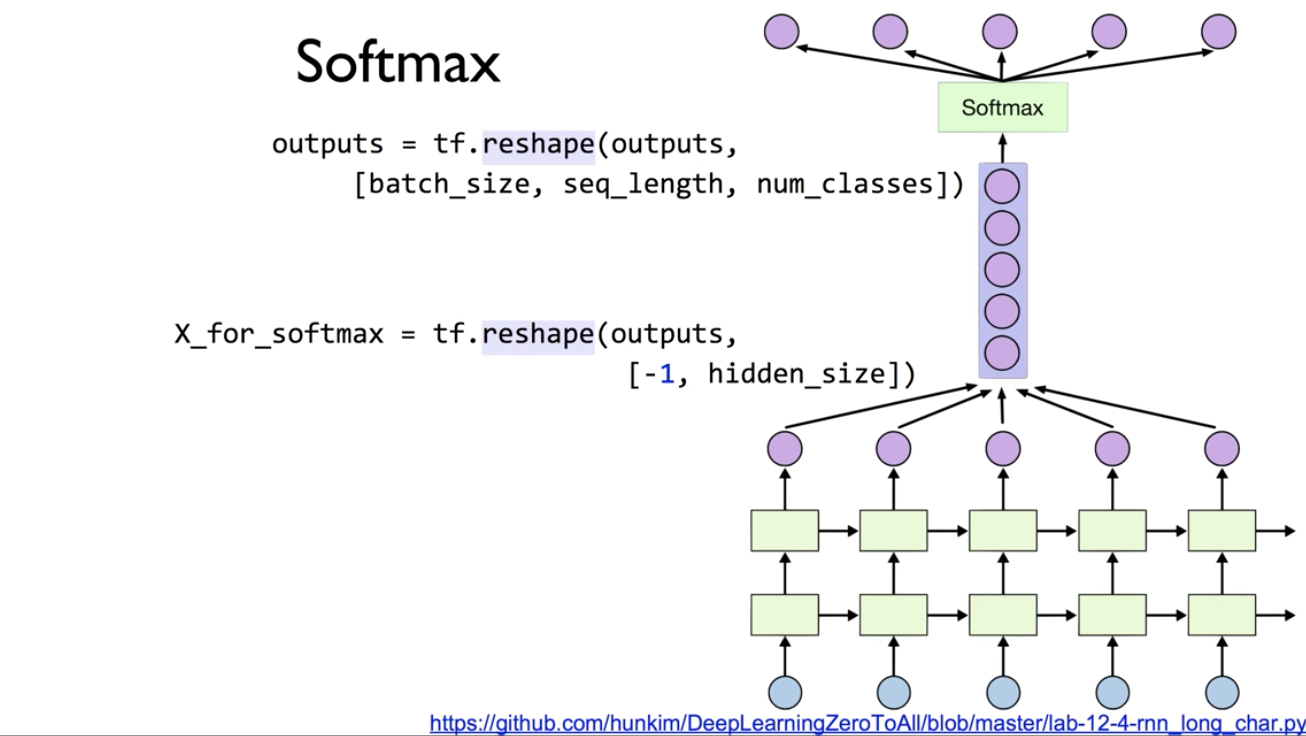

In [21]:
Image("img/TF_RNN_softmax.png") # code안에서 나오게 할 때

In [36]:
tf.reset_default_graph()

sample = " if you want you"
idx2char = list(set(sample))  # index -> char
char2idx = {c: i for i, c in enumerate(idx2char)}  # char -> idex

# hyper parameters
dic_size = len(char2idx)  # RNN input size (one hot size)
rnn_hidden_size = len(char2idx)  # RNN output size
num_classes = len(char2idx)  # final output size (RNN or softmax, etc.)
batch_size = 1  # one sample data, one batch
sequence_length = len(sample) - 1  # number of lstm rollings (unit #)
learning_rate = 0.1

sample_idx = [char2idx[c] for c in sample]  # char to index
x_data = [sample_idx[:-1]]  # X data sample (0 ~ n-1) hello: hell
y_data = [sample_idx[1:]]   # Y label sample (1 ~ n) hello: ello

X = tf.placeholder(tf.int32, [None, sequence_length])  # X data
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

# flatten the data (ignore batches for now). No effect if the batch size is 1
X_one_hot = tf.one_hot(X, num_classes)  # one hot: 1 -> 0 1 0 0 0 0 0 0 0 0
X_for_softmax = tf.reshape(X_one_hot, [-1, rnn_hidden_size])

# softmax layer (rnn_hidden_size -> num_classes)
softmax_w = tf.get_variable("softmax_w", [rnn_hidden_size, num_classes])
softmax_b = tf.get_variable("softmax_b", [num_classes])
outputs = tf.matmul(X_for_softmax, softmax_w) + softmax_b

# expend the data (revive the batches)
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights = tf.ones([batch_size, sequence_length])

# Compute sequence cost/loss
sequence_loss = tf.contrib.seq2seq.sequence_loss(
    logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)  # mean all sequence loss
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(3000):
        l, _ = sess.run([loss, train], feed_dict={X: x_data, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_data})

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print(i, "loss:", l, "Prediction:", ''.join(result_str))

0 loss: 2.374086 Prediction: y oy yyyyy ty y
1 loss: 2.1811721 Prediction: y oyo  yyo  yo 
2 loss: 2.001011 Prediction: y  you yyo  you
3 loss: 1.8340303 Prediction: y  you yao  you
4 loss: 1.6787776 Prediction: y  you yan  you
5 loss: 1.5348088 Prediction: y  you yan  you
6 loss: 1.4017583 Prediction: y  you yant you
7 loss: 1.279063 Prediction: yf you yant you
8 loss: 1.1662275 Prediction: yf you yant you
9 loss: 1.0628644 Prediction: yf you yant you
10 loss: 0.96872336 Prediction: yf you yant you
11 loss: 0.8836616 Prediction: yf you yant you
12 loss: 0.8074662 Prediction: yf you yant you
13 loss: 0.73974544 Prediction: yf you yant you
14 loss: 0.67997676 Prediction: yf you yant you
15 loss: 0.6275997 Prediction: yf you yant you
16 loss: 0.58205867 Prediction: yf you yant you
17 loss: 0.5427834 Prediction: yf you yant you
18 loss: 0.50915265 Prediction: yf you yant you
19 loss: 0.48048922 Prediction: yf you yant you
20 loss: 0.4560986 Prediction: yf you yant you
21 loss: 0.43533432 

232 loss: 0.28149065 Prediction: yf you yant you
233 loss: 0.28146675 Prediction: yf you yant you
234 loss: 0.281443 Prediction: yf you yant you
235 loss: 0.28141946 Prediction: yf you yant you
236 loss: 0.28139624 Prediction: yf you yant you
237 loss: 0.28137317 Prediction: yf you yant you
238 loss: 0.2813503 Prediction: yf you yant you
239 loss: 0.28132758 Prediction: yf you yant you
240 loss: 0.2813052 Prediction: yf you yant you
241 loss: 0.2812829 Prediction: yf you yant you
242 loss: 0.2812609 Prediction: yf you yant you
243 loss: 0.281239 Prediction: yf you yant you
244 loss: 0.28121728 Prediction: yf you yant you
245 loss: 0.2811958 Prediction: yf you yant you
246 loss: 0.28117454 Prediction: yf you yant you
247 loss: 0.28115338 Prediction: yf you yant you
248 loss: 0.28113243 Prediction: yf you yant you
249 loss: 0.2811117 Prediction: yf you yant you
250 loss: 0.2810911 Prediction: yf you yant you
251 loss: 0.28107074 Prediction: yf you yant you
252 loss: 0.2810505 Prediction:

520 loss: 0.27861664 Prediction: yf you yant you
521 loss: 0.27861276 Prediction: yf you yant you
522 loss: 0.2786089 Prediction: yf you yant you
523 loss: 0.27860504 Prediction: yf you yant you
524 loss: 0.27860123 Prediction: yf you yant you
525 loss: 0.27859744 Prediction: yf you yant you
526 loss: 0.27859363 Prediction: yf you yant you
527 loss: 0.27858984 Prediction: yf you yant you
528 loss: 0.2785861 Prediction: yf you yant you
529 loss: 0.2785824 Prediction: yf you yant you
530 loss: 0.27857867 Prediction: yf you yant you
531 loss: 0.27857488 Prediction: yf you yant you
532 loss: 0.27857122 Prediction: yf you yant you
533 loss: 0.2785675 Prediction: yf you yant you
534 loss: 0.2785639 Prediction: yf you yant you
535 loss: 0.2785602 Prediction: yf you yant you
536 loss: 0.27855662 Prediction: yf you yant you
537 loss: 0.27855295 Prediction: yf you yant you
538 loss: 0.27854937 Prediction: yf you yant you
539 loss: 0.2785458 Prediction: yf you yant you
540 loss: 0.2785422 Predict

750 loss: 0.27803552 Prediction: yf you yant you
751 loss: 0.27803388 Prediction: yf you yant you
752 loss: 0.2780323 Prediction: yf you yant you
753 loss: 0.2780307 Prediction: yf you yant you
754 loss: 0.27802908 Prediction: yf you yant you
755 loss: 0.27802753 Prediction: yf you yant you
756 loss: 0.27802595 Prediction: yf you yant you
757 loss: 0.27802435 Prediction: yf you yant you
758 loss: 0.27802277 Prediction: yf you yant you
759 loss: 0.27802125 Prediction: yf you yant you
760 loss: 0.27801958 Prediction: yf you yant you
761 loss: 0.27801806 Prediction: yf you yant you
762 loss: 0.2780165 Prediction: yf you yant you
763 loss: 0.278015 Prediction: yf you yant you
764 loss: 0.2780134 Prediction: yf you yant you
765 loss: 0.27801186 Prediction: yf you yant you
766 loss: 0.27801034 Prediction: yf you yant you
767 loss: 0.2780088 Prediction: yf you yant you
768 loss: 0.27800724 Prediction: yf you yant you
769 loss: 0.27800578 Prediction: yf you yant you
770 loss: 0.27800423 Predic

954 loss: 0.277789 Prediction: yf you yant you
955 loss: 0.27778807 Prediction: yf you yant you
956 loss: 0.2777872 Prediction: yf you yant you
957 loss: 0.27778634 Prediction: yf you yant you
958 loss: 0.27778542 Prediction: yf you yant you
959 loss: 0.27778453 Prediction: yf you yant you
960 loss: 0.27778366 Prediction: yf you yant you
961 loss: 0.27778277 Prediction: yf you yant you
962 loss: 0.27778193 Prediction: yf you yant you
963 loss: 0.277781 Prediction: yf you yant you
964 loss: 0.27778015 Prediction: yf you yant you
965 loss: 0.27777922 Prediction: yf you yant you
966 loss: 0.27777845 Prediction: yf you yant you
967 loss: 0.2777775 Prediction: yf you yant you
968 loss: 0.27777666 Prediction: yf you yant you
969 loss: 0.27777573 Prediction: yf you yant you
970 loss: 0.27777493 Prediction: yf you yant you
971 loss: 0.27777407 Prediction: yf you yant you
972 loss: 0.27777326 Prediction: yf you yant you
973 loss: 0.27777234 Prediction: yf you yant you
974 loss: 0.27777147 Predi

1241 loss: 0.2776025 Prediction: yf you yant you
1242 loss: 0.27760202 Prediction: yf you yant you
1243 loss: 0.27760157 Prediction: yf you yant you
1244 loss: 0.2776011 Prediction: yf you yant you
1245 loss: 0.27760065 Prediction: yf you yant you
1246 loss: 0.27760014 Prediction: yf you yant you
1247 loss: 0.27759972 Prediction: yf you yant you
1248 loss: 0.27759925 Prediction: yf you yant you
1249 loss: 0.2775988 Prediction: yf you yant you
1250 loss: 0.27759832 Prediction: yf you yant you
1251 loss: 0.2775979 Prediction: yf you yant you
1252 loss: 0.2775974 Prediction: yf you yant you
1253 loss: 0.277597 Prediction: yf you yant you
1254 loss: 0.2775965 Prediction: yf you yant you
1255 loss: 0.2775961 Prediction: yf you yant you
1256 loss: 0.2775956 Prediction: yf you yant you
1257 loss: 0.2775952 Prediction: yf you yant you
1258 loss: 0.27759466 Prediction: yf you yant you
1259 loss: 0.27759418 Prediction: yf you yant you
1260 loss: 0.2775938 Prediction: yf you yant you
1261 loss: 0

1494 loss: 0.2775089 Prediction: yf you yant you
1495 loss: 0.27750862 Prediction: yf you yant you
1496 loss: 0.2775083 Prediction: yf you yant you
1497 loss: 0.277508 Prediction: yf you yant you
1498 loss: 0.27750772 Prediction: yf you yant you
1499 loss: 0.27750742 Prediction: yf you yant you
1500 loss: 0.2775072 Prediction: yf you yant you
1501 loss: 0.27750683 Prediction: yf you yant you
1502 loss: 0.27750656 Prediction: yf you yant you
1503 loss: 0.27750626 Prediction: yf you yant you
1504 loss: 0.277506 Prediction: yf you yant you
1505 loss: 0.2775057 Prediction: yf you yant you
1506 loss: 0.27750543 Prediction: yf you yant you
1507 loss: 0.2775051 Prediction: yf you yant you
1508 loss: 0.2775049 Prediction: yf you yant you
1509 loss: 0.27750456 Prediction: yf you yant you
1510 loss: 0.2775043 Prediction: yf you yant you
1511 loss: 0.27750397 Prediction: yf you yant you
1512 loss: 0.2775037 Prediction: yf you yant you
1513 loss: 0.2775034 Prediction: yf you yant you
1514 loss: 0.

1683 loss: 0.27746138 Prediction: yf you yant you
1684 loss: 0.2774612 Prediction: yf you yant you
1685 loss: 0.277461 Prediction: yf you yant you
1686 loss: 0.27746078 Prediction: yf you yant you
1687 loss: 0.2774605 Prediction: yf you yant you
1688 loss: 0.27746028 Prediction: yf you yant you
1689 loss: 0.27746016 Prediction: yf you yant you
1690 loss: 0.27745992 Prediction: yf you yant you
1691 loss: 0.2774597 Prediction: yf you yant you
1692 loss: 0.27745947 Prediction: yf you yant you
1693 loss: 0.27745926 Prediction: yf you yant you
1694 loss: 0.277459 Prediction: yf you yant you
1695 loss: 0.2774588 Prediction: yf you yant you
1696 loss: 0.2774586 Prediction: yf you yant you
1697 loss: 0.27745837 Prediction: yf you yant you
1698 loss: 0.2774582 Prediction: yf you yant you
1699 loss: 0.27745798 Prediction: yf you yant you
1700 loss: 0.27745774 Prediction: yf you yant you
1701 loss: 0.27745757 Prediction: yf you yant you
1702 loss: 0.27745733 Prediction: yf you yant you
1703 loss:

1996 loss: 0.2774071 Prediction: yf you yant you
1997 loss: 0.2774069 Prediction: yf you yant you
1998 loss: 0.27740678 Prediction: yf you yant you
1999 loss: 0.27740666 Prediction: yf you yant you
2000 loss: 0.27740654 Prediction: yf you yant you
2001 loss: 0.27740642 Prediction: yf you yant you
2002 loss: 0.27740625 Prediction: yf you yant you
2003 loss: 0.27740607 Prediction: yf you yant you
2004 loss: 0.27740604 Prediction: yf you yant you
2005 loss: 0.27740583 Prediction: yf you yant you
2006 loss: 0.2774057 Prediction: yf you yant you
2007 loss: 0.2774056 Prediction: yf you yant you
2008 loss: 0.27740544 Prediction: yf you yant you
2009 loss: 0.27740526 Prediction: yf you yant you
2010 loss: 0.27740514 Prediction: yf you yant you
2011 loss: 0.27740505 Prediction: yf you yant you
2012 loss: 0.27740487 Prediction: yf you yant you
2013 loss: 0.2774047 Prediction: yf you yant you
2014 loss: 0.27740464 Prediction: yf you yant you
2015 loss: 0.2774045 Prediction: yf you yant you
2016 l

2274 loss: 0.27737442 Prediction: yf you yant you
2275 loss: 0.2773744 Prediction: yf you yant you
2276 loss: 0.27737427 Prediction: yf you yant you
2277 loss: 0.27737415 Prediction: yf you yant you
2278 loss: 0.277374 Prediction: yf you yant you
2279 loss: 0.27737397 Prediction: yf you yant you
2280 loss: 0.27737388 Prediction: yf you yant you
2281 loss: 0.2773738 Prediction: yf you yant you
2282 loss: 0.27737373 Prediction: yf you yant you
2283 loss: 0.27737364 Prediction: yf you yant you
2284 loss: 0.2773736 Prediction: yf you yant you
2285 loss: 0.27737358 Prediction: yf you yant you
2286 loss: 0.27737367 Prediction: yf you yant you
2287 loss: 0.2773738 Prediction: yf you yant you
2288 loss: 0.27737412 Prediction: yf you yant you
2289 loss: 0.27737474 Prediction: yf you yant you
2290 loss: 0.27737576 Prediction: yf you yant you
2291 loss: 0.2773774 Prediction: yf you yant you
2292 loss: 0.27737996 Prediction: yf you yant you
2293 loss: 0.27738354 Prediction: yf you yant you
2294 lo

2448 loss: 0.27735883 Prediction: yf you yant you
2449 loss: 0.27735874 Prediction: yf you yant you
2450 loss: 0.27735862 Prediction: yf you yant you
2451 loss: 0.27735862 Prediction: yf you yant you
2452 loss: 0.27735847 Prediction: yf you yant you
2453 loss: 0.27735844 Prediction: yf you yant you
2454 loss: 0.27735832 Prediction: yf you yant you
2455 loss: 0.2773582 Prediction: yf you yant you
2456 loss: 0.27735817 Prediction: yf you yant you
2457 loss: 0.27735806 Prediction: yf you yant you
2458 loss: 0.27735803 Prediction: yf you yant you
2459 loss: 0.27735794 Prediction: yf you yant you
2460 loss: 0.27735788 Prediction: yf you yant you
2461 loss: 0.27735773 Prediction: yf you yant you
2462 loss: 0.27735767 Prediction: yf you yant you
2463 loss: 0.27735767 Prediction: yf you yant you
2464 loss: 0.27735755 Prediction: yf you yant you
2465 loss: 0.2773575 Prediction: yf you yant you
2466 loss: 0.27735737 Prediction: yf you yant you
2467 loss: 0.27735728 Prediction: yf you yant you
24

2630 loss: 0.27734533 Prediction: yf you yant you
2631 loss: 0.27734527 Prediction: yf you yant you
2632 loss: 0.2773452 Prediction: yf you yant you
2633 loss: 0.27734515 Prediction: yf you yant you
2634 loss: 0.27734512 Prediction: yf you yant you
2635 loss: 0.277345 Prediction: yf you yant you
2636 loss: 0.27734497 Prediction: yf you yant you
2637 loss: 0.27734488 Prediction: yf you yant you
2638 loss: 0.2773448 Prediction: yf you yant you
2639 loss: 0.27734473 Prediction: yf you yant you
2640 loss: 0.2773447 Prediction: yf you yant you
2641 loss: 0.2773446 Prediction: yf you yant you
2642 loss: 0.27734455 Prediction: yf you yant you
2643 loss: 0.27734452 Prediction: yf you yant you
2644 loss: 0.27734444 Prediction: yf you yant you
2645 loss: 0.2773444 Prediction: yf you yant you
2646 loss: 0.27734432 Prediction: yf you yant you
2647 loss: 0.2773442 Prediction: yf you yant you
2648 loss: 0.27734414 Prediction: yf you yant you
2649 loss: 0.27734414 Prediction: yf you yant you
2650 los

2869 loss: 0.27733105 Prediction: yf you yant you
2870 loss: 0.27733096 Prediction: yf you yant you
2871 loss: 0.27733096 Prediction: yf you yant you
2872 loss: 0.2773309 Prediction: yf you yant you
2873 loss: 0.27733088 Prediction: yf you yant you
2874 loss: 0.2773308 Prediction: yf you yant you
2875 loss: 0.27733076 Prediction: yf you yant you
2876 loss: 0.27733076 Prediction: yf you yant you
2877 loss: 0.2773306 Prediction: yf you yant you
2878 loss: 0.27733055 Prediction: yf you yant you
2879 loss: 0.27733058 Prediction: yf you yant you
2880 loss: 0.27733055 Prediction: yf you yant you
2881 loss: 0.27733052 Prediction: yf you yant you
2882 loss: 0.27733055 Prediction: yf you yant you
2883 loss: 0.27733067 Prediction: yf you yant you
2884 loss: 0.27733082 Prediction: yf you yant you
2885 loss: 0.27733114 Prediction: yf you yant you
2886 loss: 0.27733162 Prediction: yf you yant you
2887 loss: 0.27733243 Prediction: yf you yant you
2888 loss: 0.27733377 Prediction: yf you yant you
288

# Dynamic RNN

- Different sequence Length

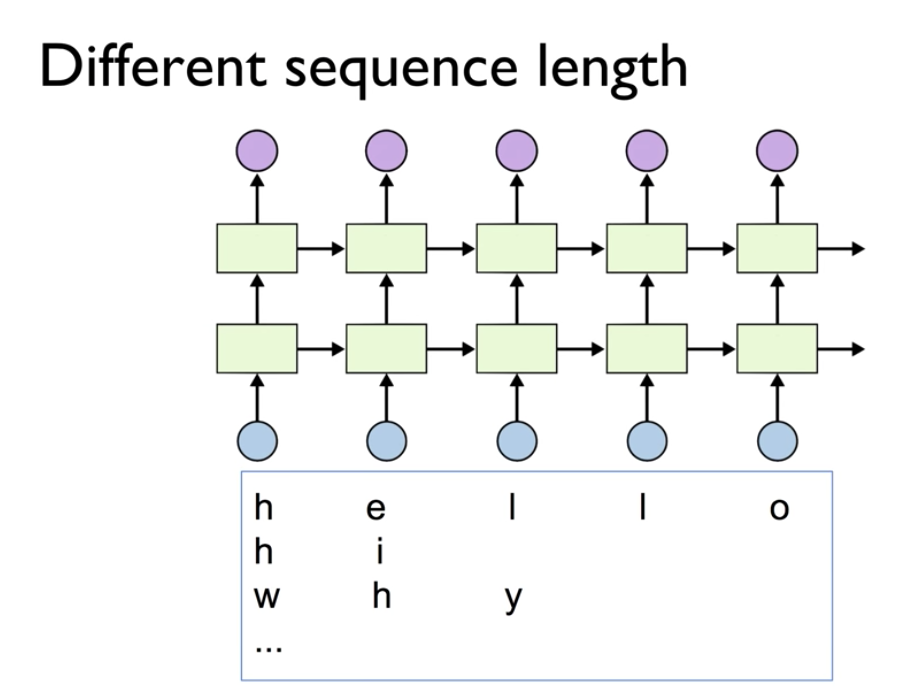

In [37]:
Image("img/TF_RNN_dynamic.png") # code안에서 나오게 할 때

In [39]:
n_steps = 2 
n_inputs = 3 
n_neurons = 5 

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

seq_length = tf.placeholder(tf.int32, [None]) # 시퀀스 길이를 넣어줄 placeholder 


basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) 

outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_length) 
# input data 
X_batch = np.array([ 
    # t = 0 t = 1 
    [[0, 1, 2], [9, 8, 7]], # 샘플 1 
    [[3, 4, 5], [0, 0, 0]], # 샘플 2 (0 벡터로 패딩) 
    [[6, 7, 8], [6, 5, 4]], # 샘플 3
    [[9, 0, 1], [3, 2, 1]], # 샘플 4 
]) 
    
# seq length 
seq_length_batch = np.array([2, 1, 2, 2]) # 각 샘플 시퀀스 길이 

with tf.Session() as sess: 
    tf.global_variables_initializer().run() 
    outputs_val, states_val = sess.run([outputs, states], 
                                       feed_dict={X: X_batch, seq_length: seq_length_batch}) 
    print('outputs_val:{}\n{}'.format(outputs_val.shape, outputs_val))



Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
outputs_val:(4, 2, 5)
[[[ 0.8055481  -0.7565359   0.3840774  -0.880306   -0.9410226 ]
  [ 0.97039723 -0.99824053  0.9761256  -0.999955   -1.        ]]

 [[ 0.97781175 -0.979448    0.6750724  -0.997488   -0.99999905]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.9976655  -0.9984456   0.84407383 -0.9999503  -1.        ]
  [ 0.7261331  -0.9751388   0.97877264 -0.9987997  -1.        ]]

 [[-0.98443145 -0.75567186  0.22617845  0.8311358  -0.9999917 ]
  [ 0.8318328   0.80874836  0.82705694 -0.6798287  -0.99304646]]]
